In [ ]:
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.font_manager
import dtreeviz
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve, auc, confusion_matrix
from IPython.display import clear_output

%config InlineBackend.figure_format = 'retina'

In [ ]:
test_titanic = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/test_titanic.csv')
train_titanic = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/train_titanic.csv')

## Задание 1. (Разминочное)

Постройте График зависимости переменной Age от параметров Pclass и Sex. Какие разные варианты графиков можно построить?

Text(0.5, 0, 'Промежуток')

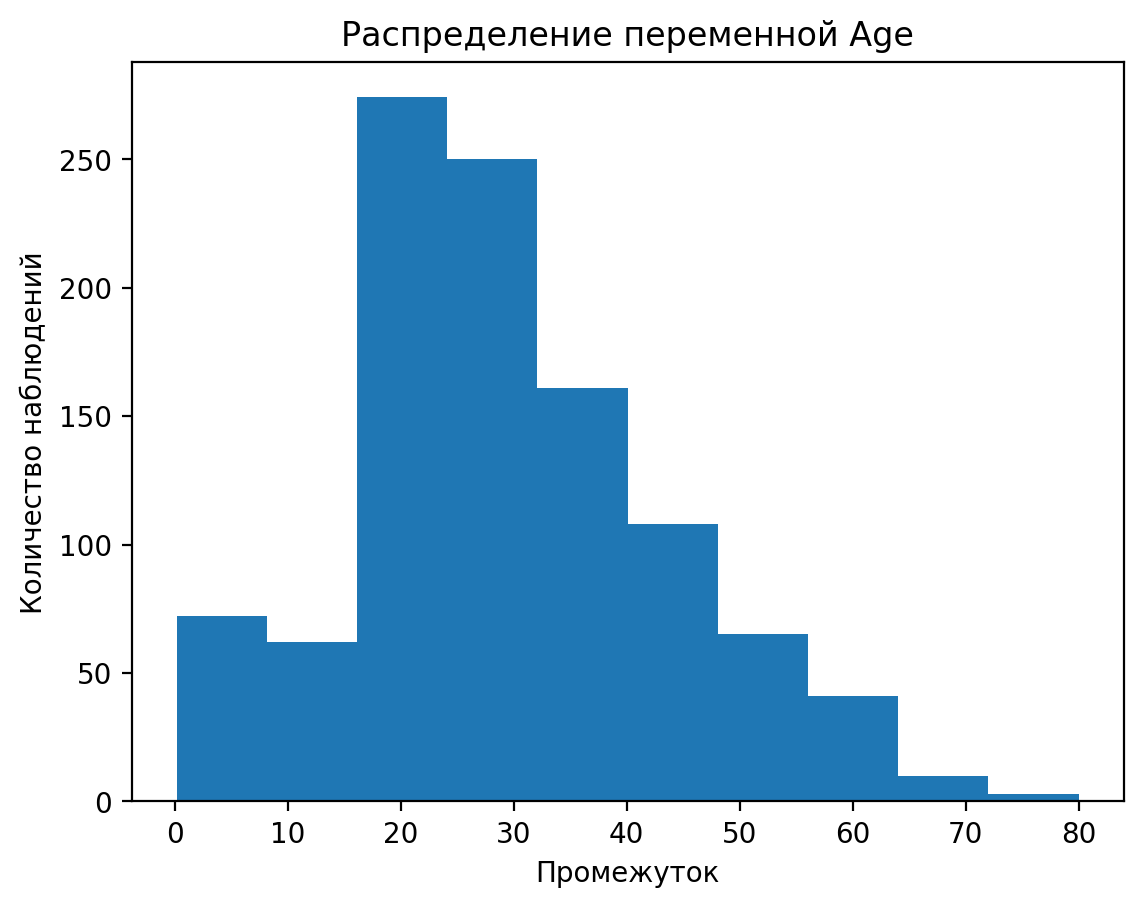

In [ ]:
titanic = pd.concat([test_titanic, train_titanic])
plt.hist(titanic['Age'])
plt.title('Распределение переменной Age')
plt.ylabel('Количество наблюдений')
plt.xlabel('Промежуток')

In [ ]:
train_titanic['Sex'] = train_titanic['Sex'].apply(lambda x: 1 if x == 'female' else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


<Axes: xlabel='Pclass', ylabel='Age'>

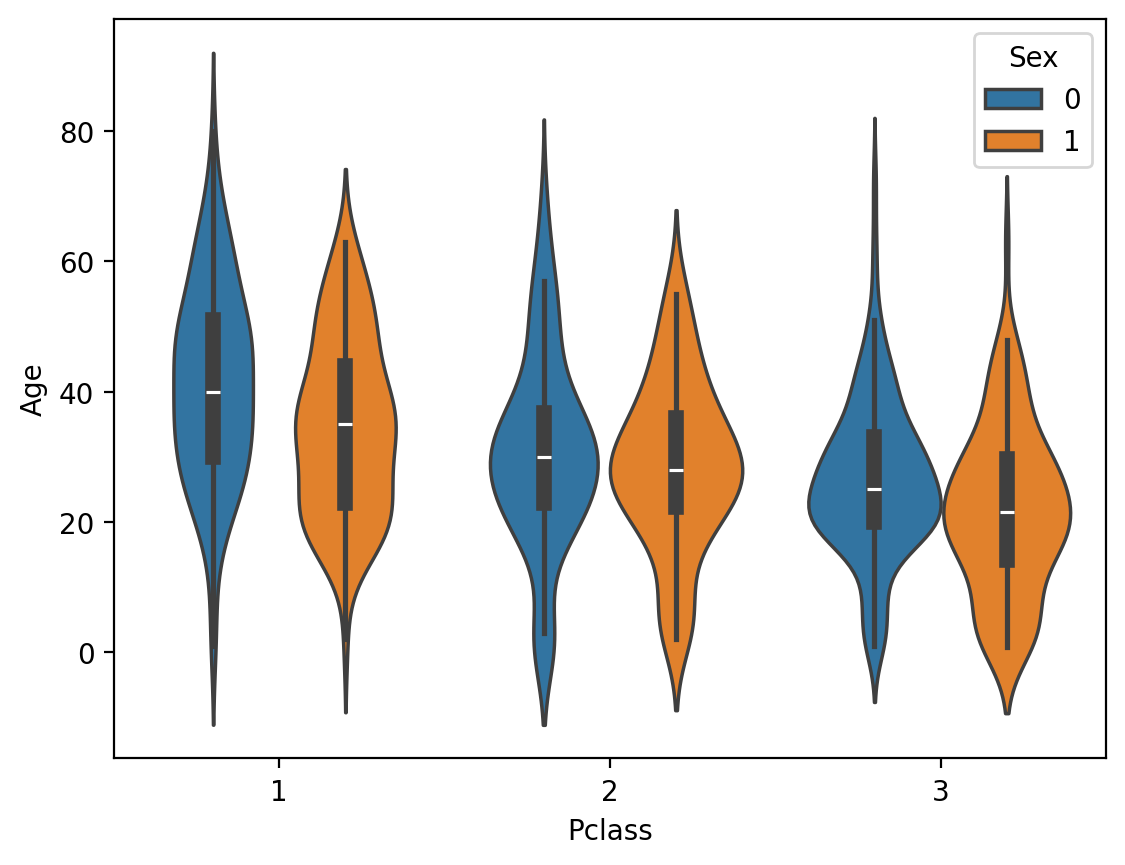

In [ ]:
sns.violinplot(train_titanic, x='Pclass', y='Age', hue='Sex')

## Задание 2. Постройте модель решающего дерева, которая бы выбрала три самых лучших параметра и построила по ним оптимальное дерево. После этого визуализируйте confusion matrix для получившегося алгоритма.

In [ ]:
train_titanic = pd.concat([train_titanic, pd.get_dummies(train_titanic['Embarked'])], axis=1)

In [ ]:
train_titanic_model = train_titanic.dropna(subset=['Survived', 'Pclass', 'Sex', 'Age'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
train_titanic_model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


AttributeError: 'Index' object has no attribute '_format_flat'

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
885        

In [ ]:
X = train_titanic_model[['Pclass', 'Sex', 'Age']]
y = train_titanic_model[['Survived']]

In [ ]:
model = sklearn.neighbors.DecisionTreeClassifier(random_state=21)

results = []

for pair in itertools.combinations(X.columns, 2):
  X_pair = X[list(pair)]
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_pair, y, test_size=0.2, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)

  results.append((pair, accuracy))
results.sort(key=lambda x: x[1], reverse=True)

print(f"Лучшая пара признаков: {results[0][0]}")
print(f"Точность модели: {results[0][1]:.3f}")


In [ ]:
X = train_titanic_model[['Pclass', 'Sex', 'Age']]
y = train_titanic_model[['Survived']]
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)


<Axes: >

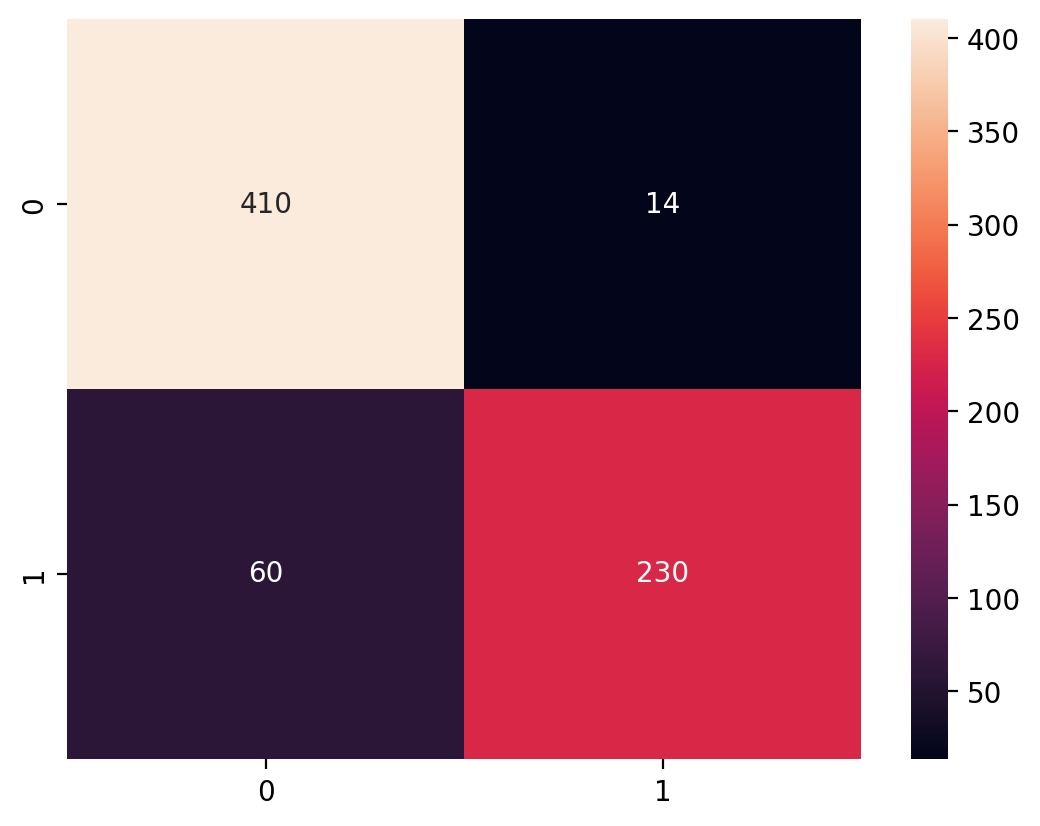

In [ ]:
y_pred = model.predict(X)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='g')

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

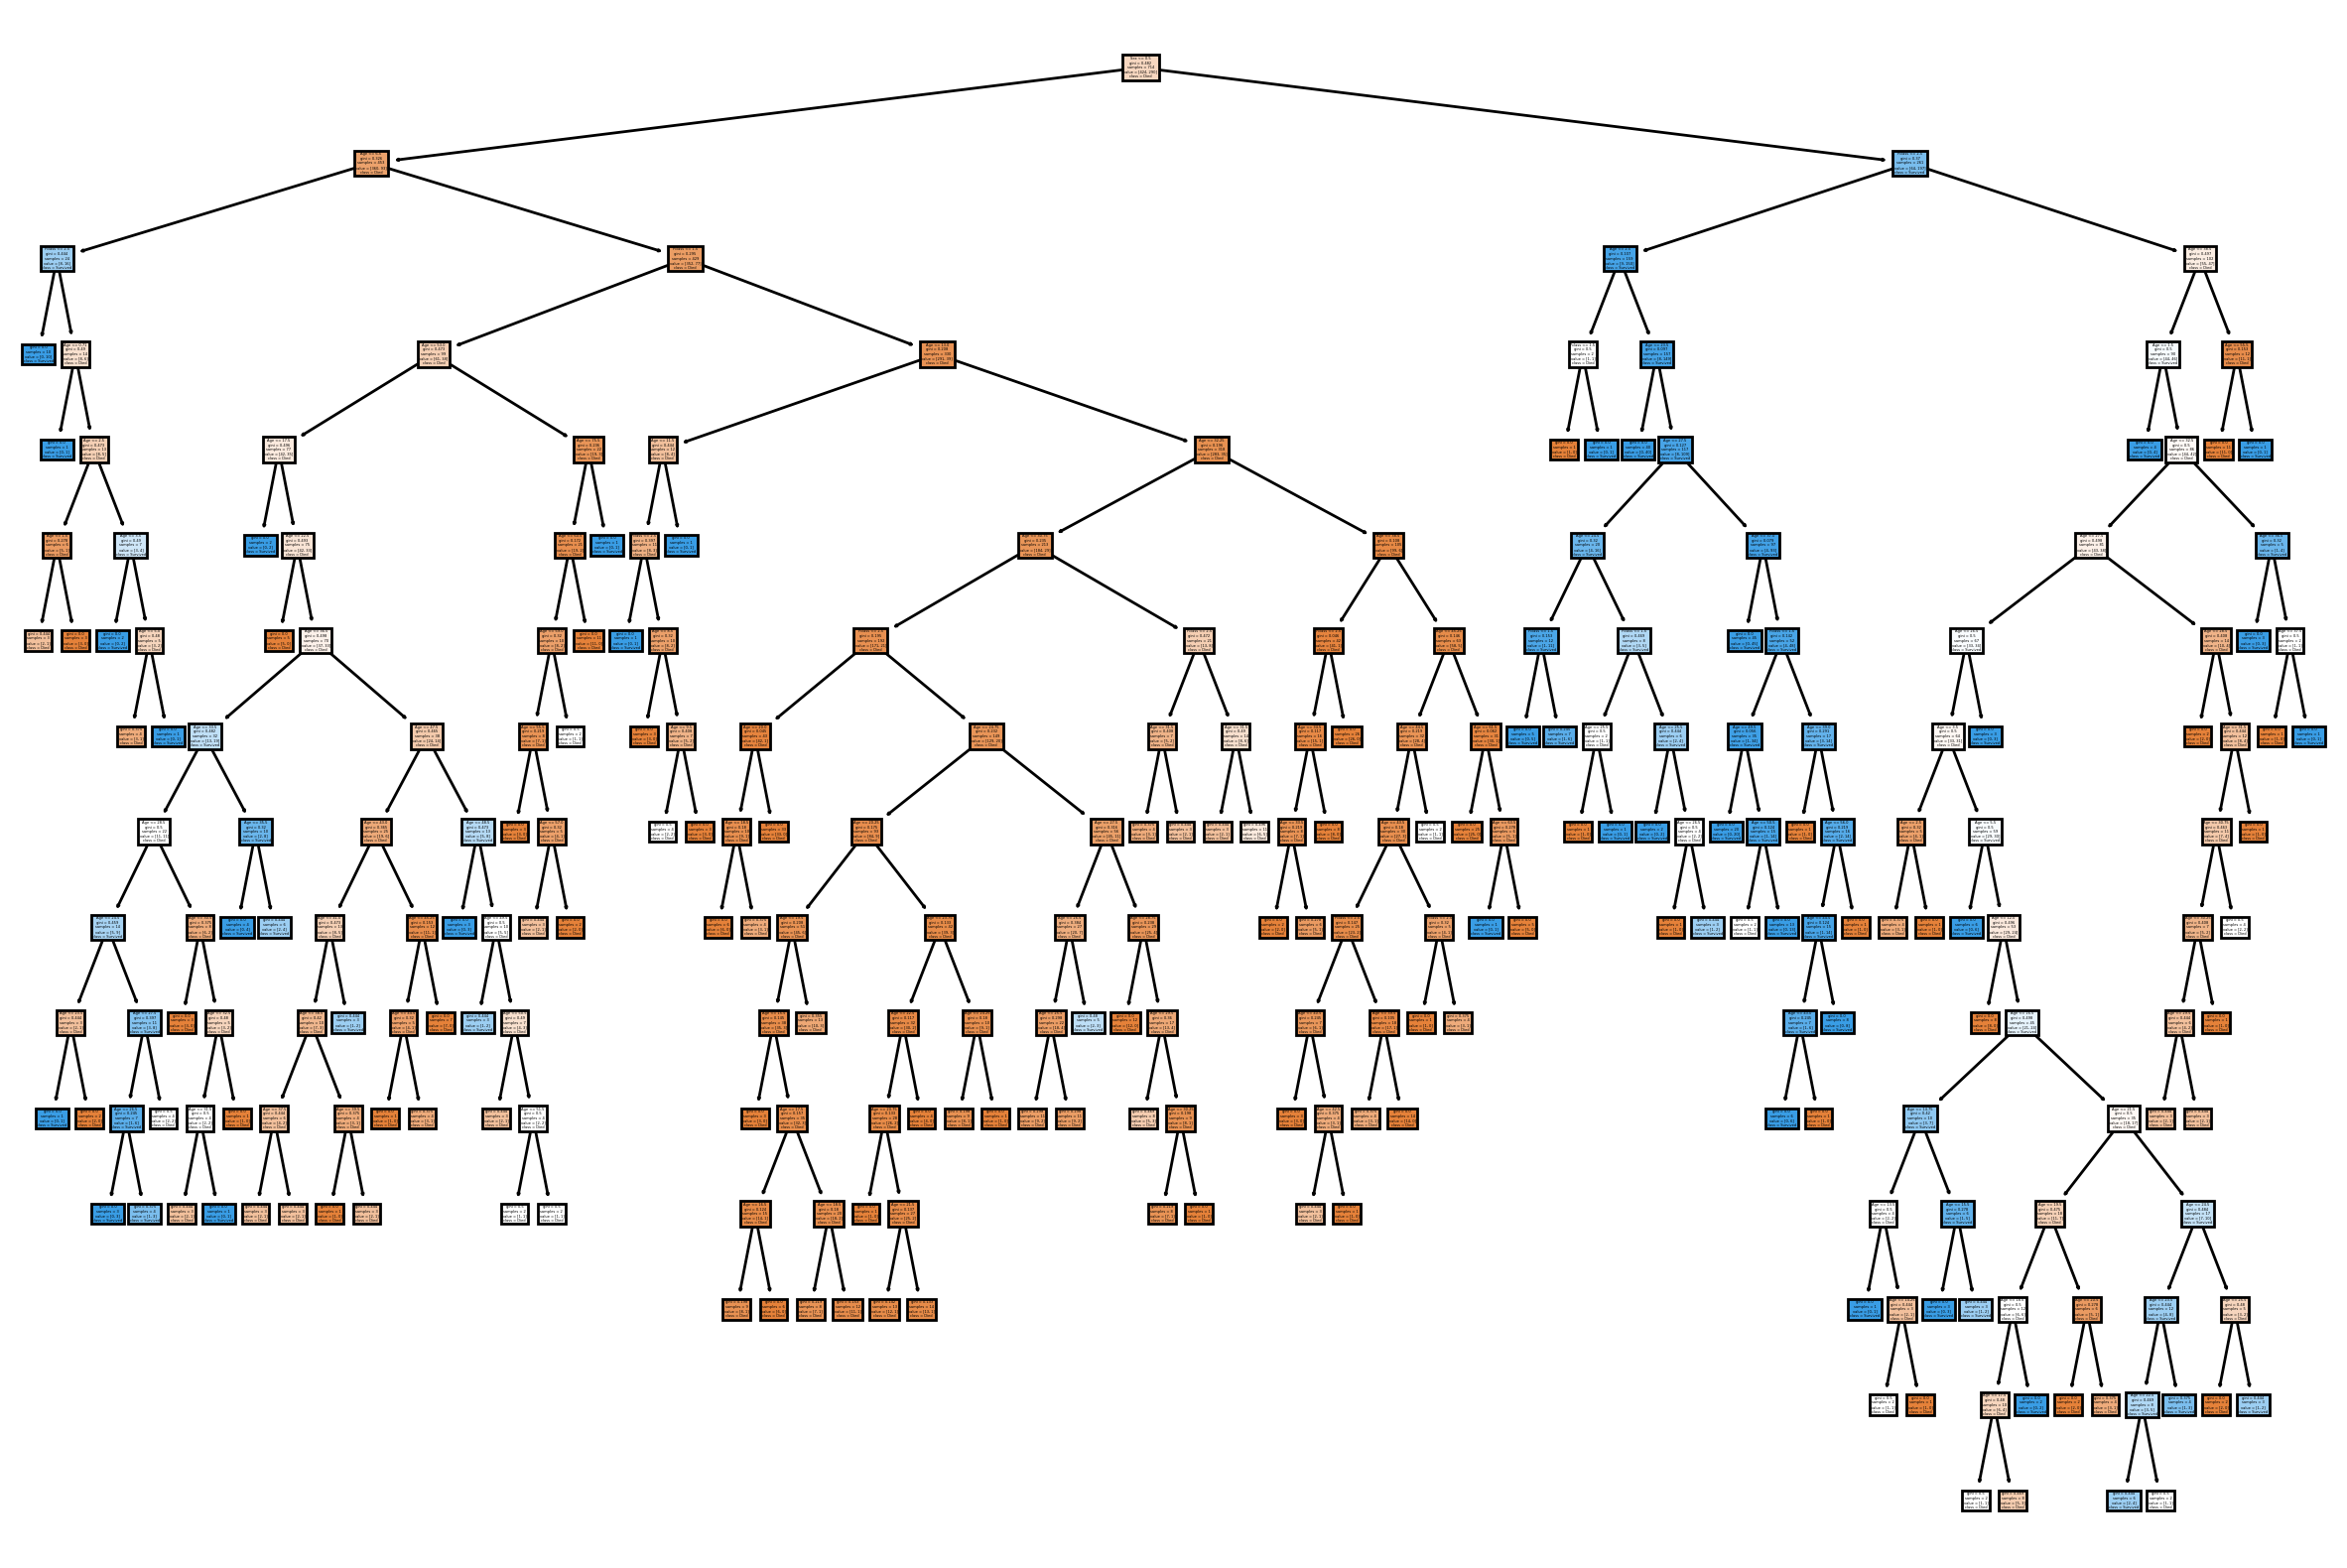

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,
                   feature_names=['Pclass', 'Sex', 'Age'],
                   class_names=["Died", "Survived"],
                   filled=True)

In [ ]:
!pip install graphviz

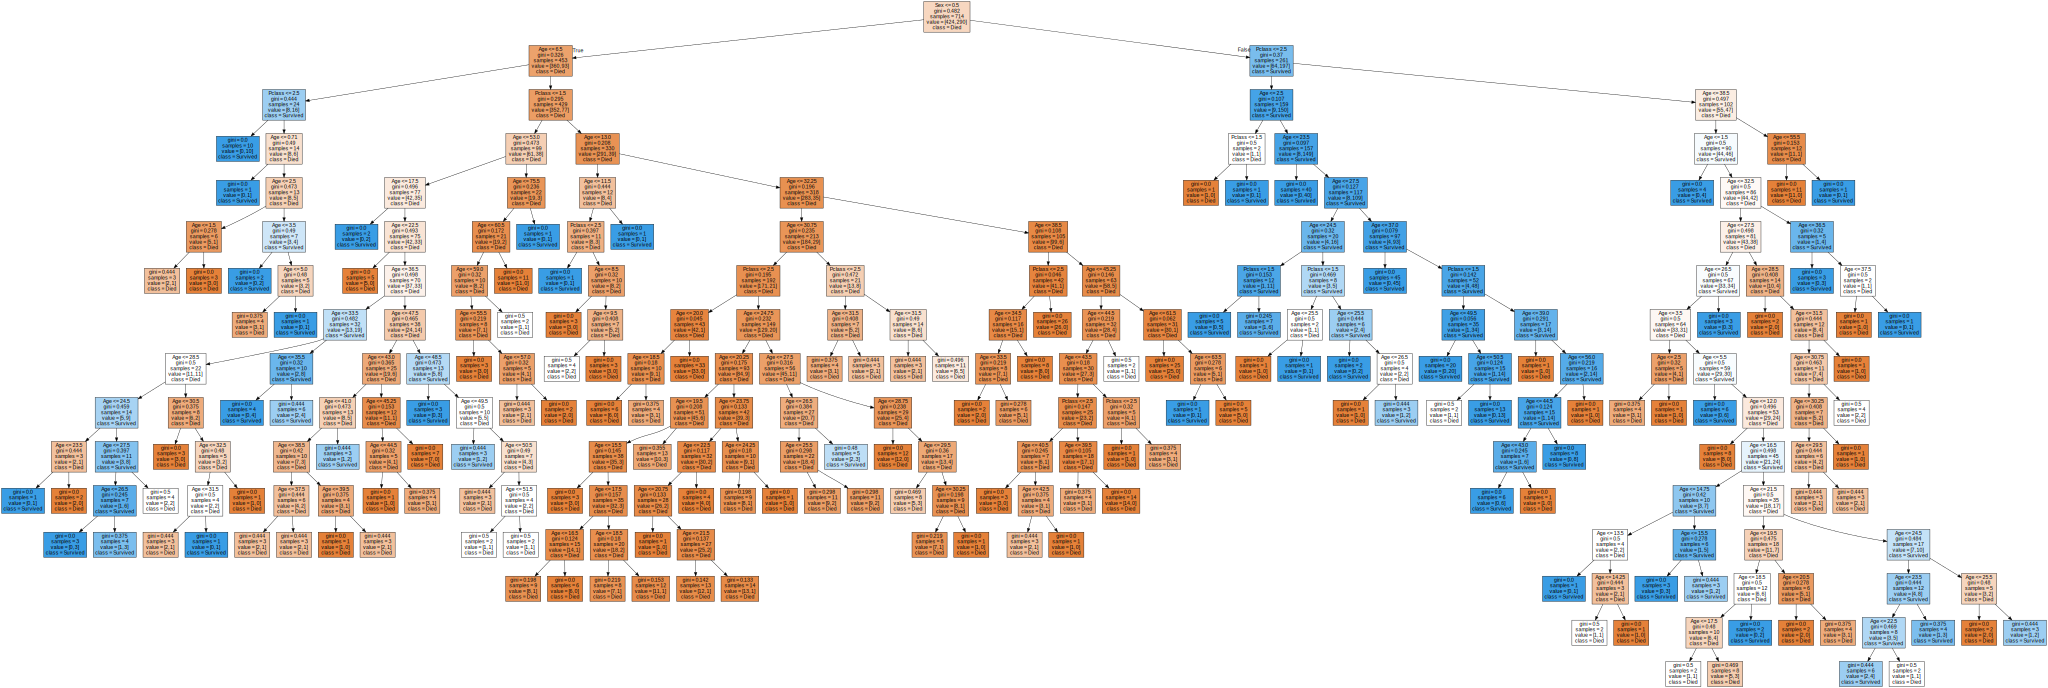

In [ ]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['Pclass', 'Sex', 'Age'],
                                class_names=["Died", "Survived"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


In [ ]:
graph.render("graphname", format="png")

'graphname.png'

## Задание 4. Визуализируйте работу алгоритма градиентного спуска.

Возьмите функцию

$$f(x) = 0.5x^{8}-x^{7}-x^{6}+2x^{5}+x^{2}$$

и с помощью градиентного спуска найдите глобальный и локальный минимумы этой функции

In [ ]:
def plot_line_with_x(xs: list, ys: list, x: float, fx: float, title: str, msg='', figsize=(15, 5)):
    '''
    xs – значения функции по x
    ys – значения функции по y
    x – текущее положение точки по x
    fx – текущее положение точки по y
    title – заголовок картинки
    msg – информация для отображения на картинке
    figsize – размер картинки
    '''
    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'b')
    plt.scatter([x], [fx], c='r', marker='x', s=120)

    plt.title(title)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.text(s=msg, x=-2, y=103)
    plt.show()

In [ ]:
def plot_1d_fuction(xs: list, ys: list, title: str, figsize=(15, 5)):
    '''
    xs – значения функции по x
    ys – значения функции по y
    title – заголовок картинки
    msg – информация для отображения на картинке
    figsize – размер картинки
    '''
    clear_output()
    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'b')
    plt.title(title)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$');

$$f(x) = 0.5x^{8}-x^{7}-x^{6}+2x^{5}+x^{2}$$

In [ ]:
def f_1d(x):
    return 0.5 * (x ** 8) - (x ** 7) - (x ** 6) + 2 * (x ** 5) + (x ** 2)

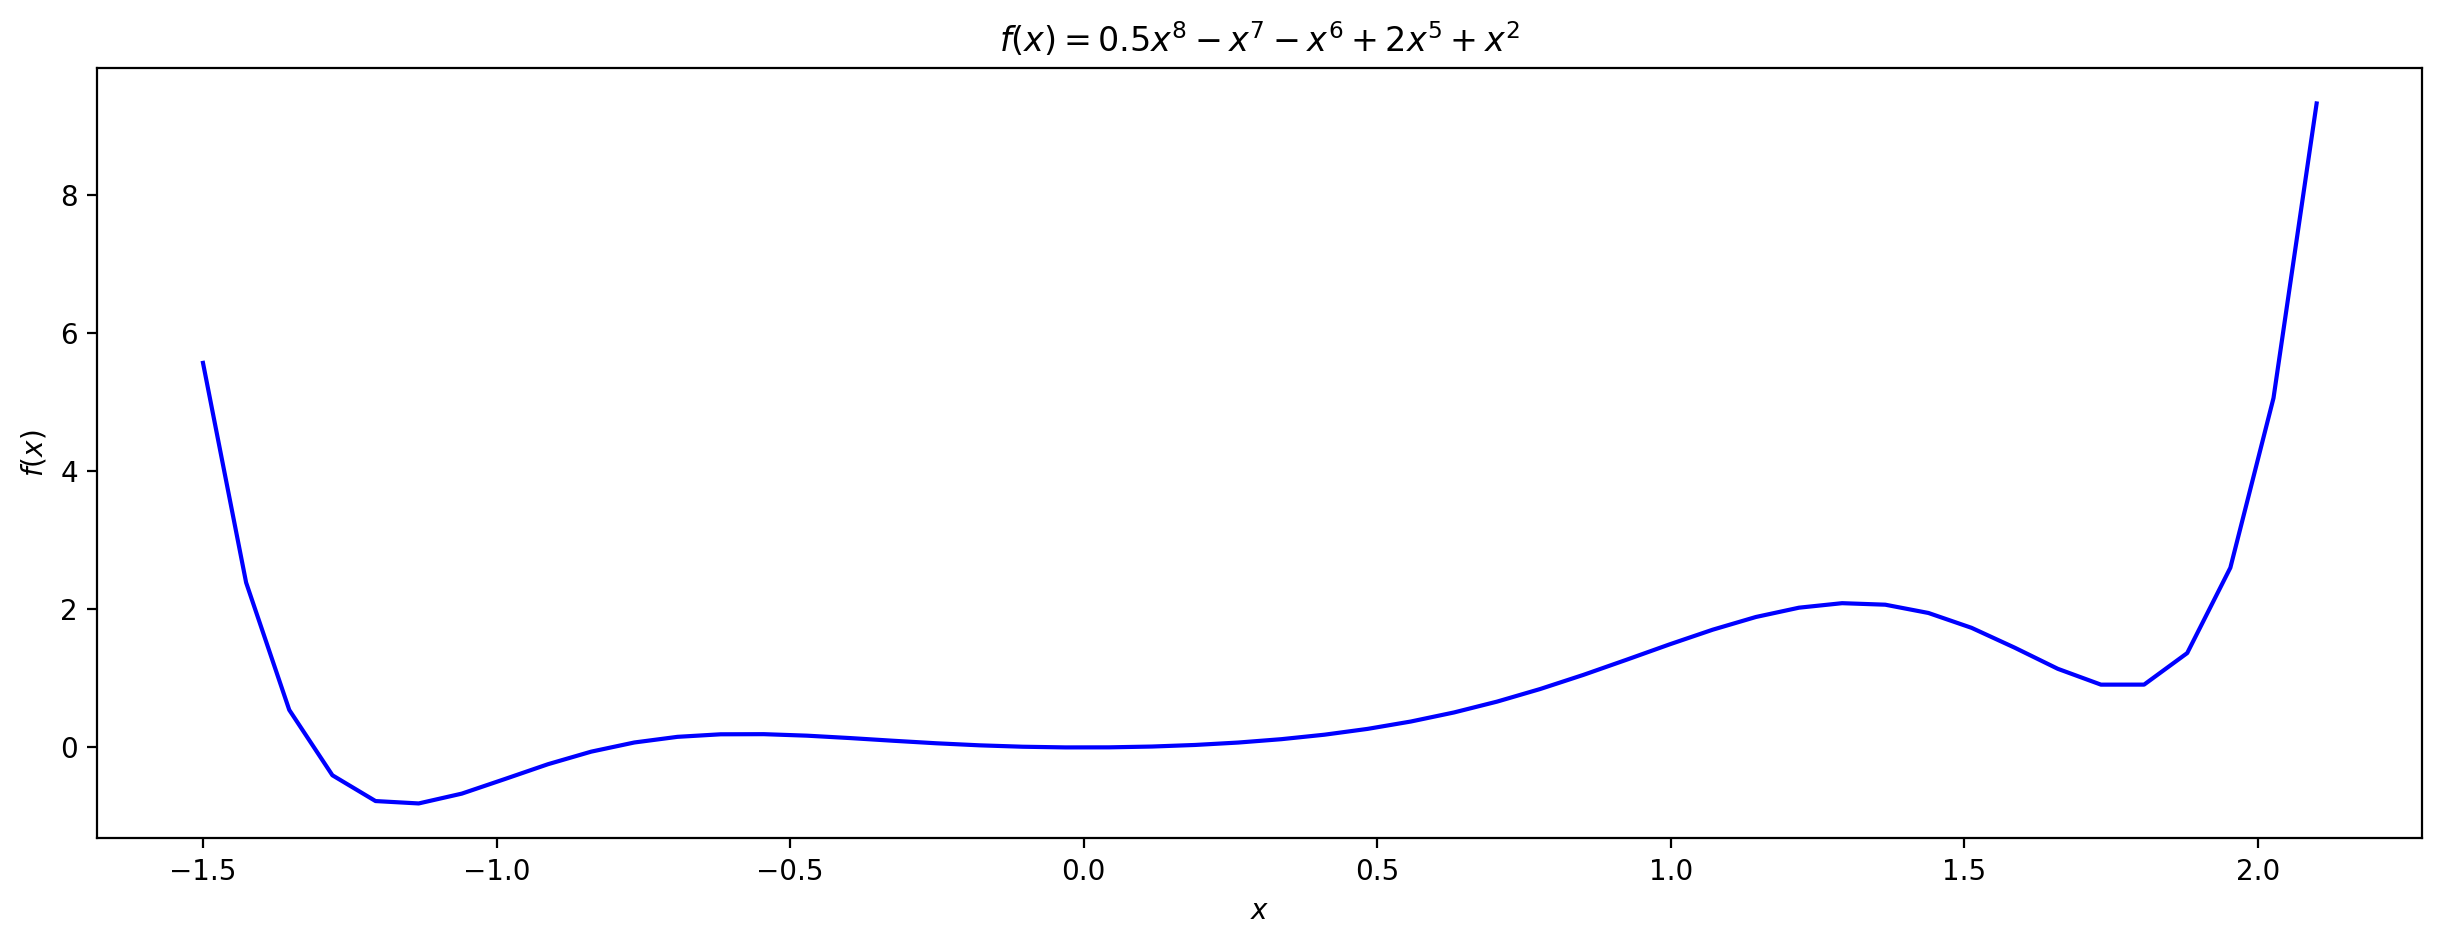

In [ ]:
title_f_1d = '$f(x) = 0.5x^{8}-x^{7}-x^{6}+2x^{5}+x^{2}$'

xs = np.linspace(-1.5, 2.1)
ys = f_1d(xs)

plot_1d_fuction(xs, ys, title=title_f_1d)

In [ ]:
def grad(x):
    return 4 * (x ** 7) - 7 * (x ** 6) - 6 * (x ** 5) + 10 * (x ** 4) + (2 * x)

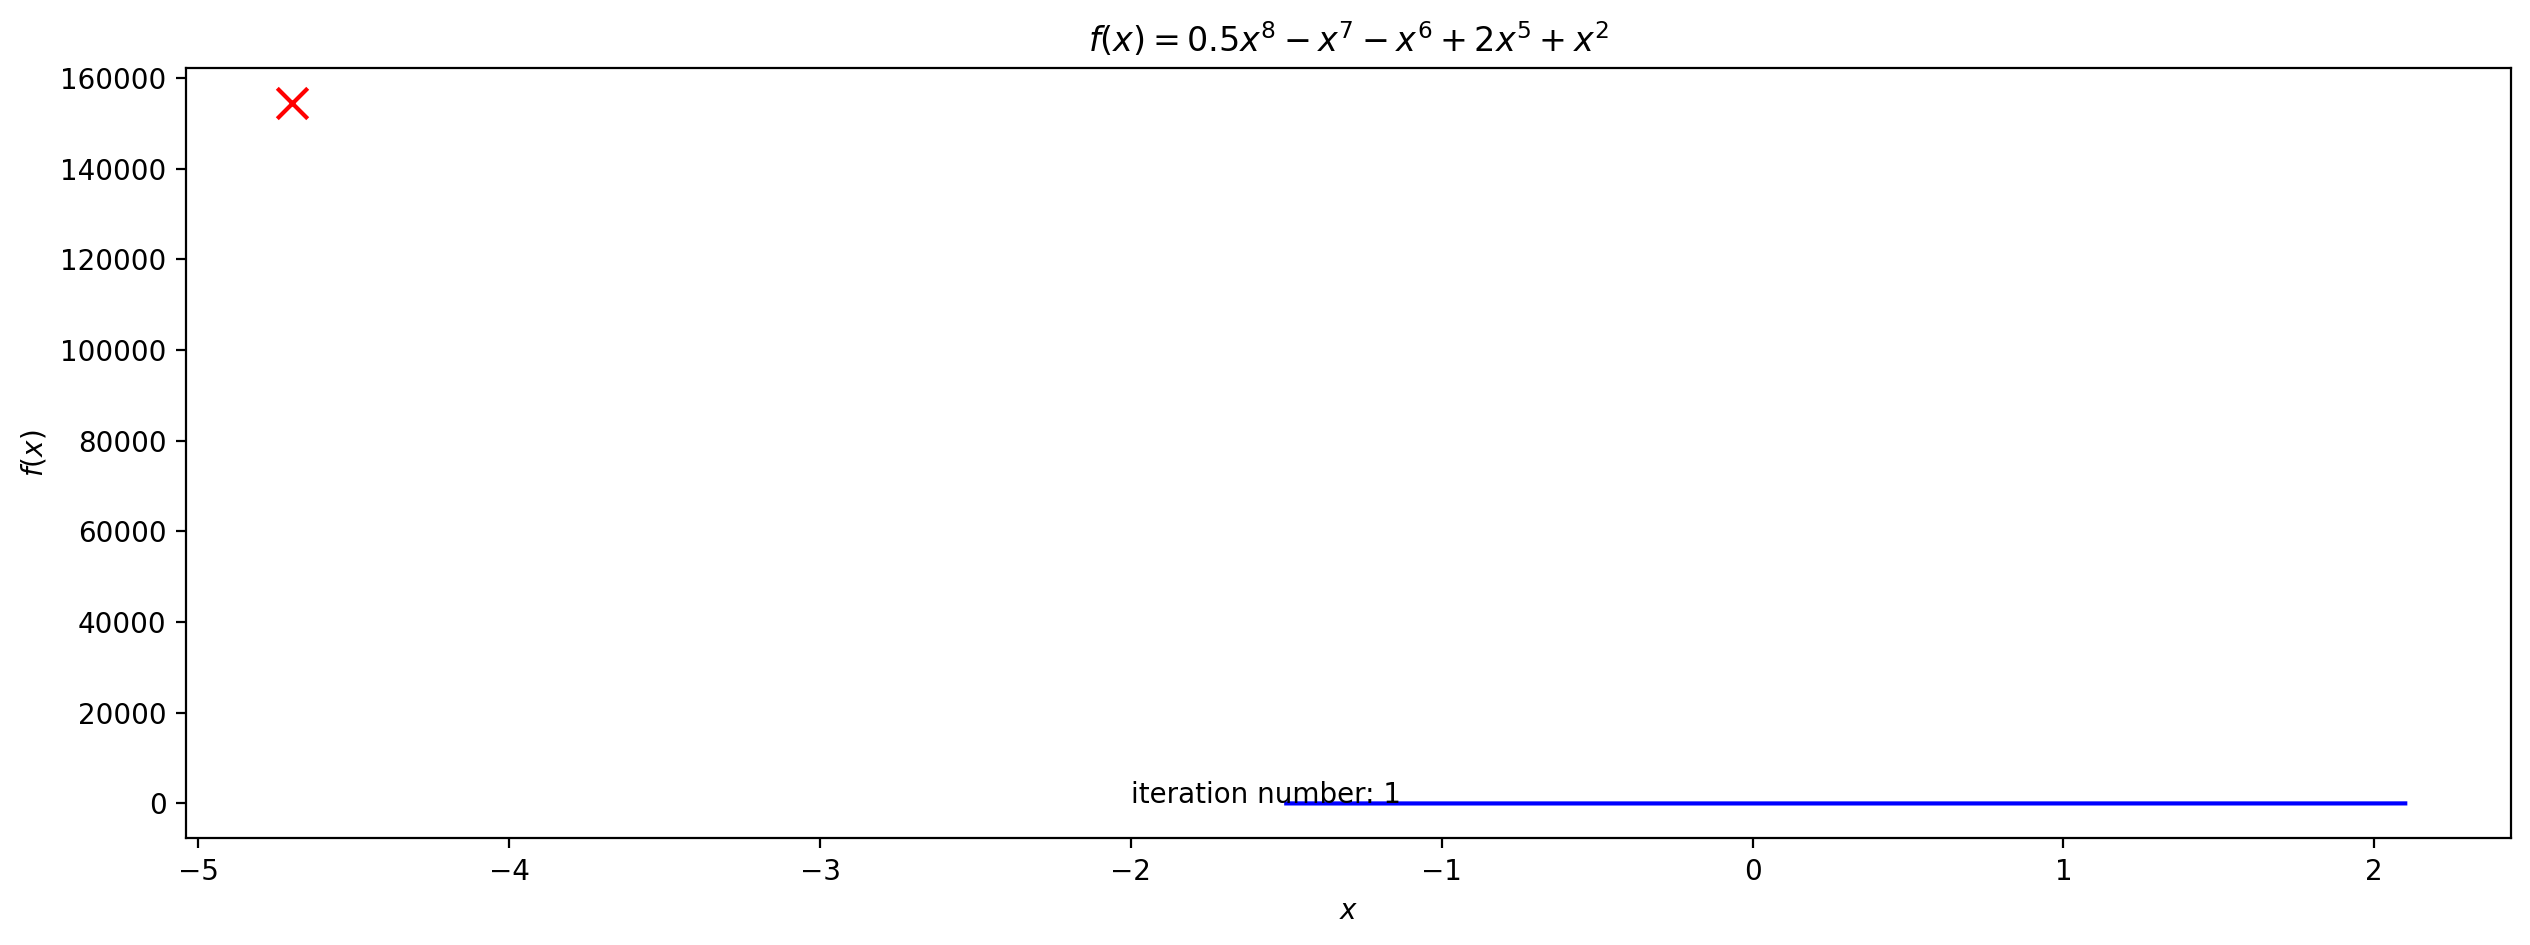

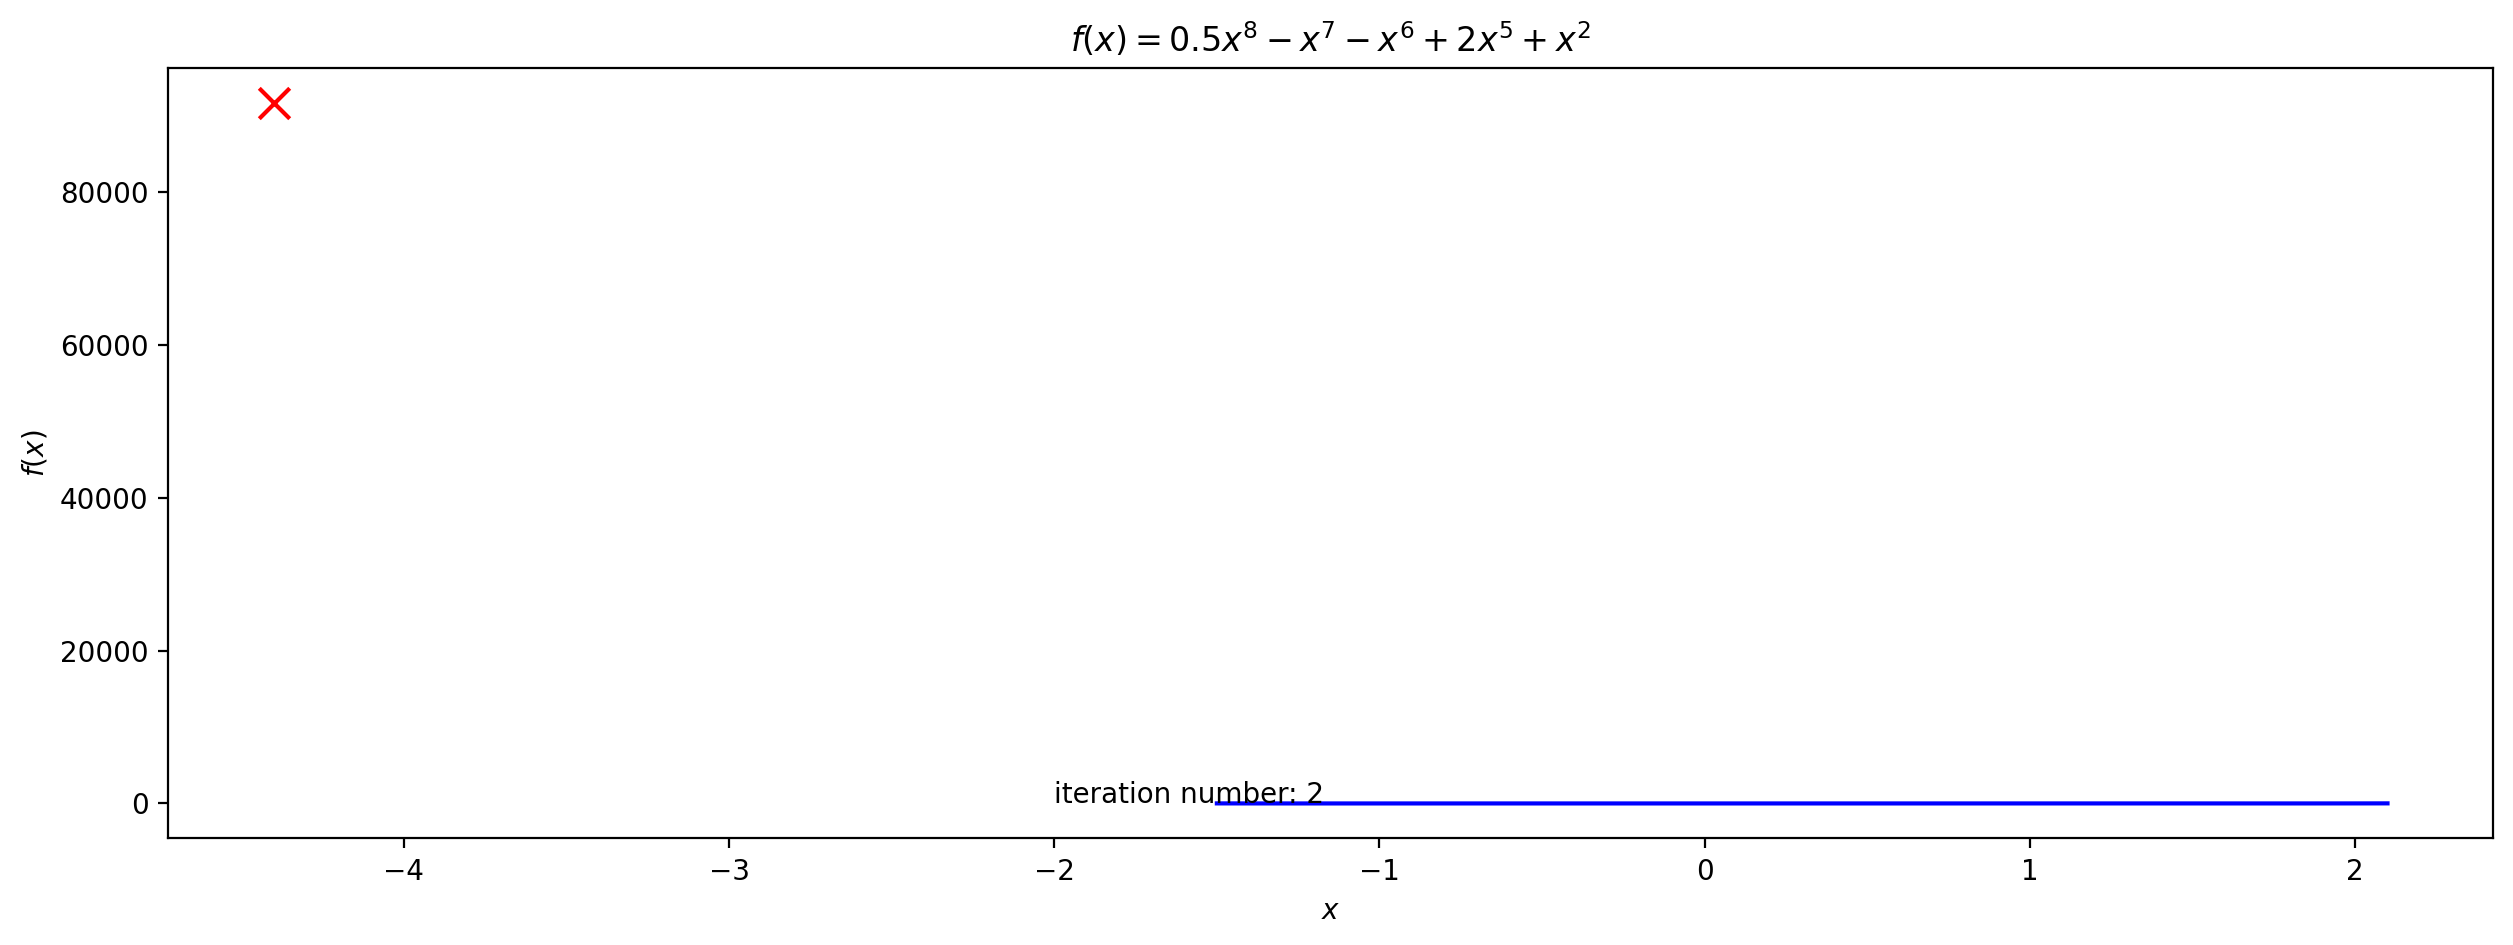

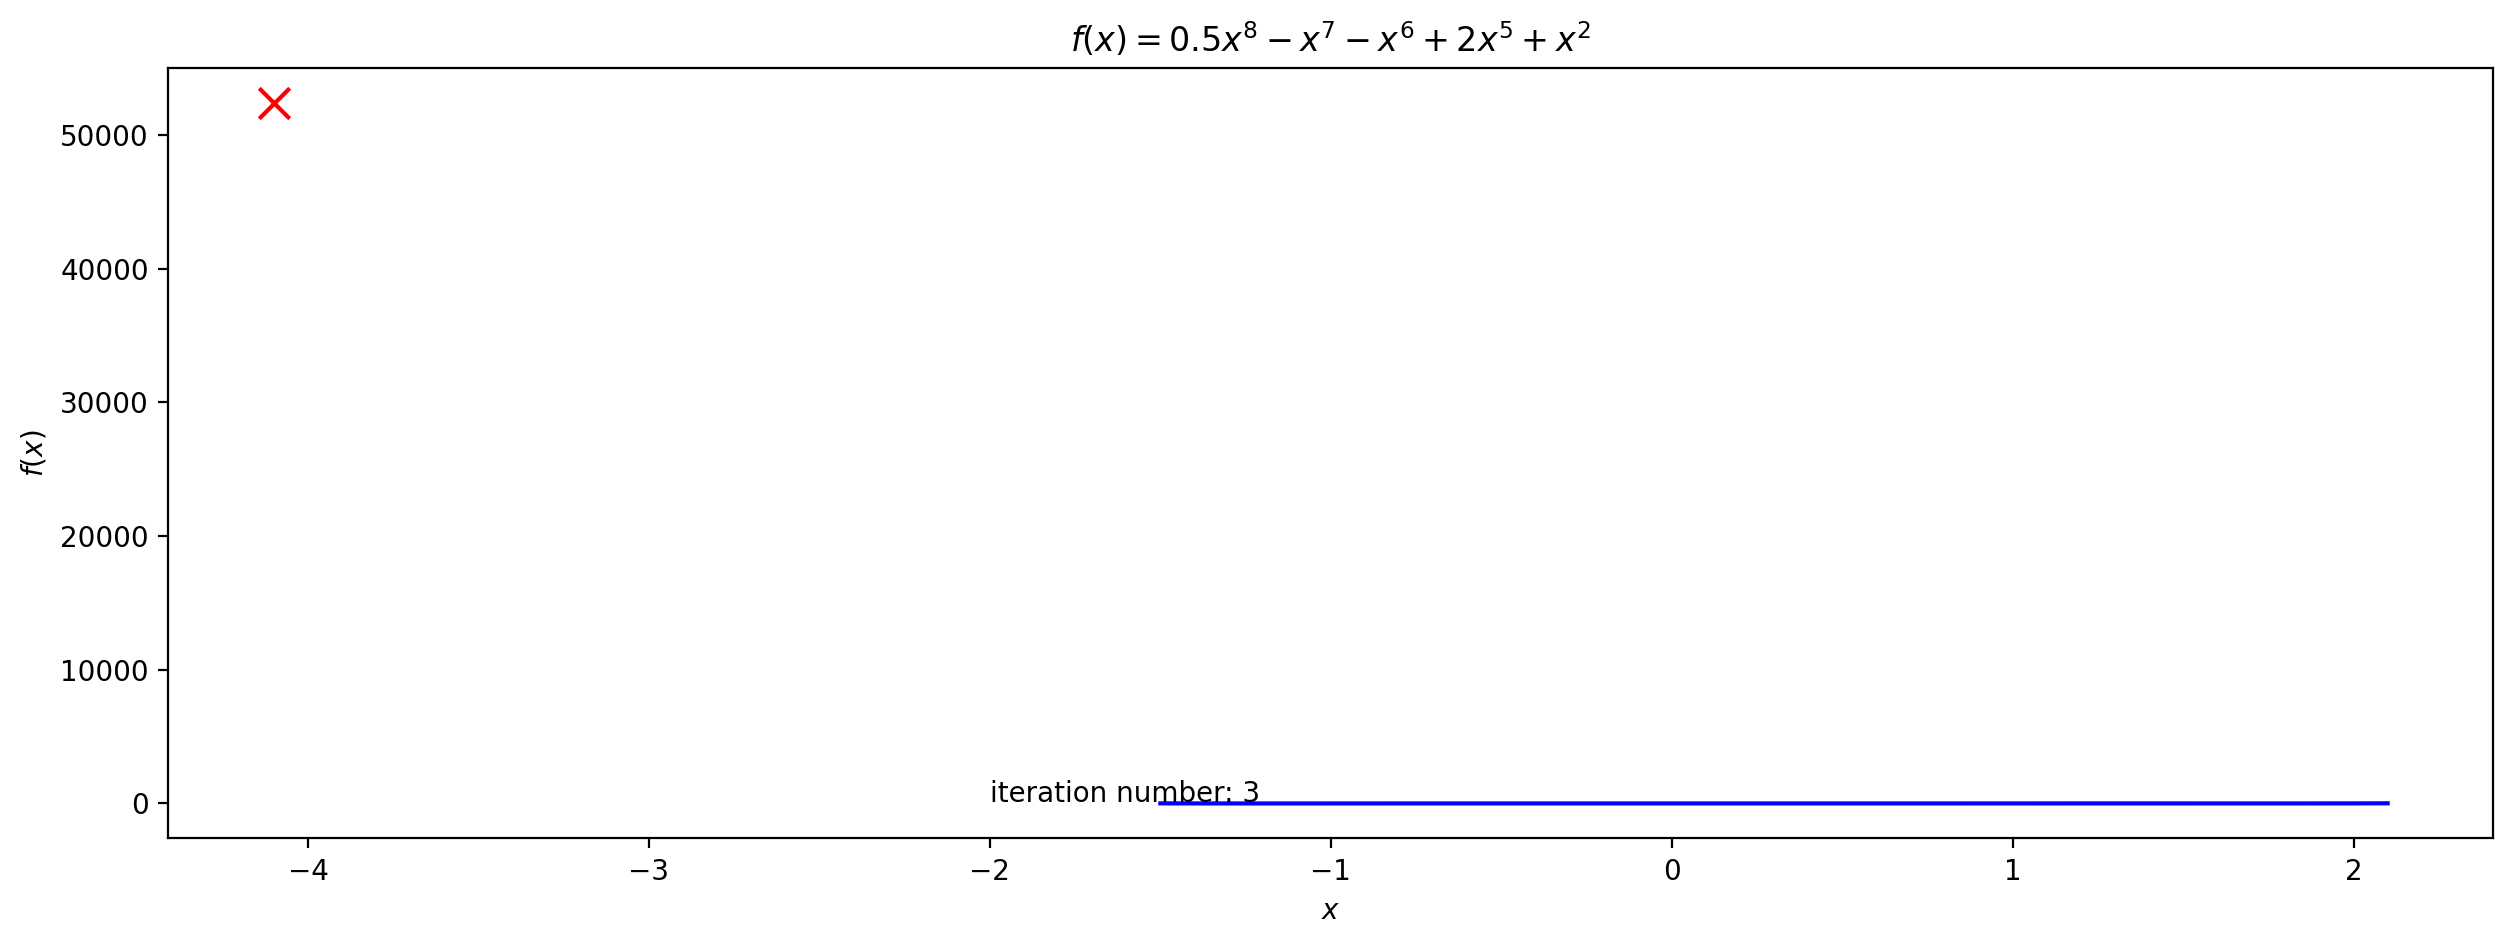

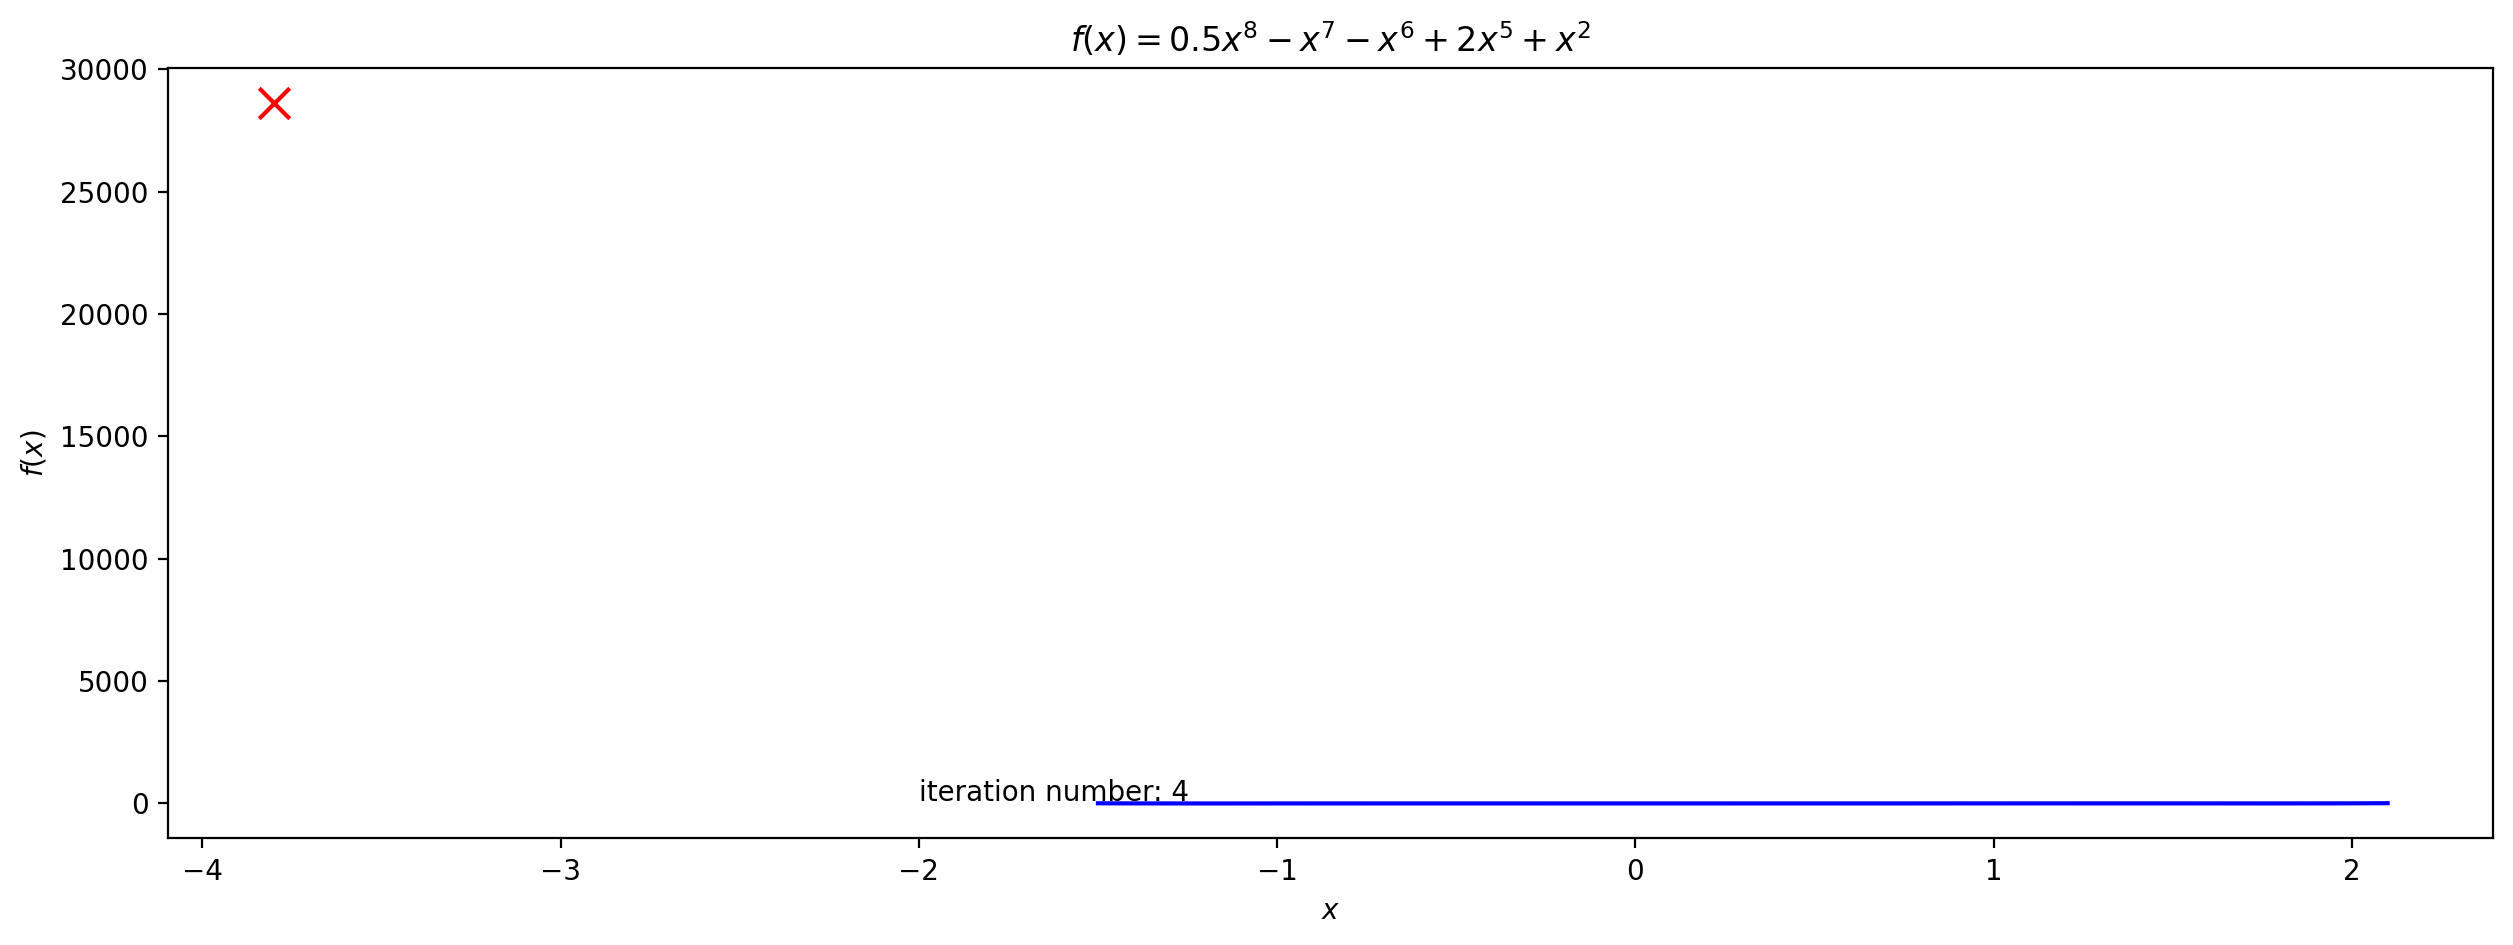

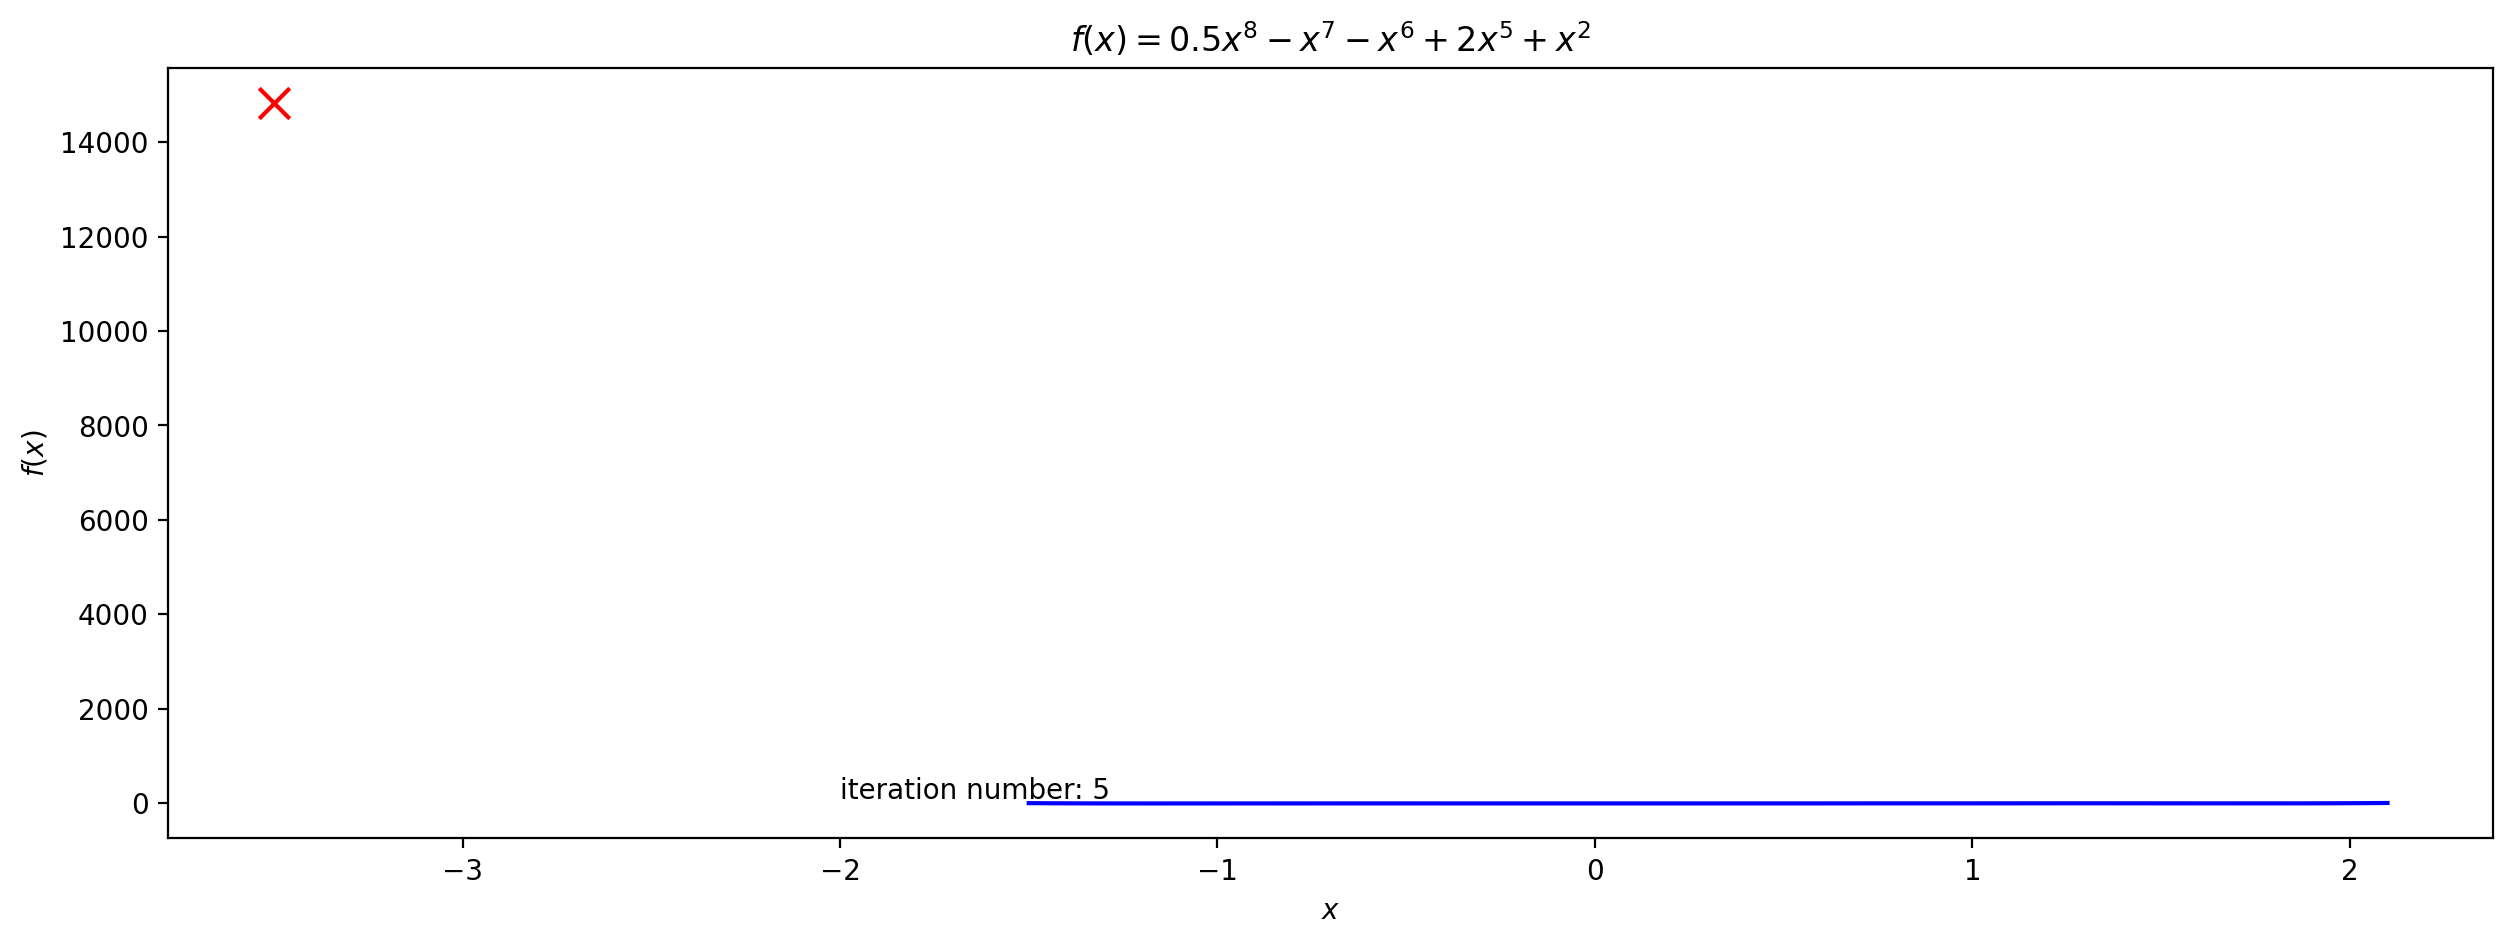

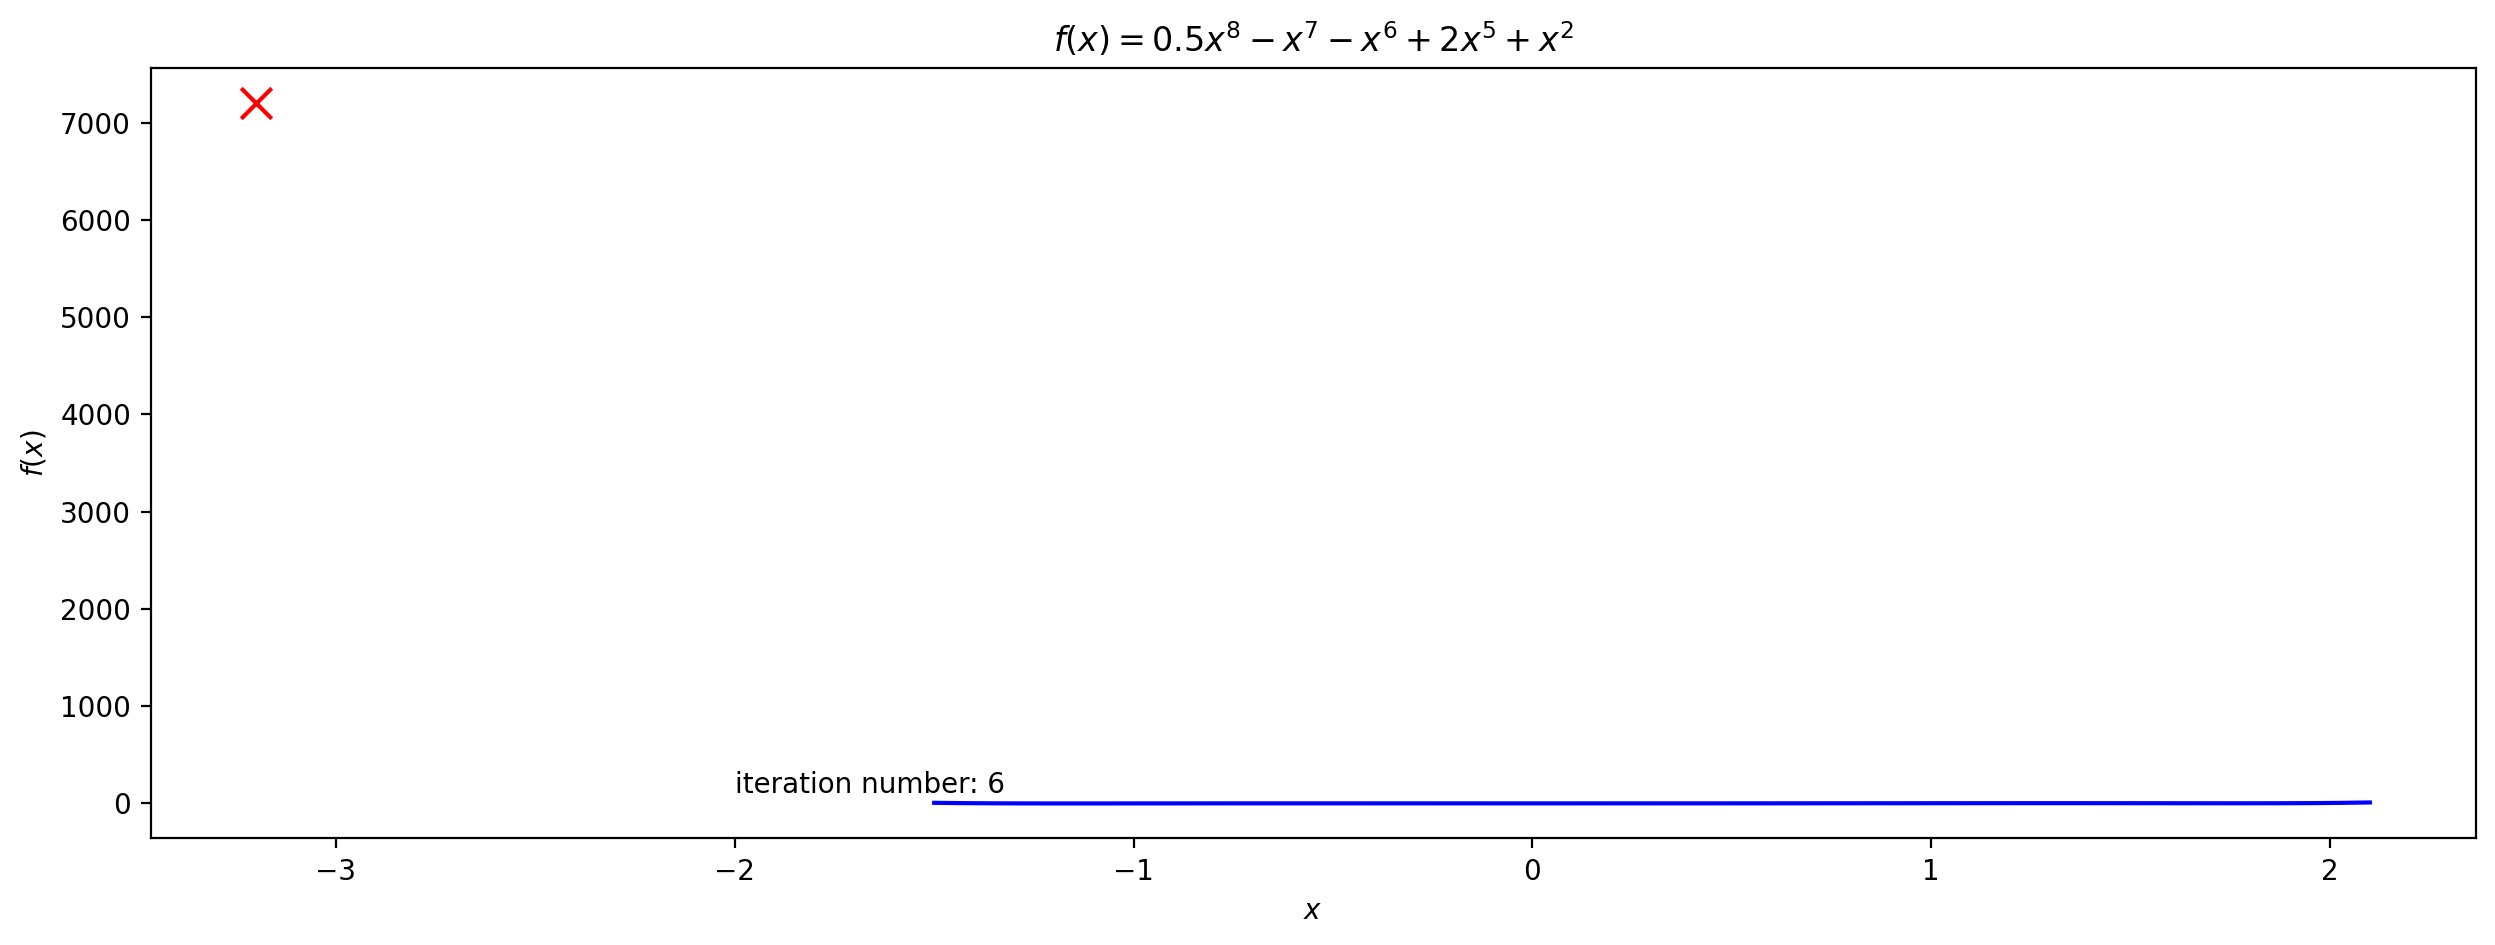

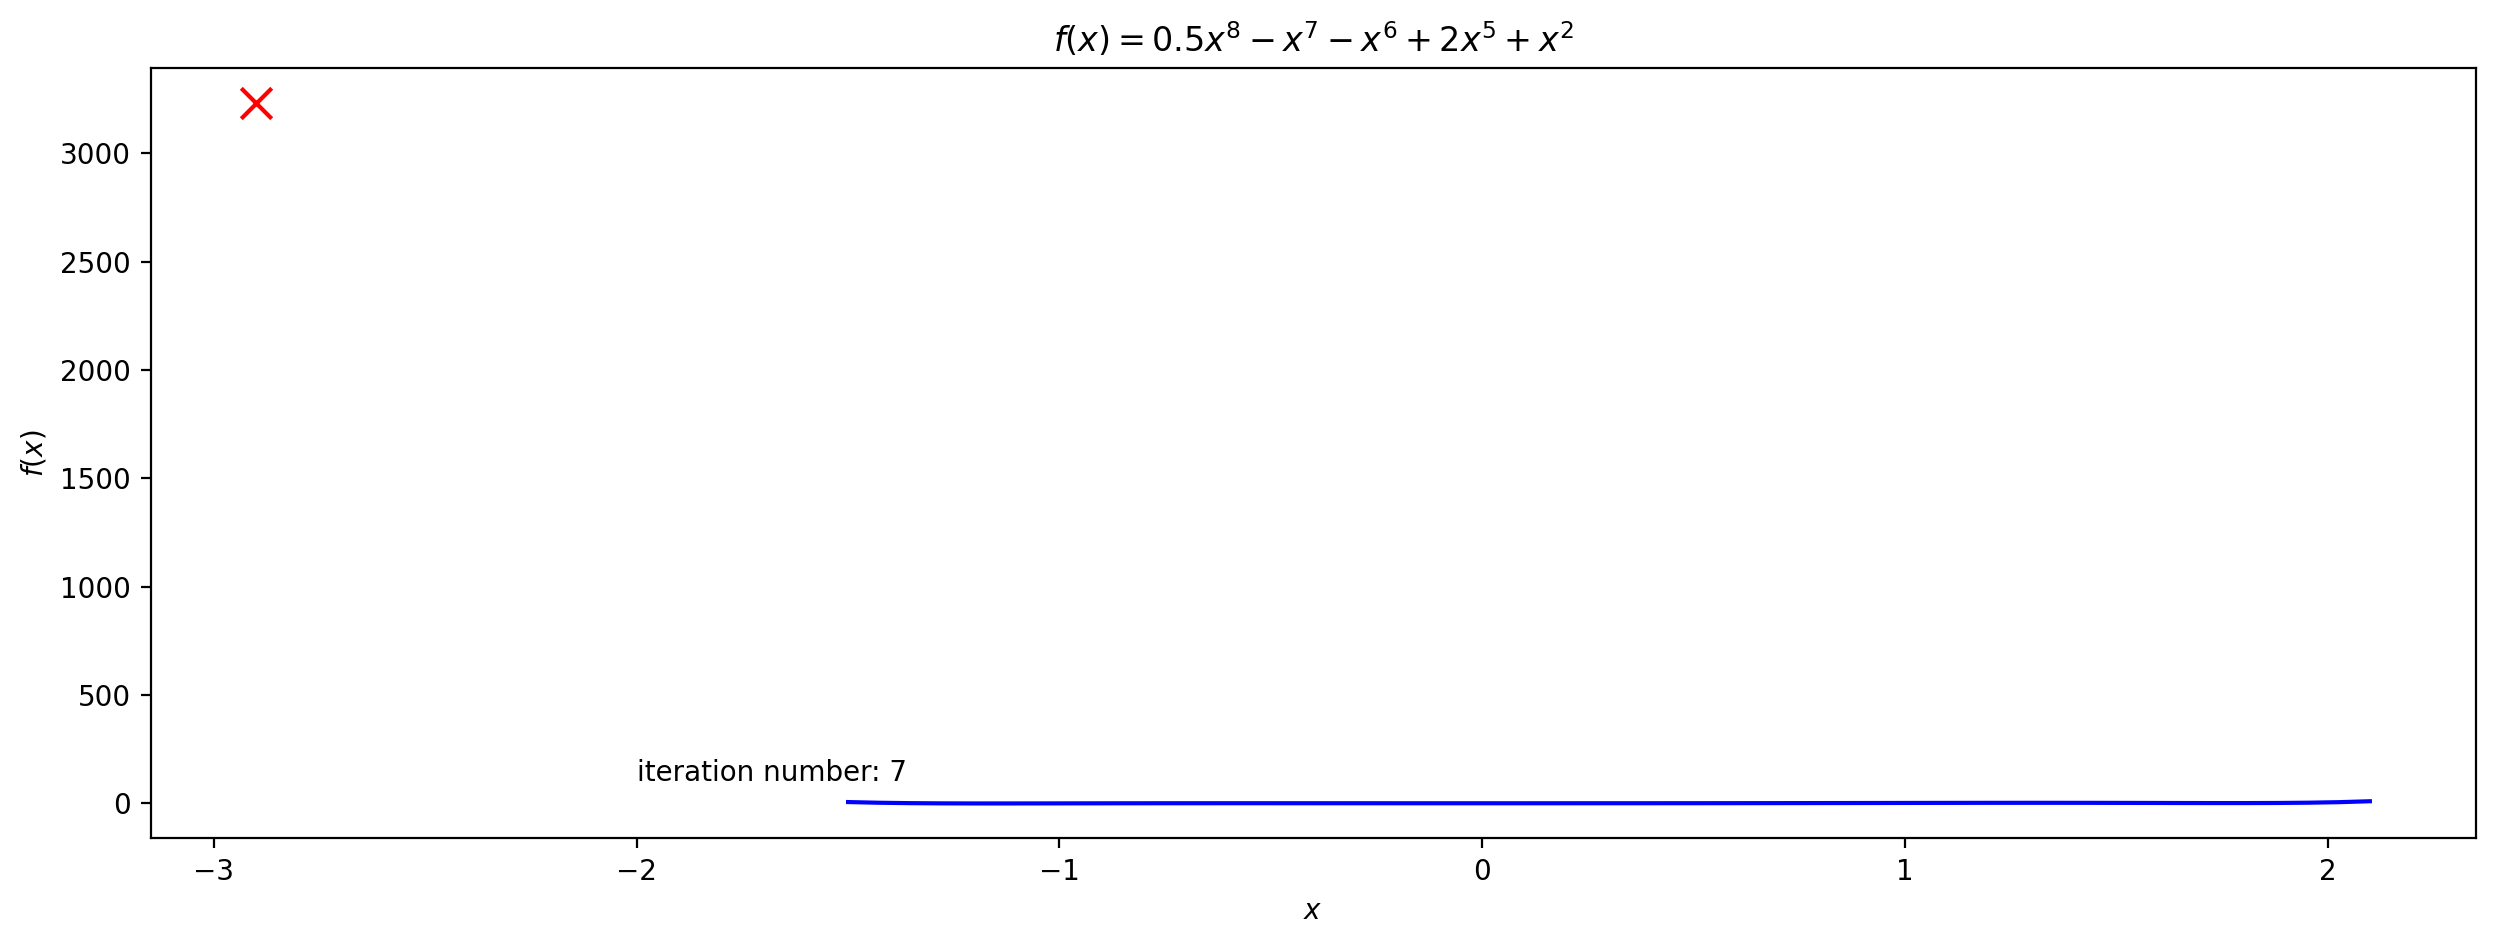

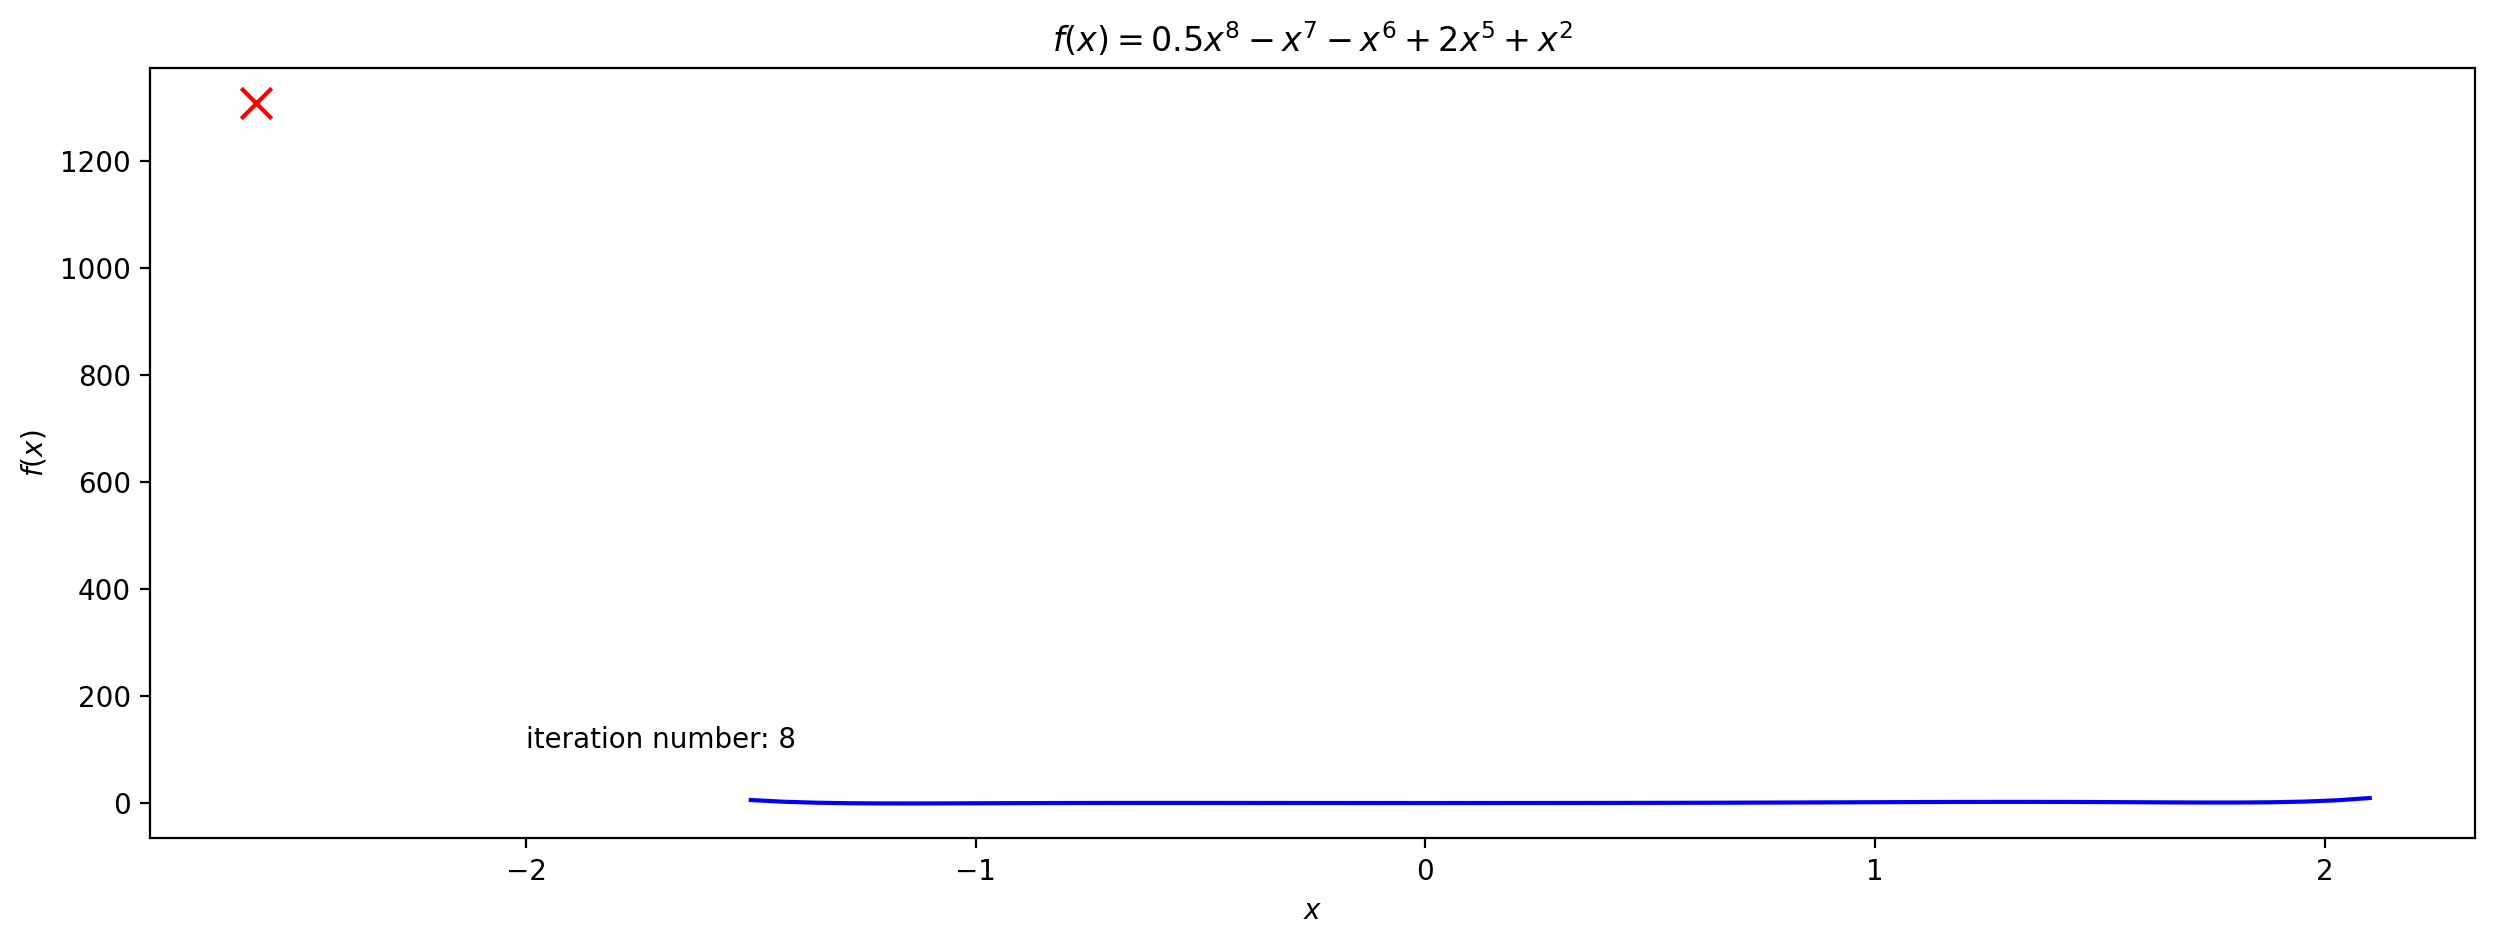

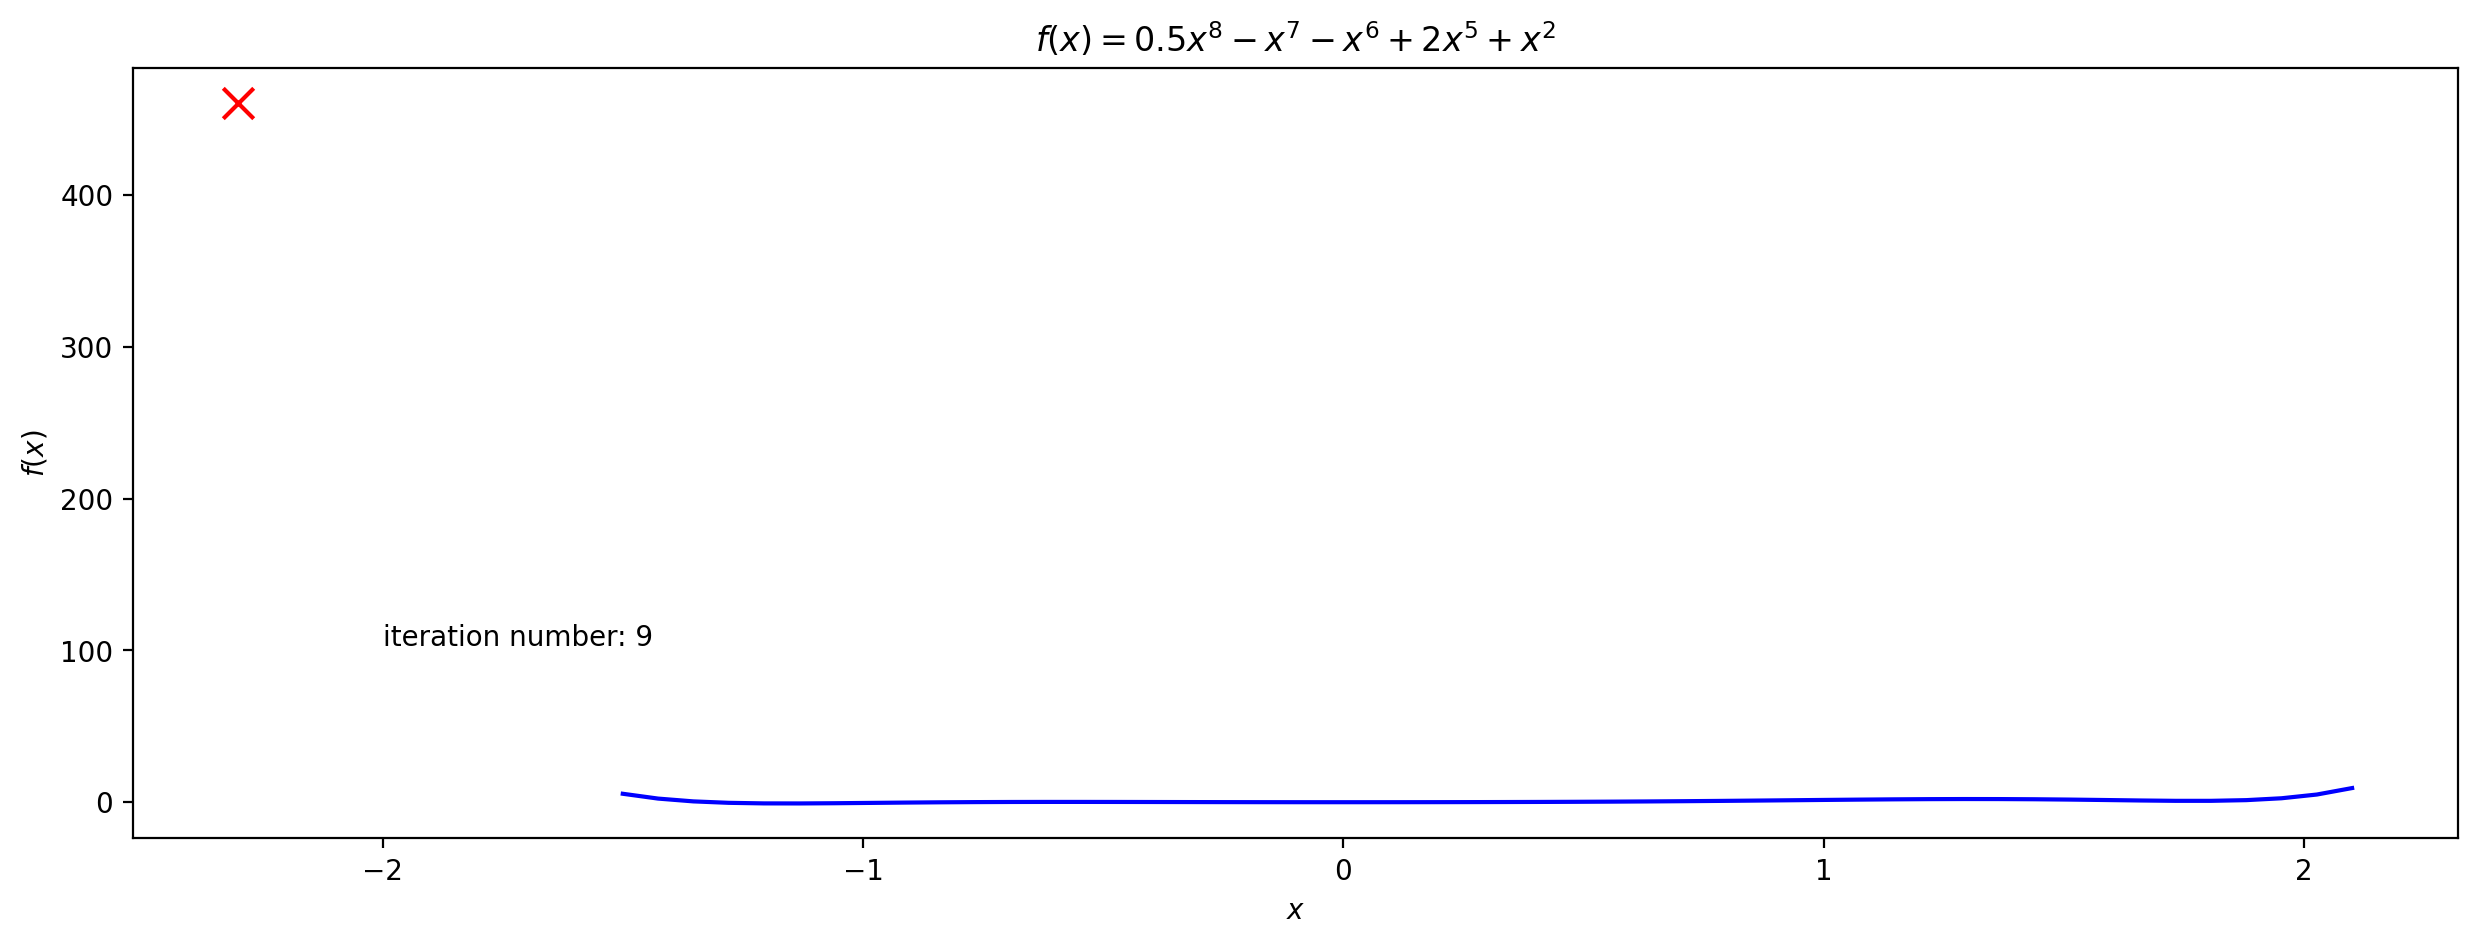

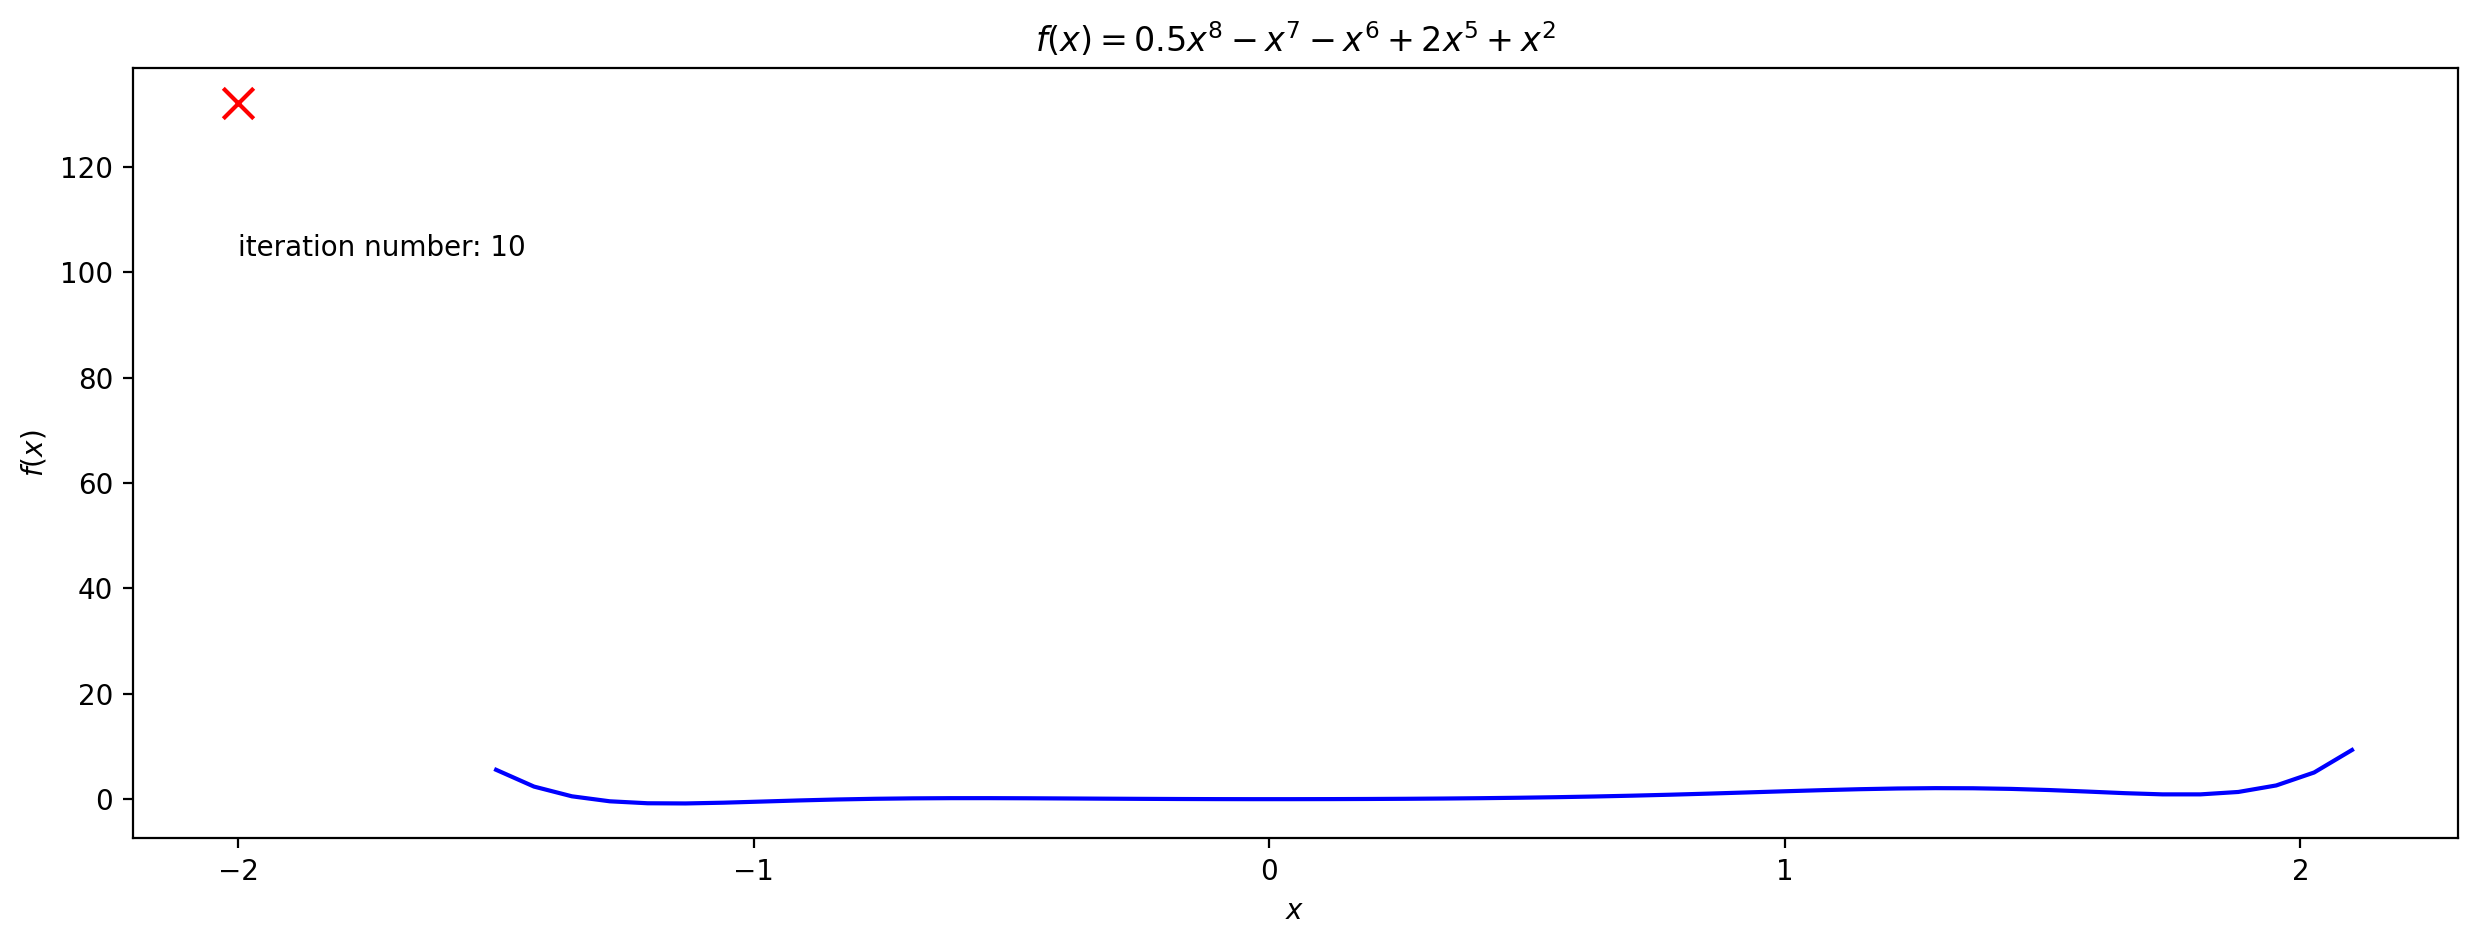

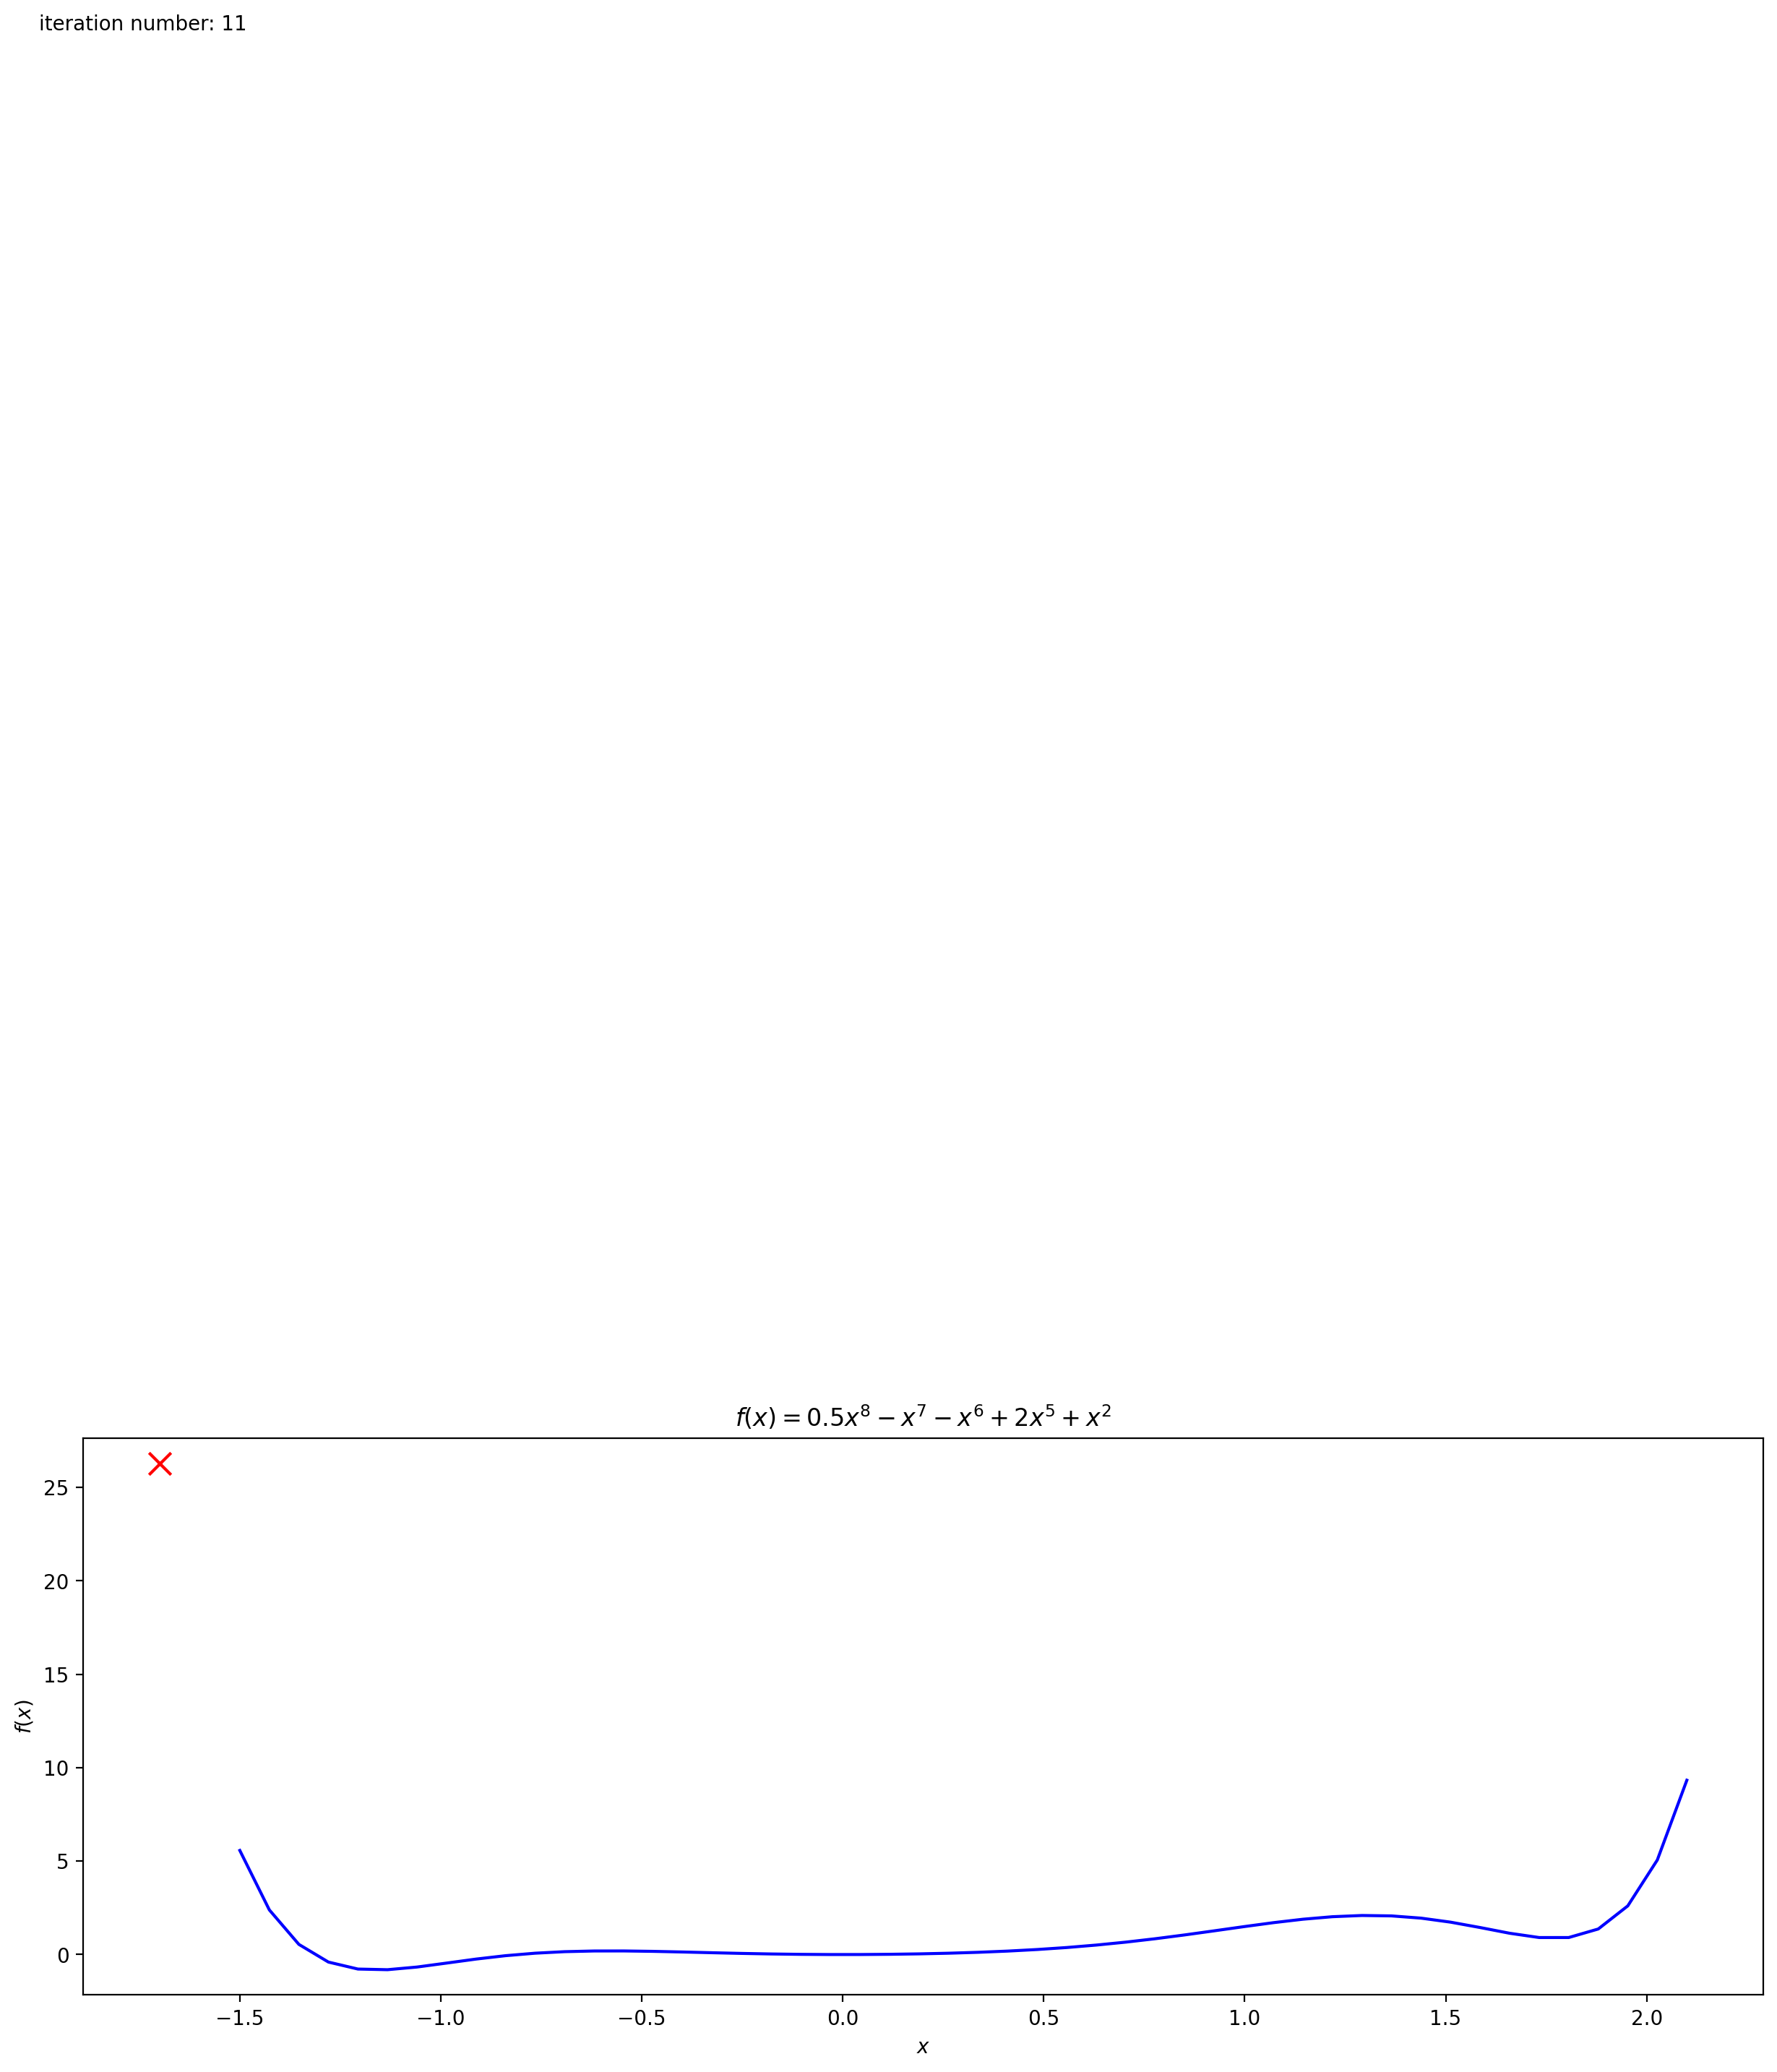

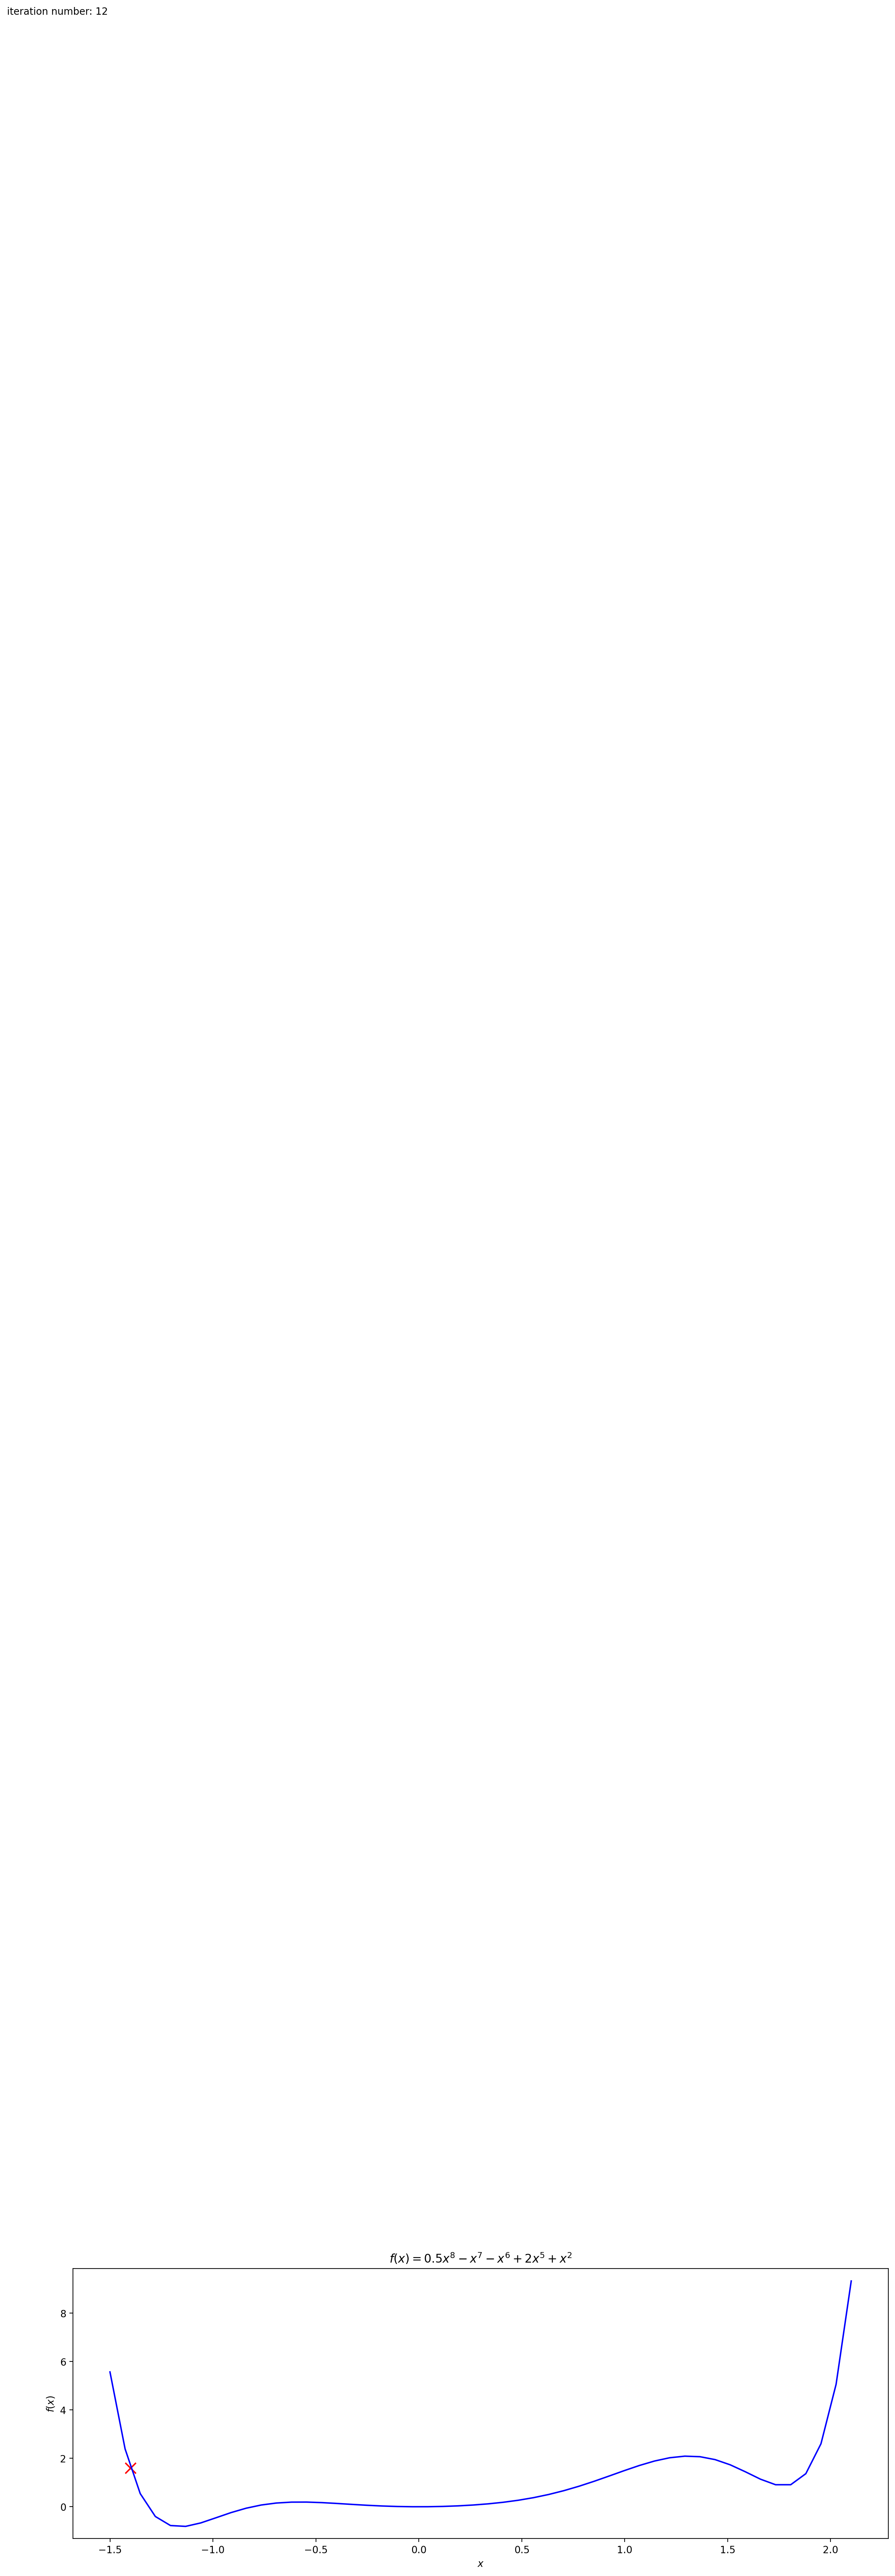

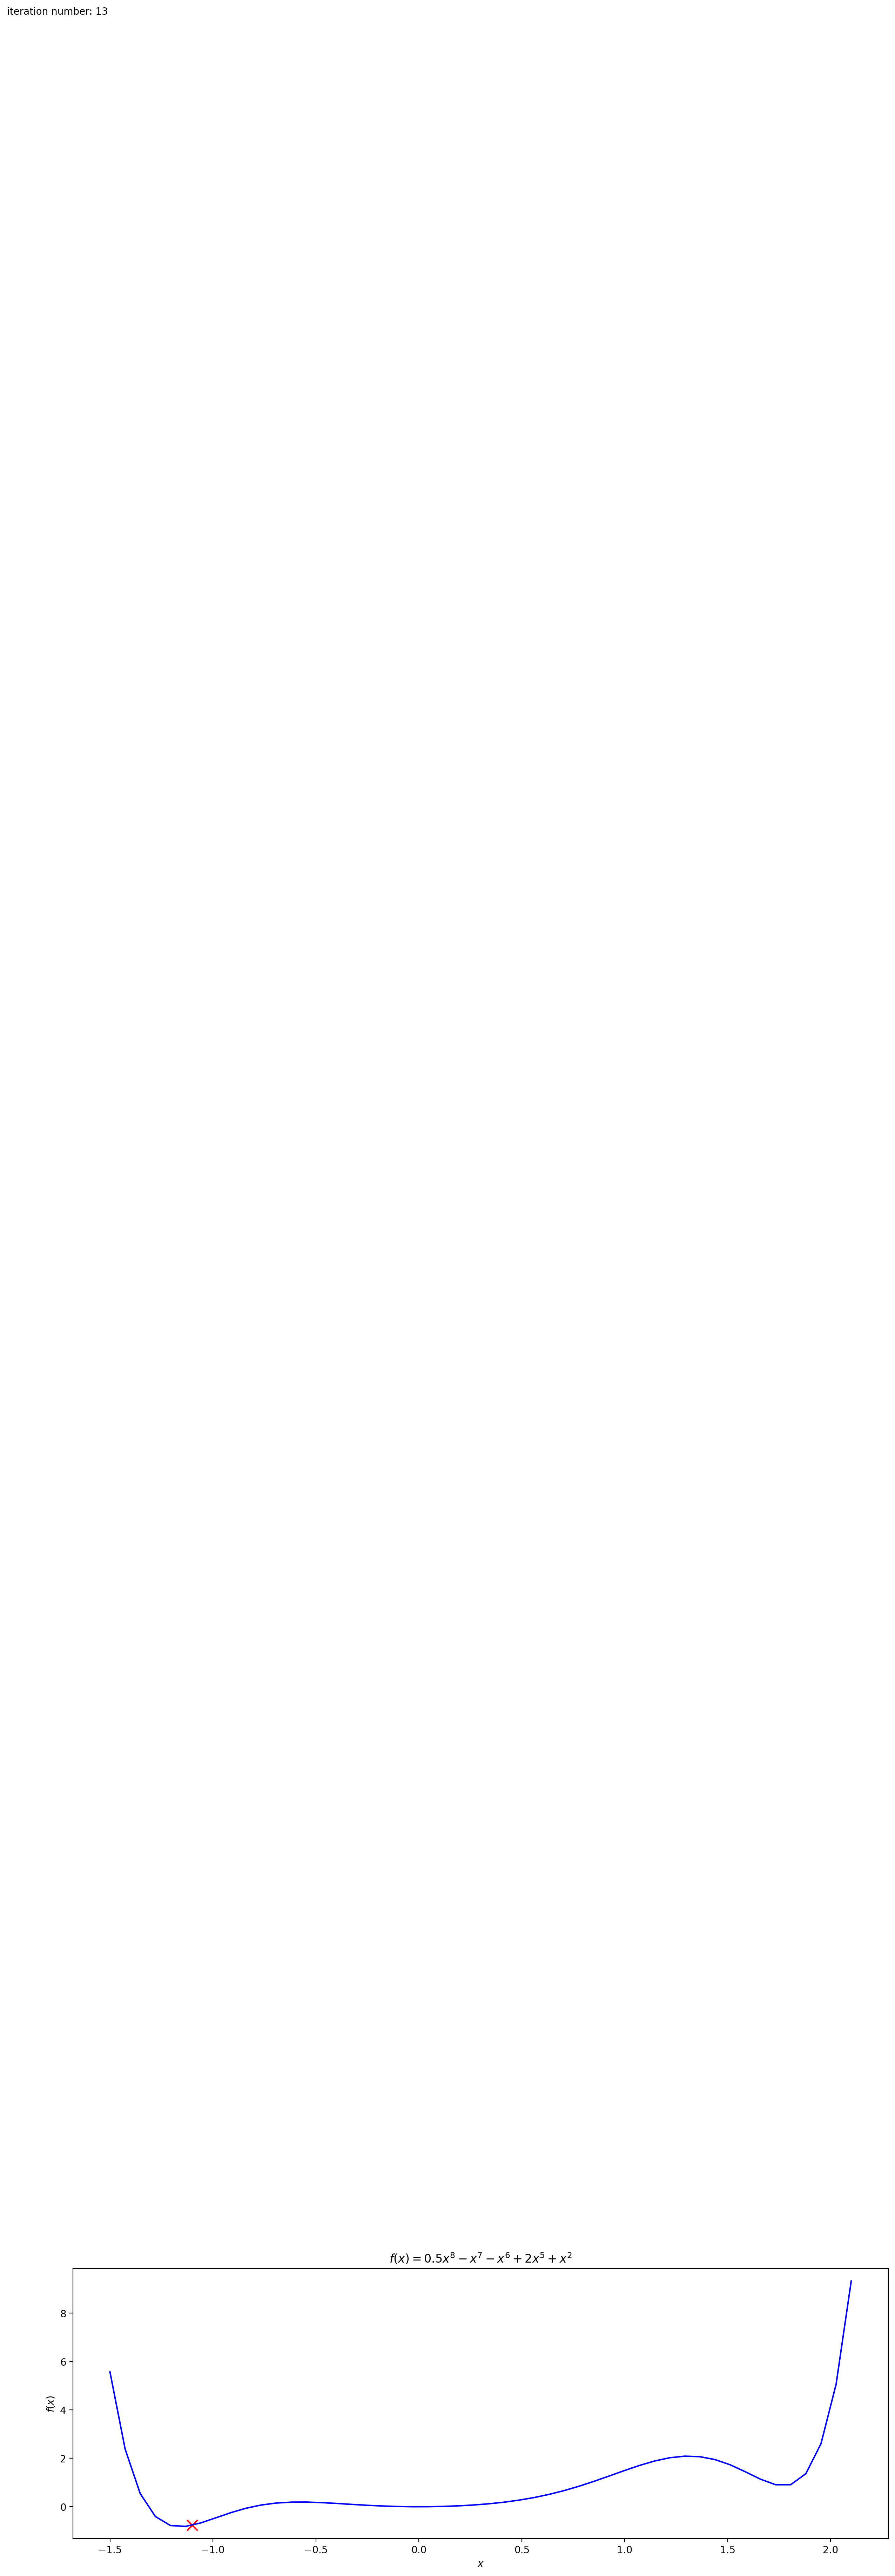

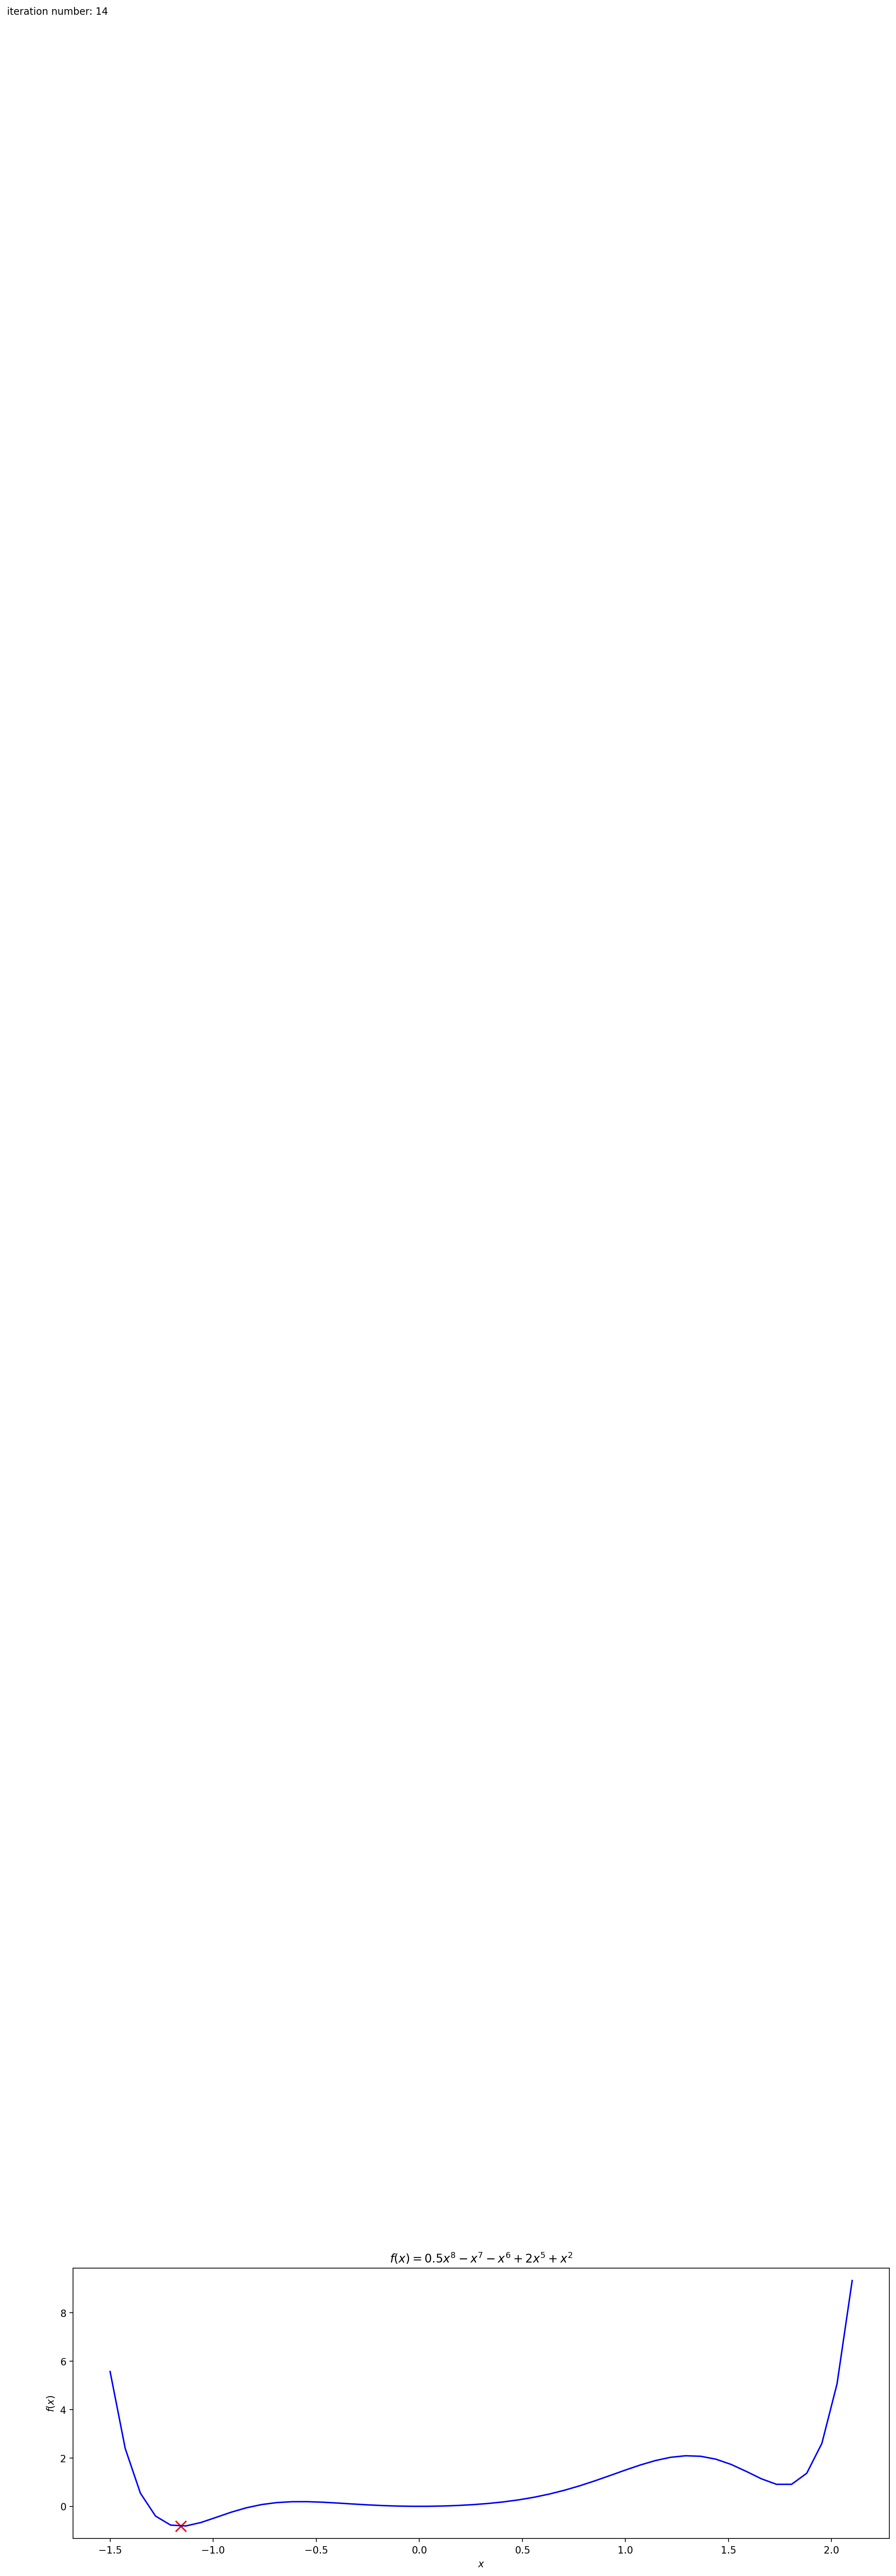

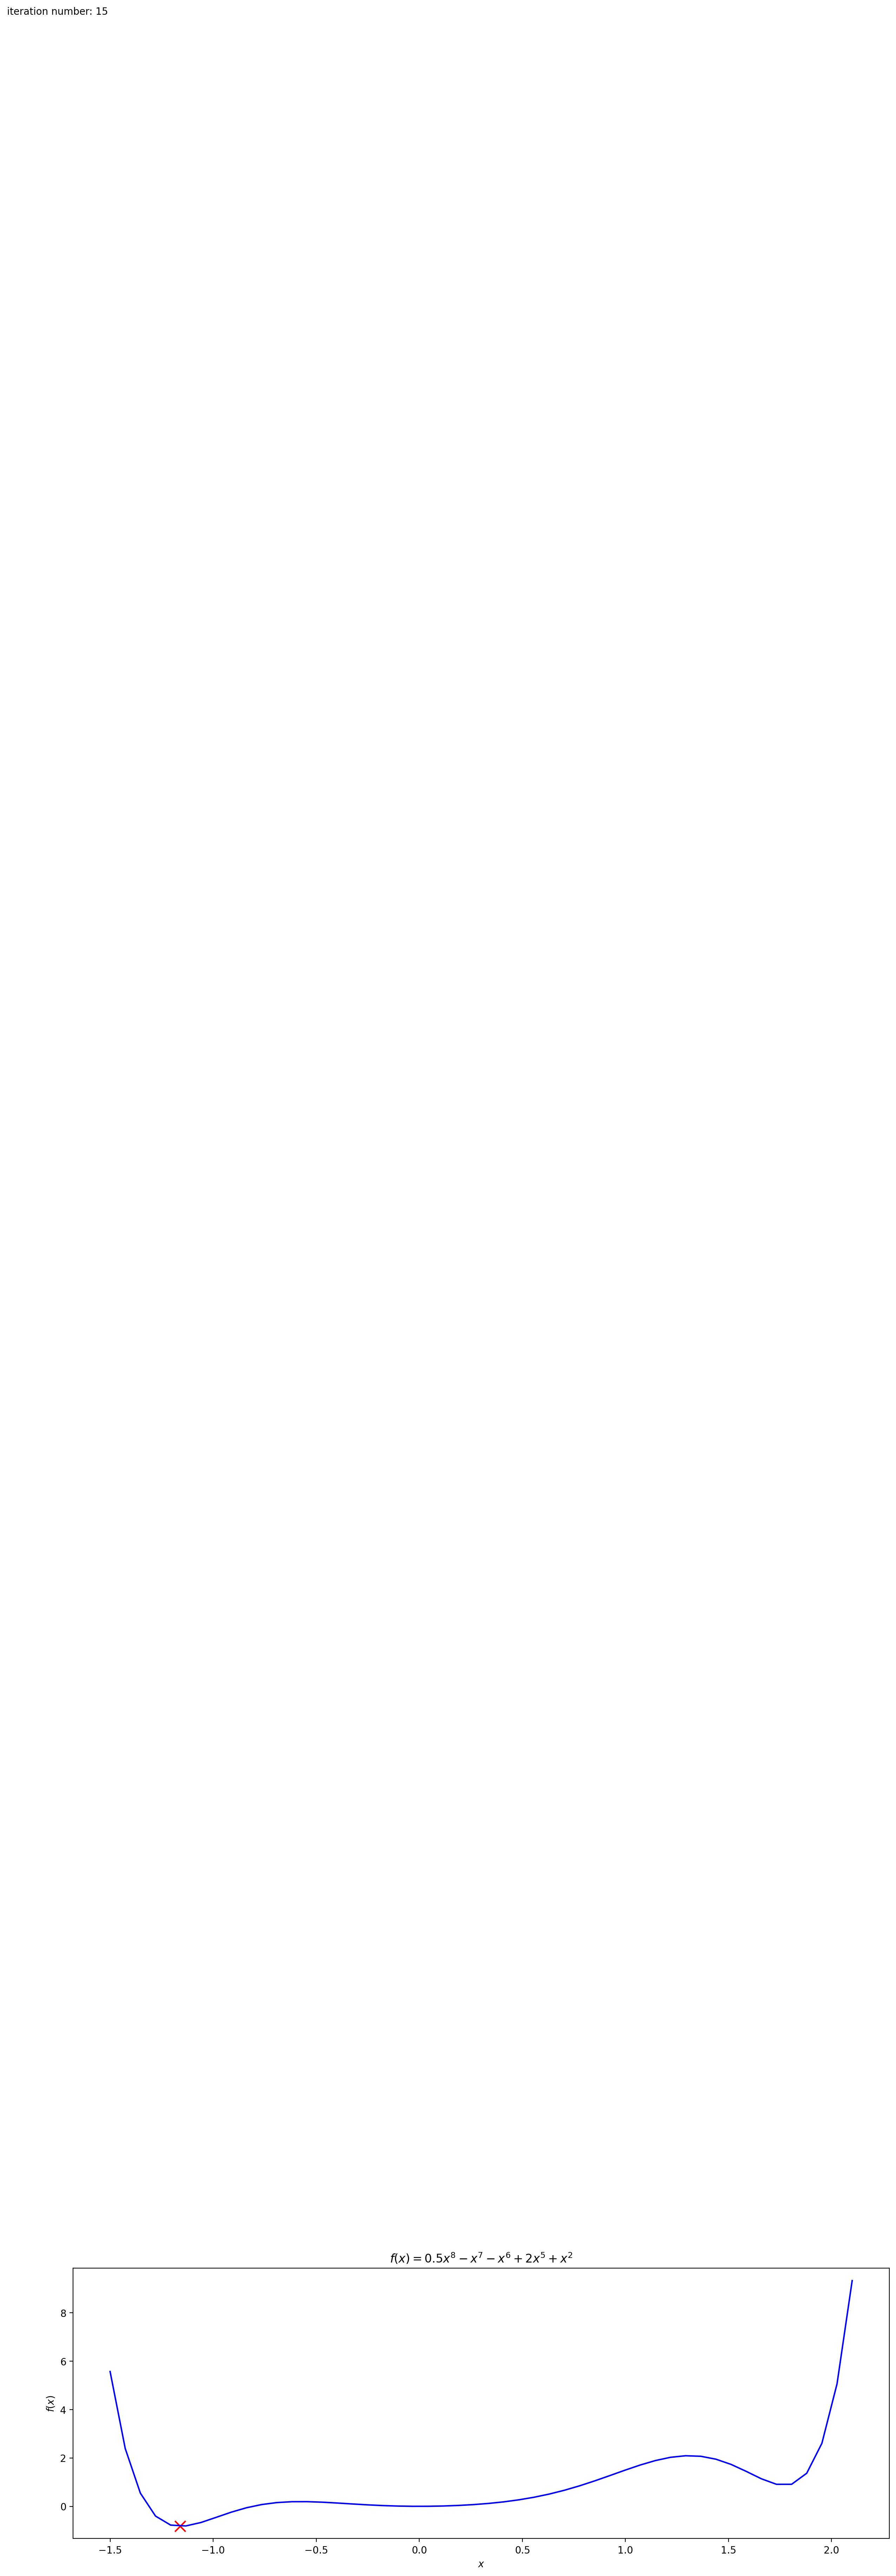

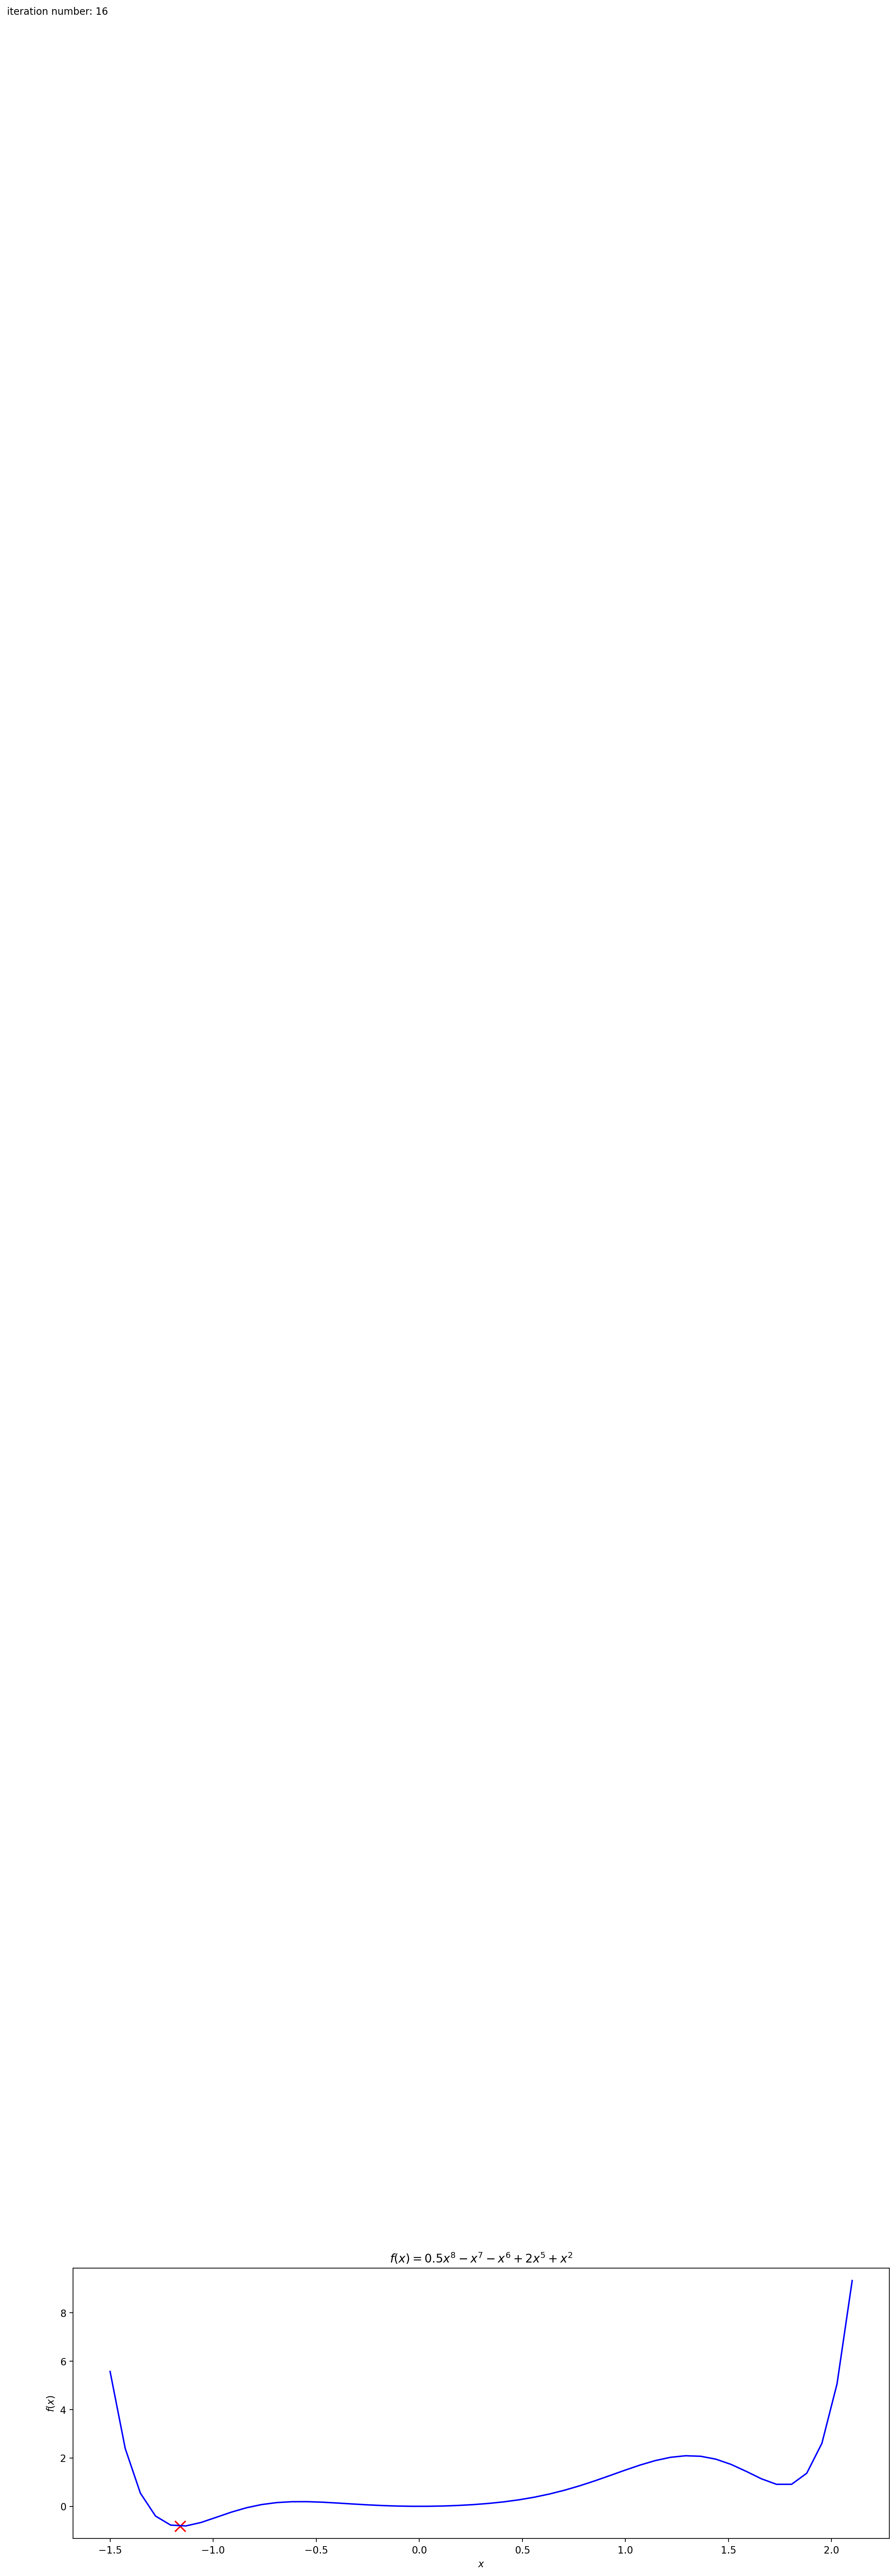

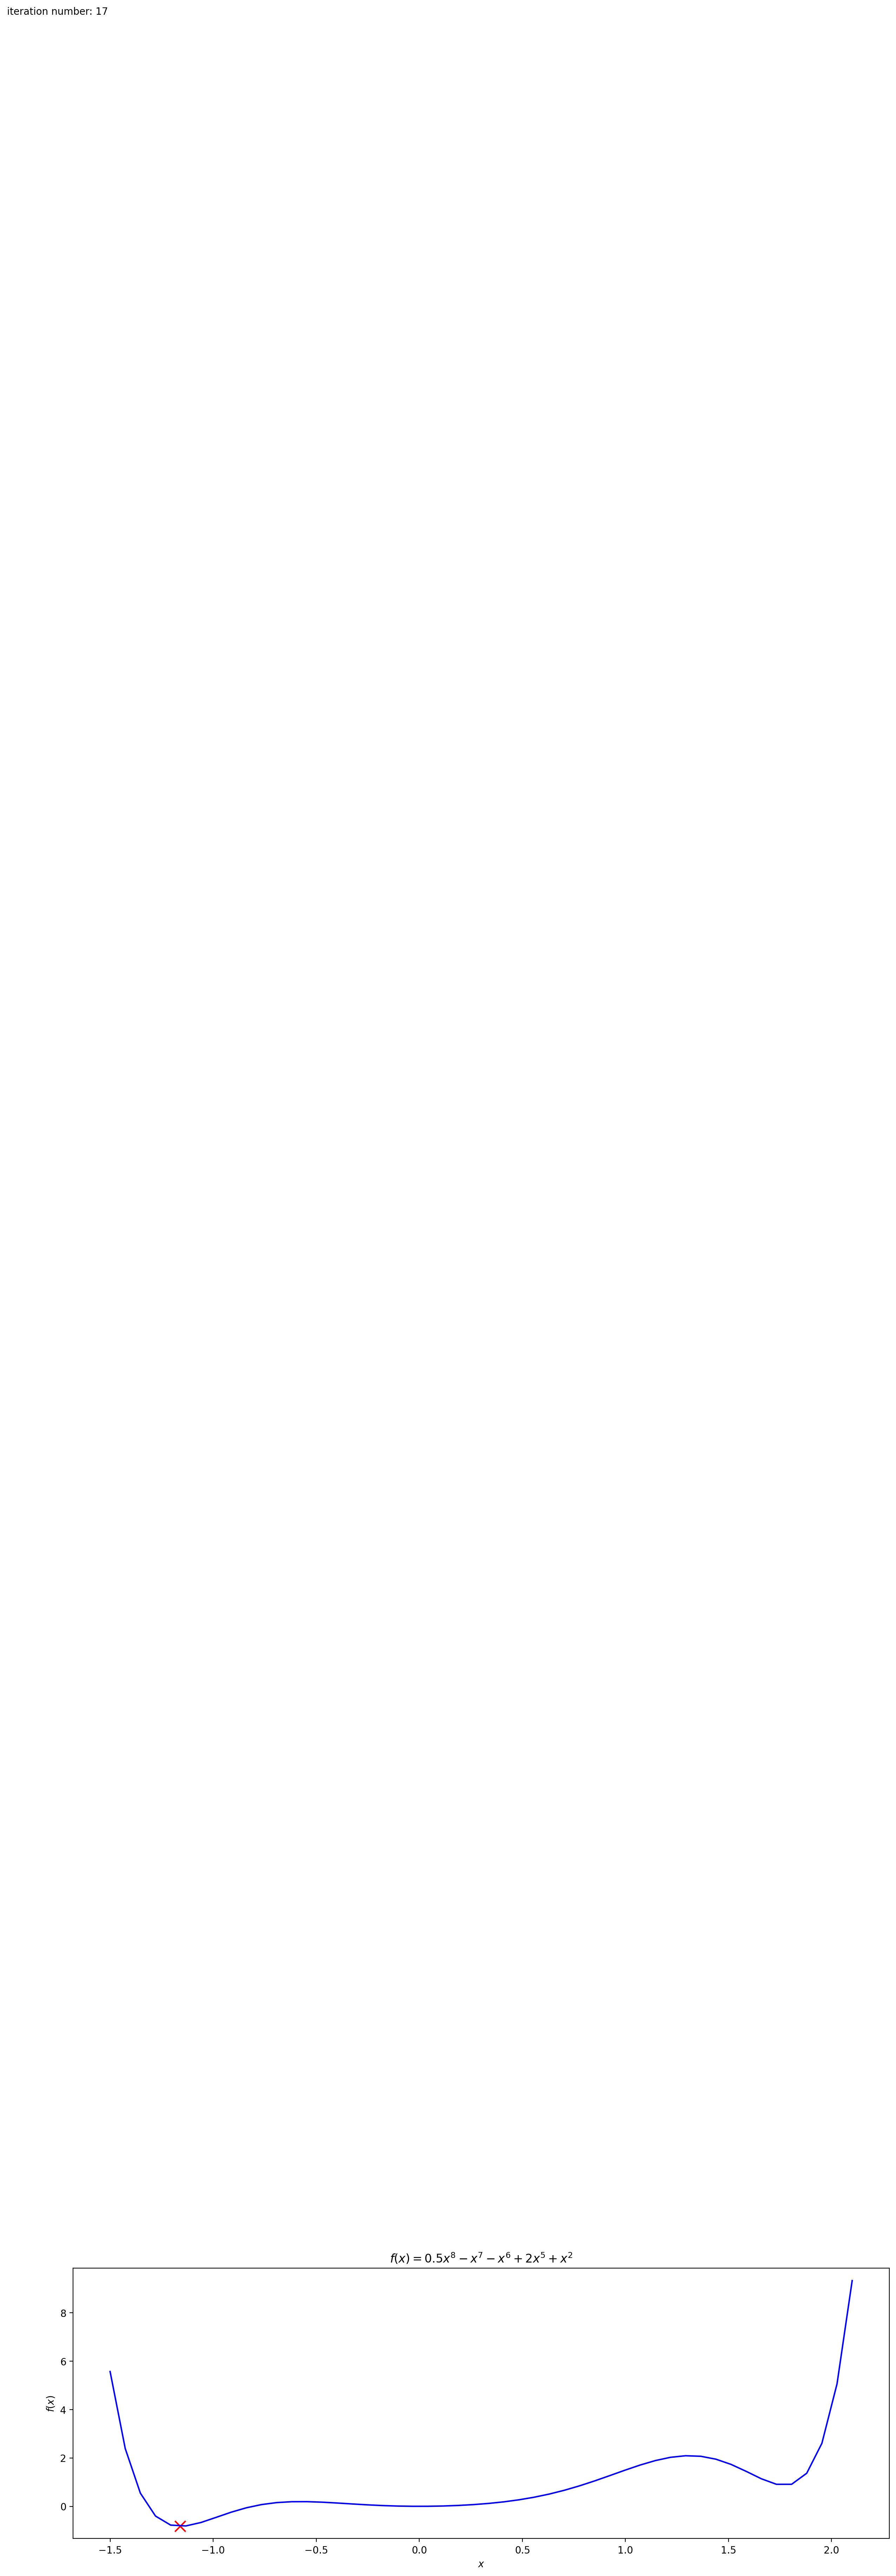

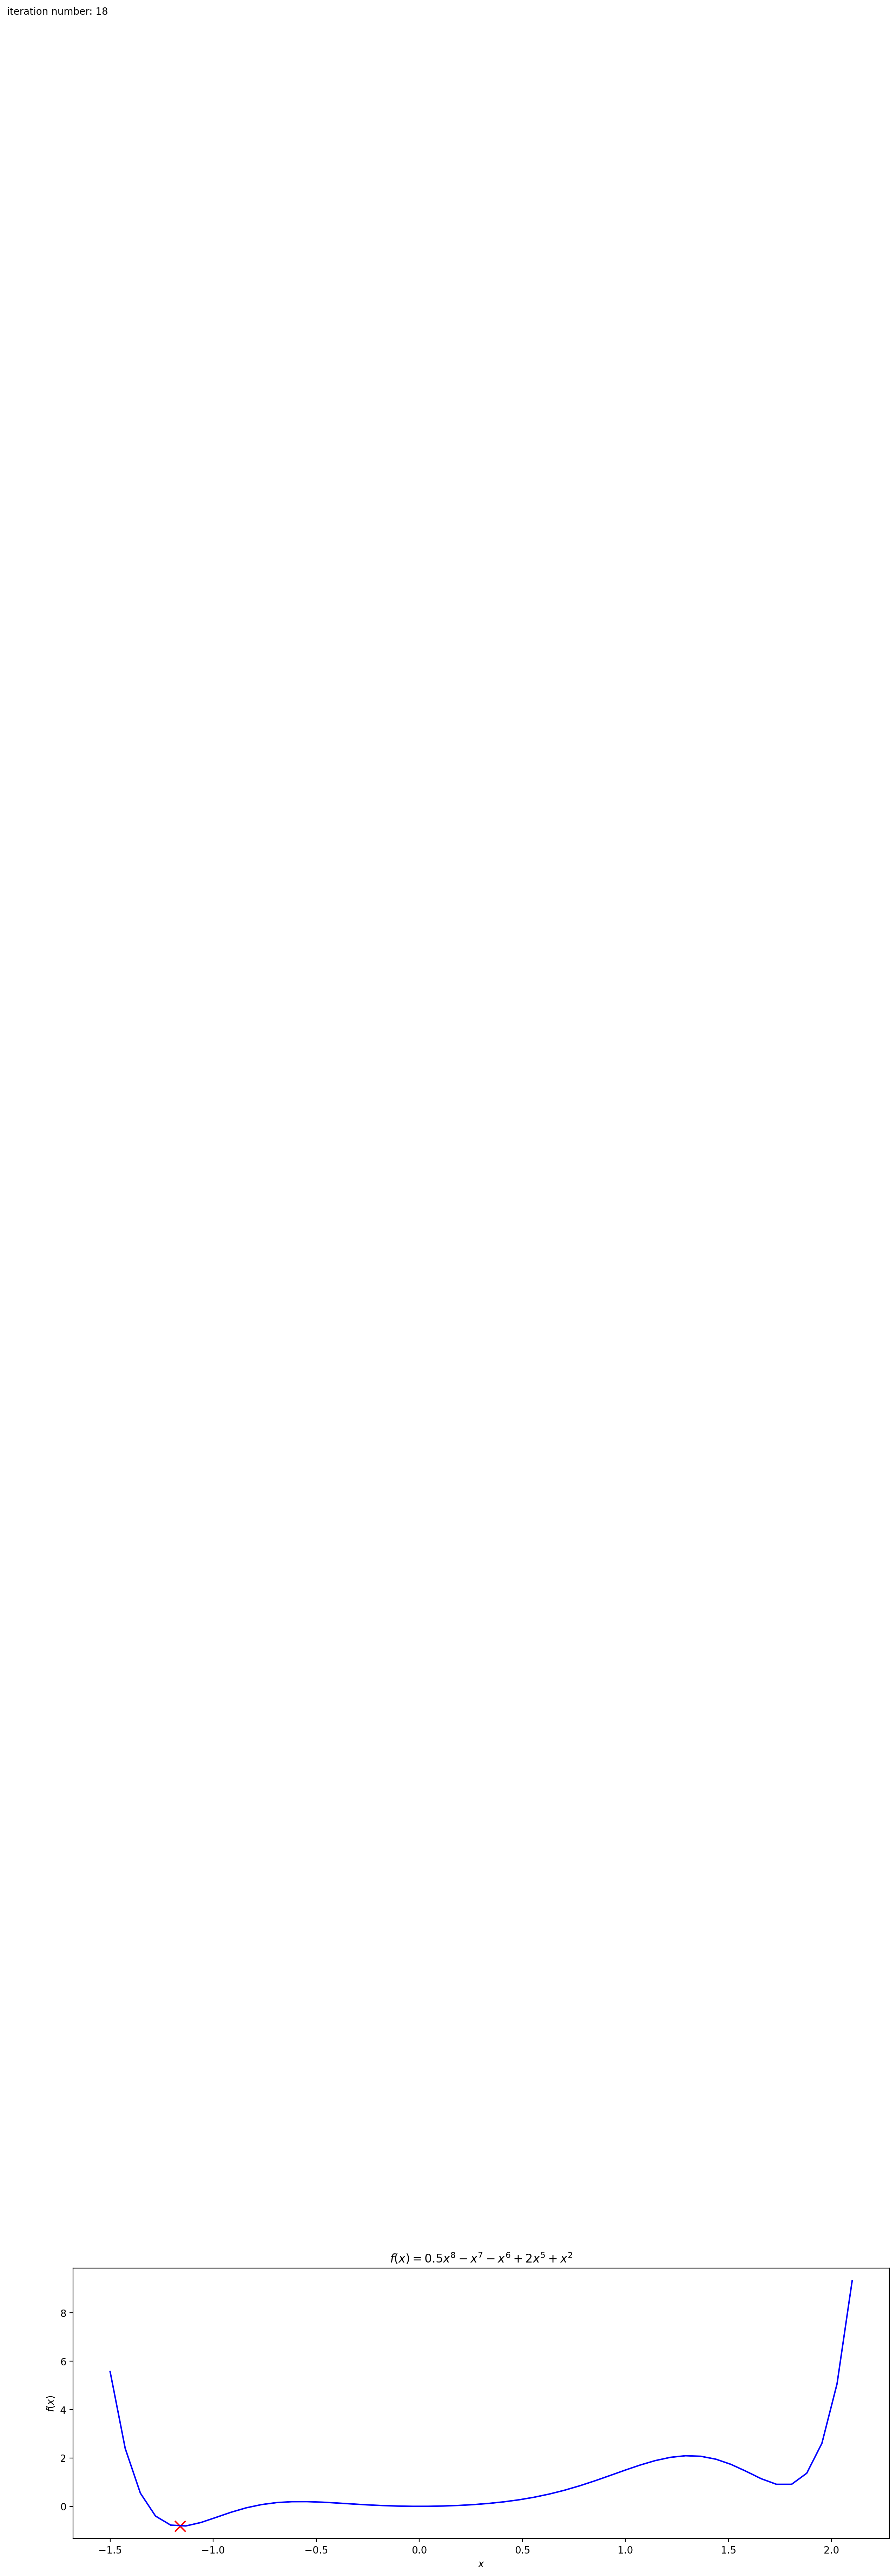

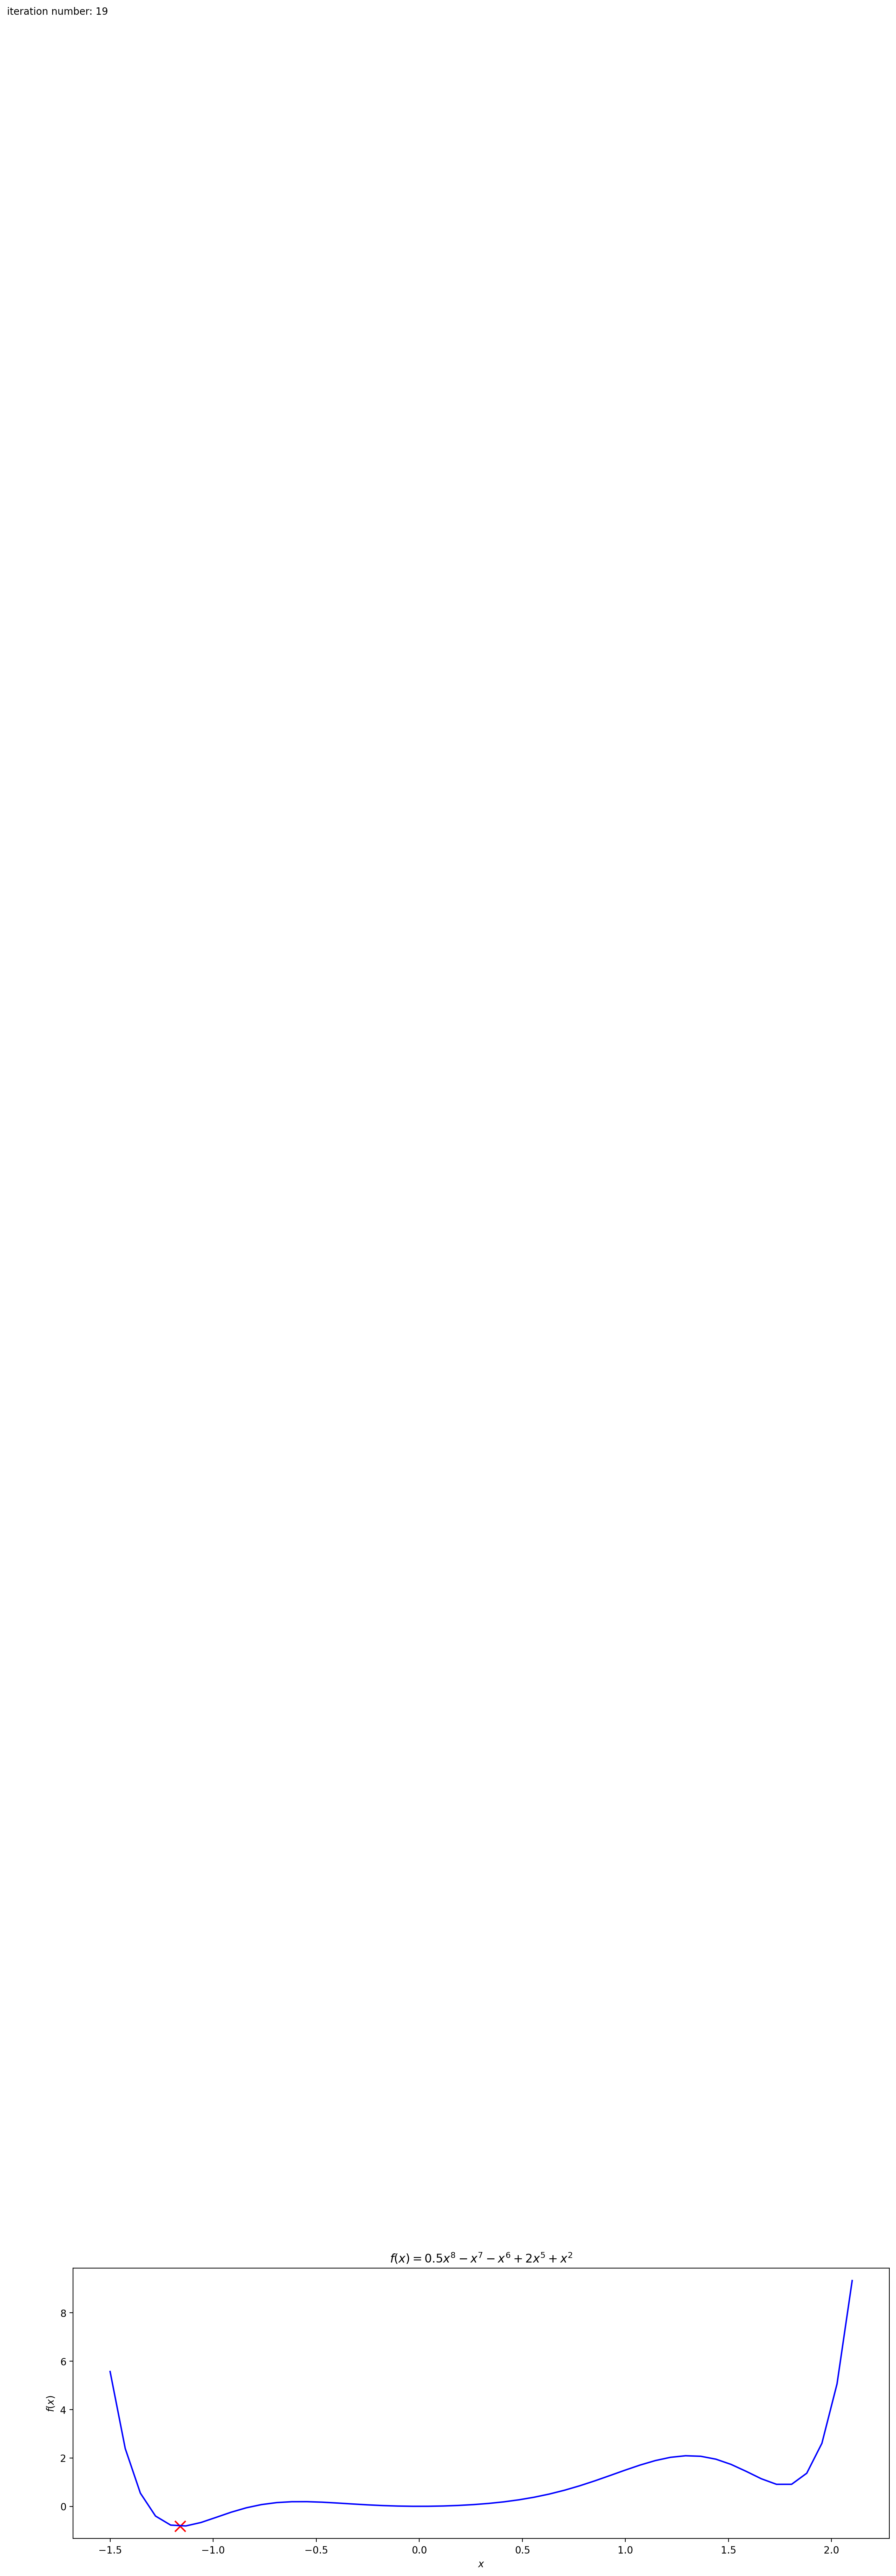

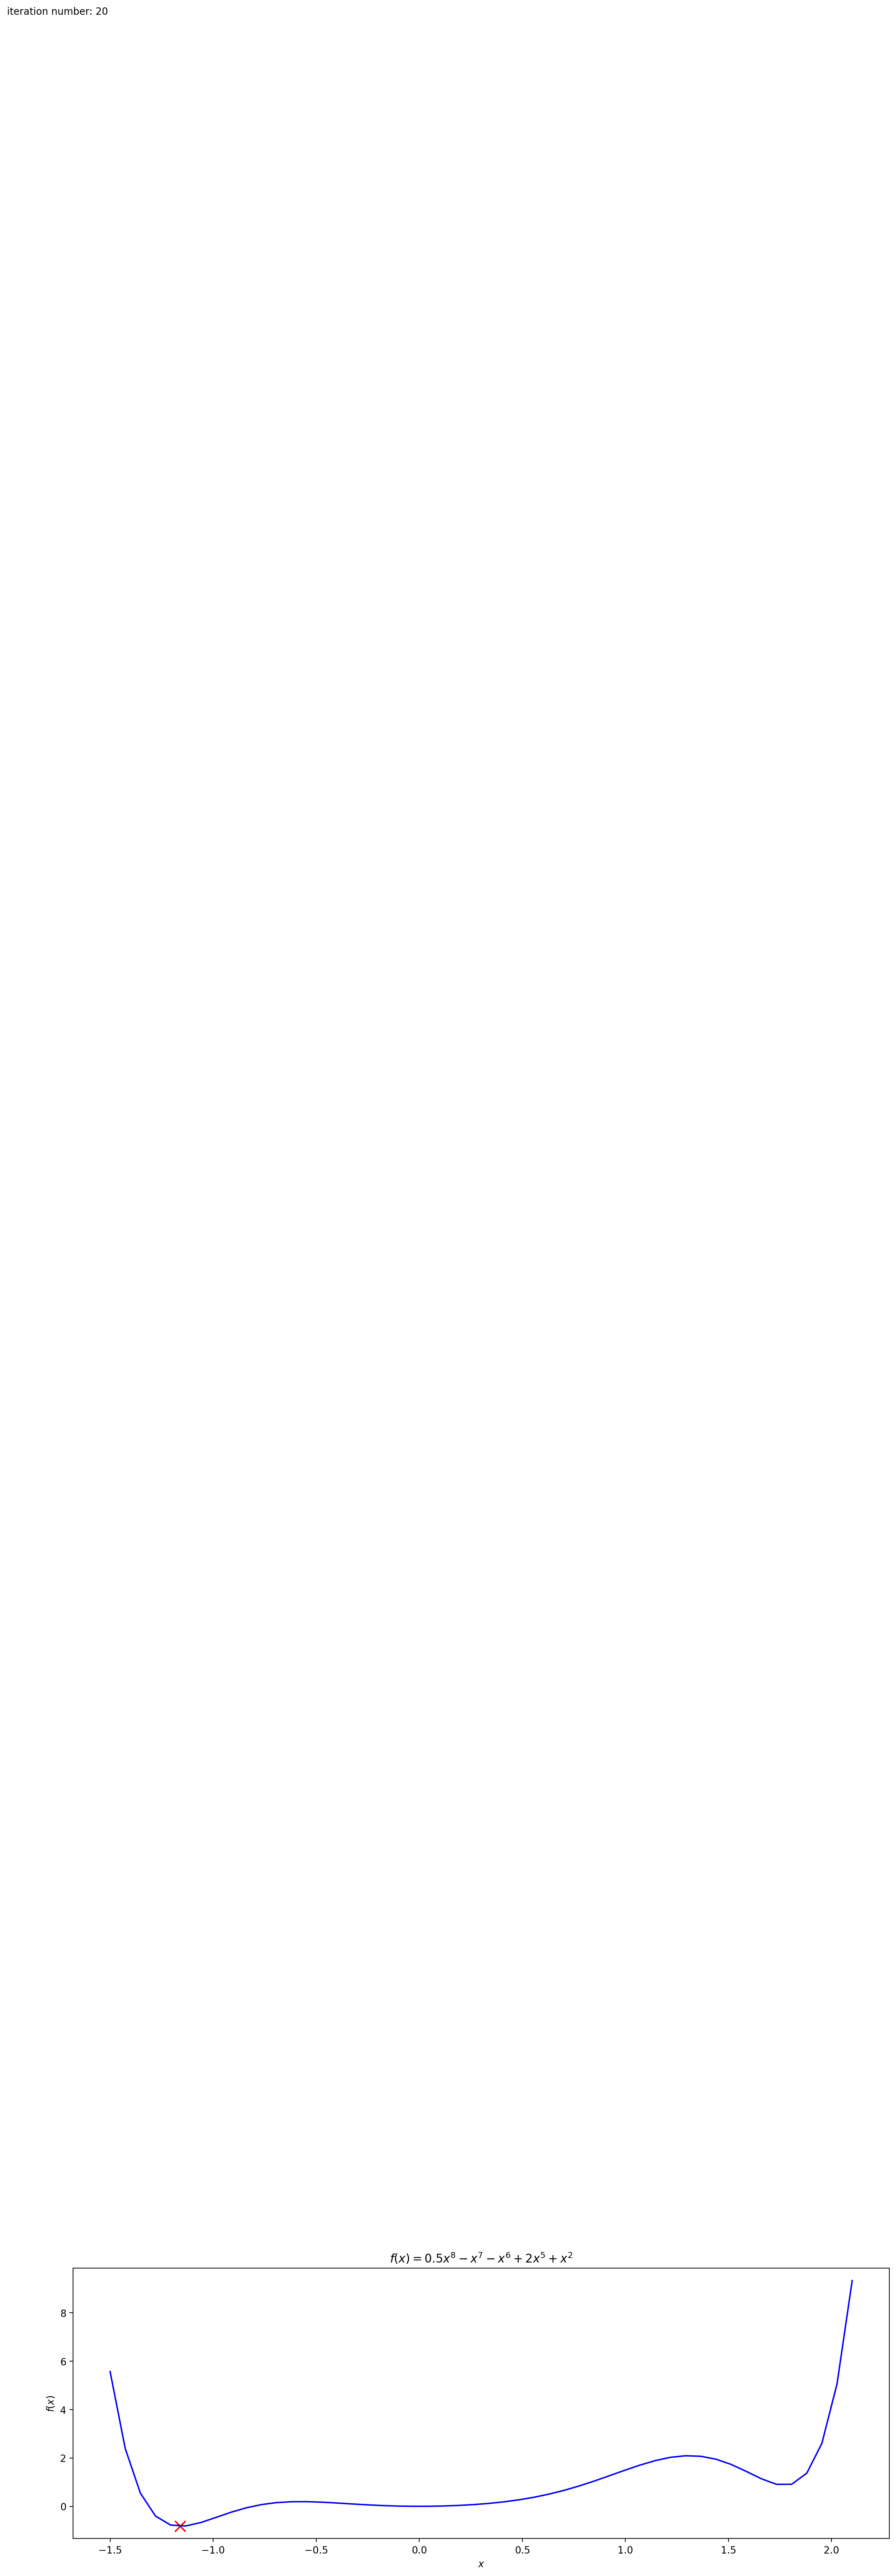

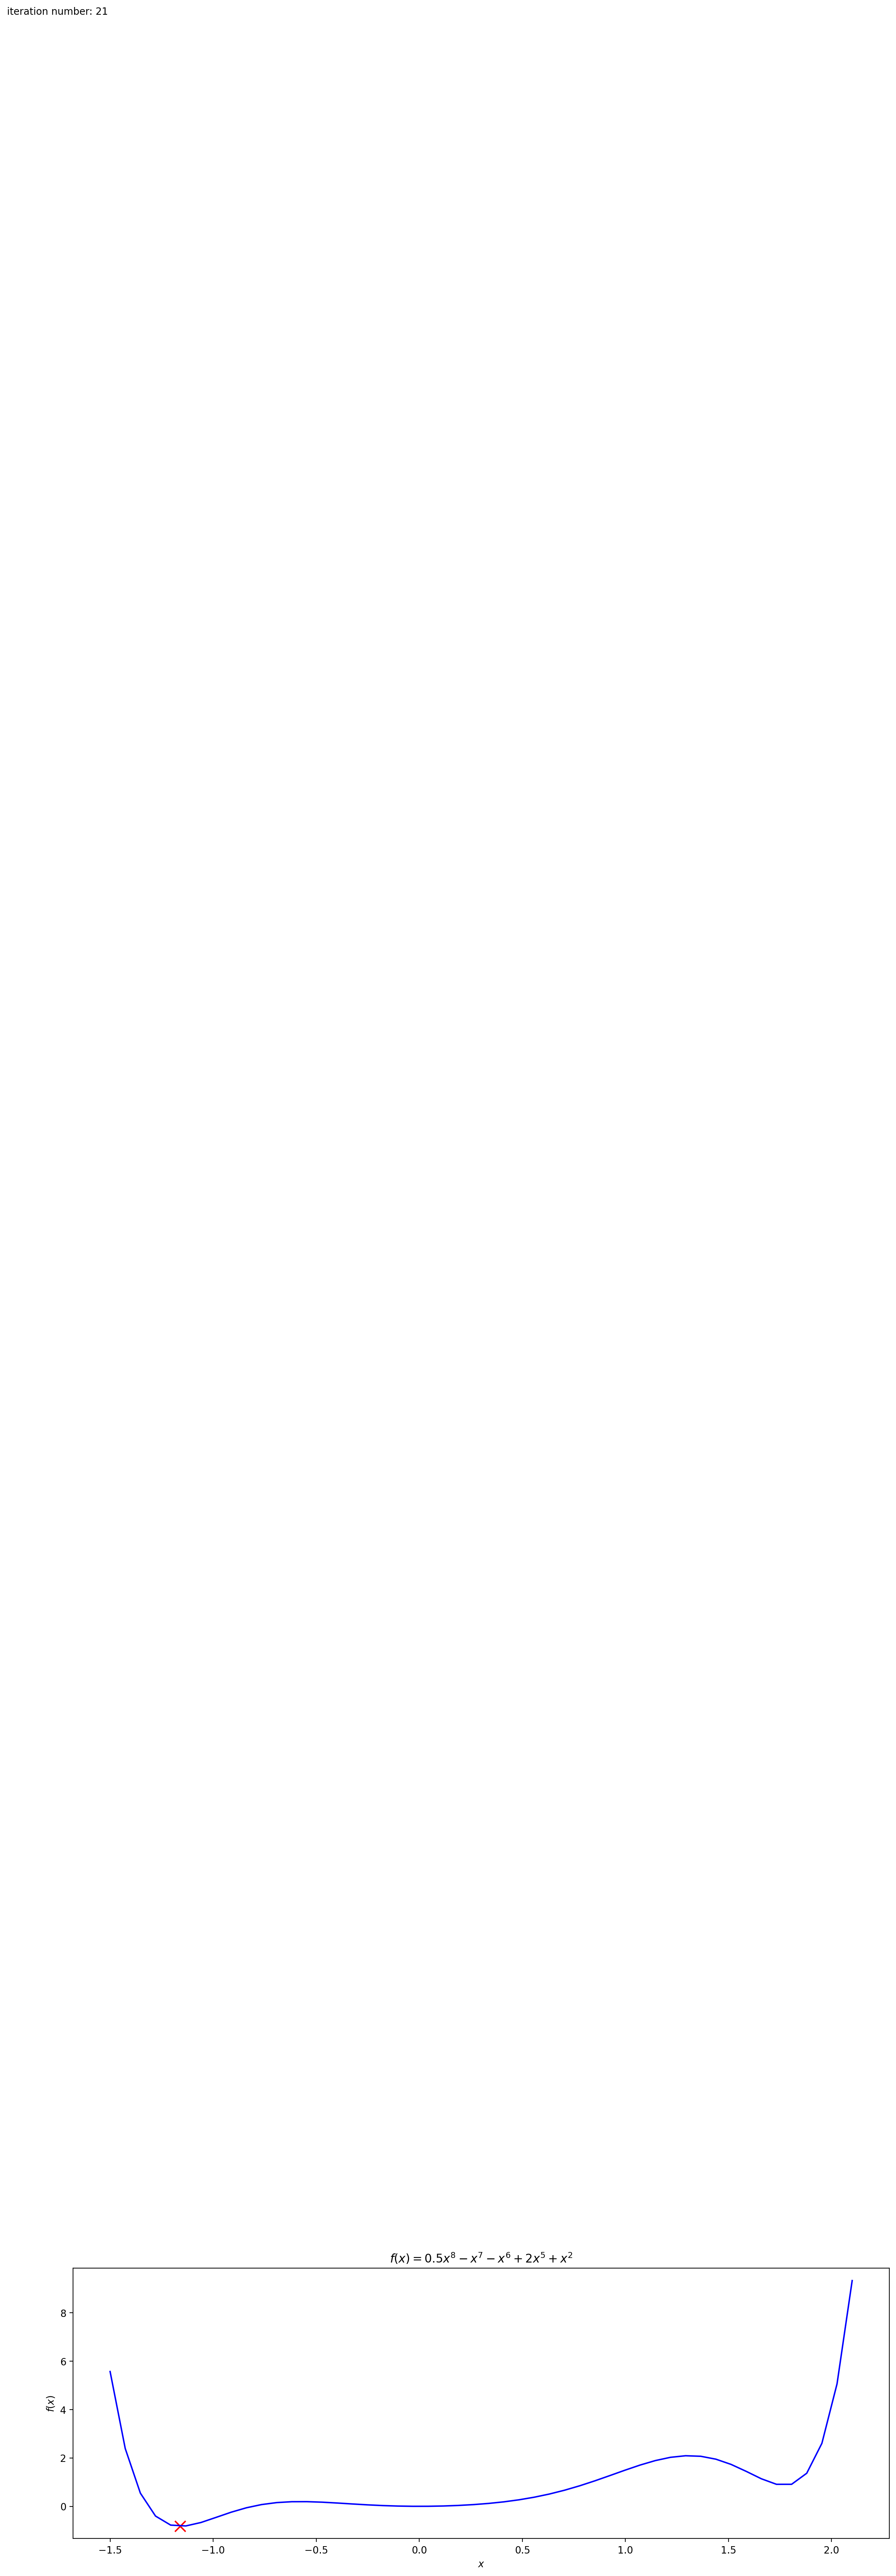

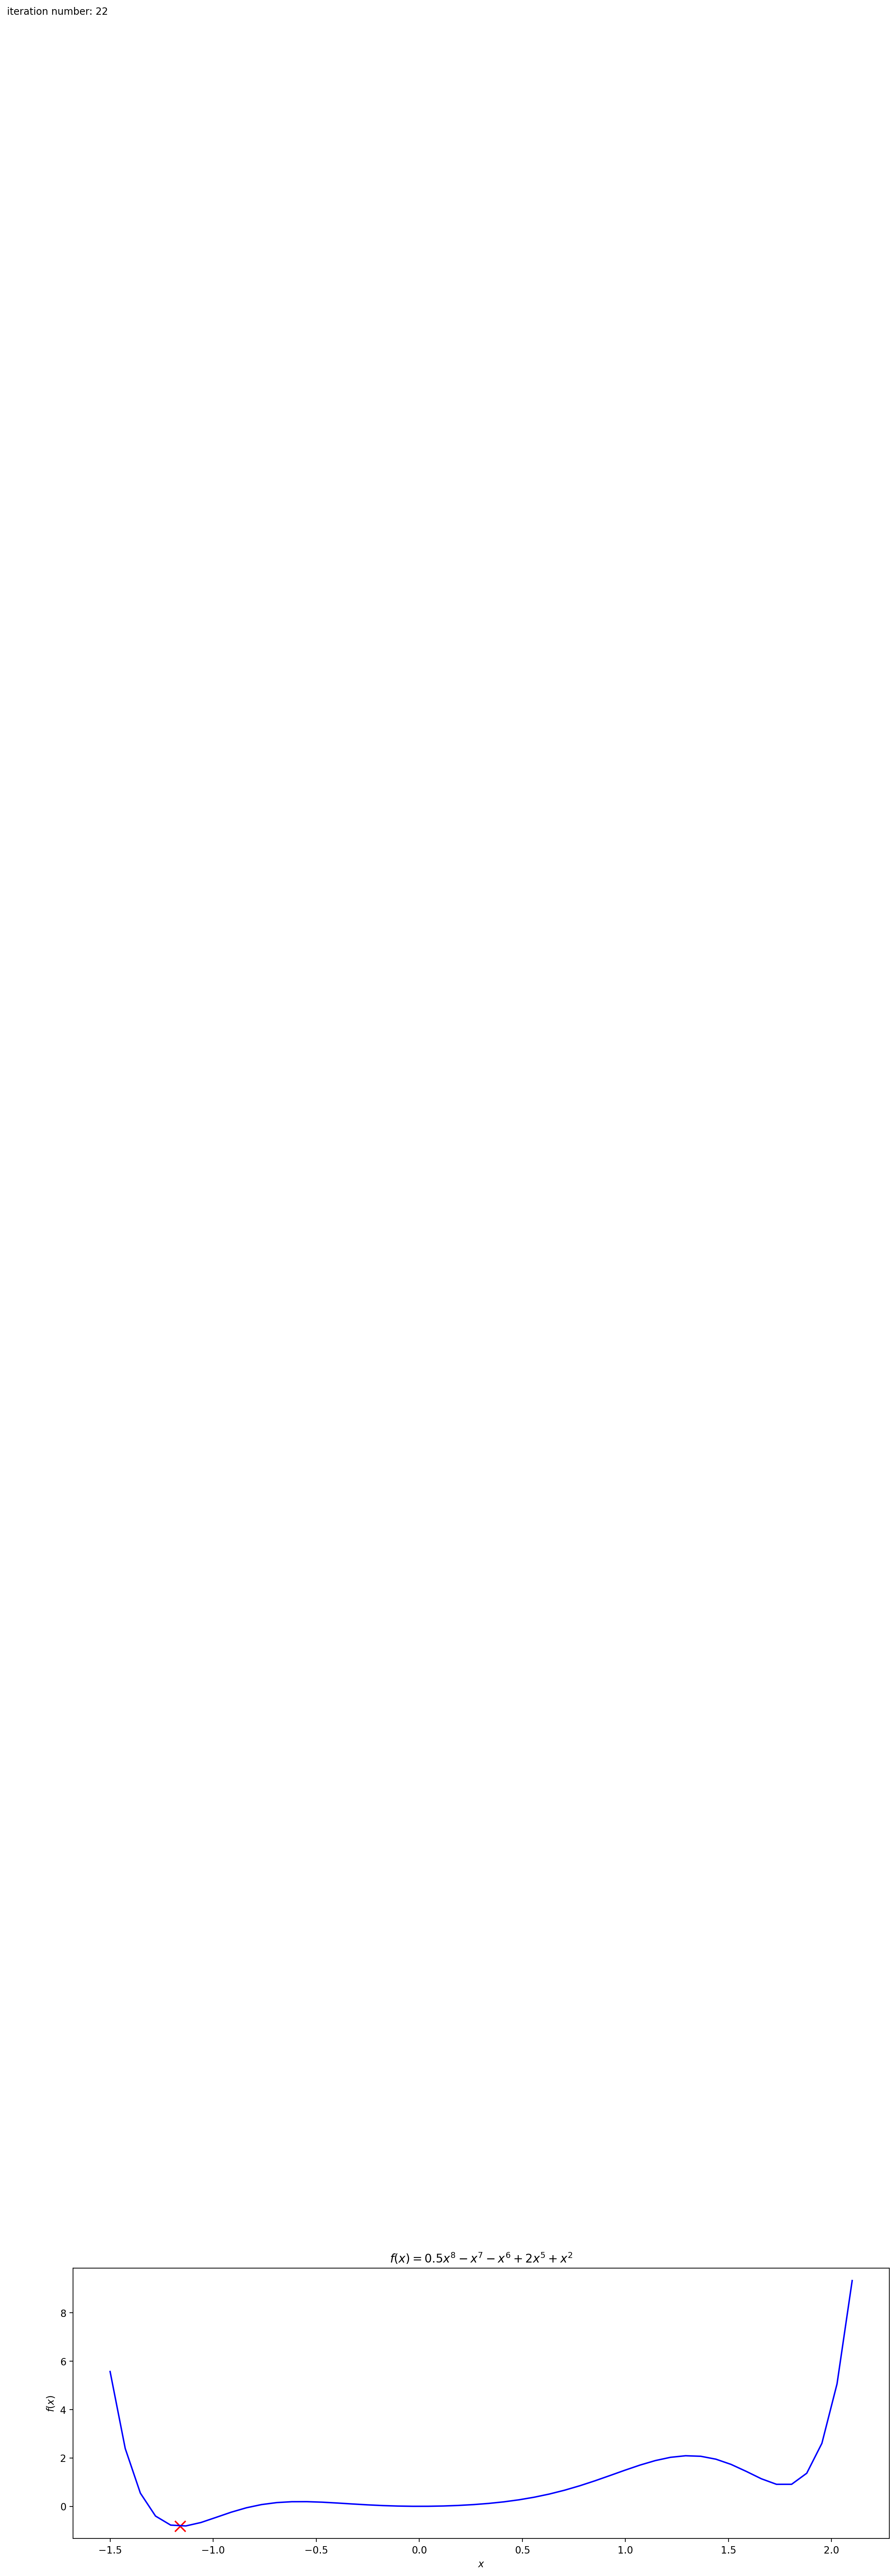

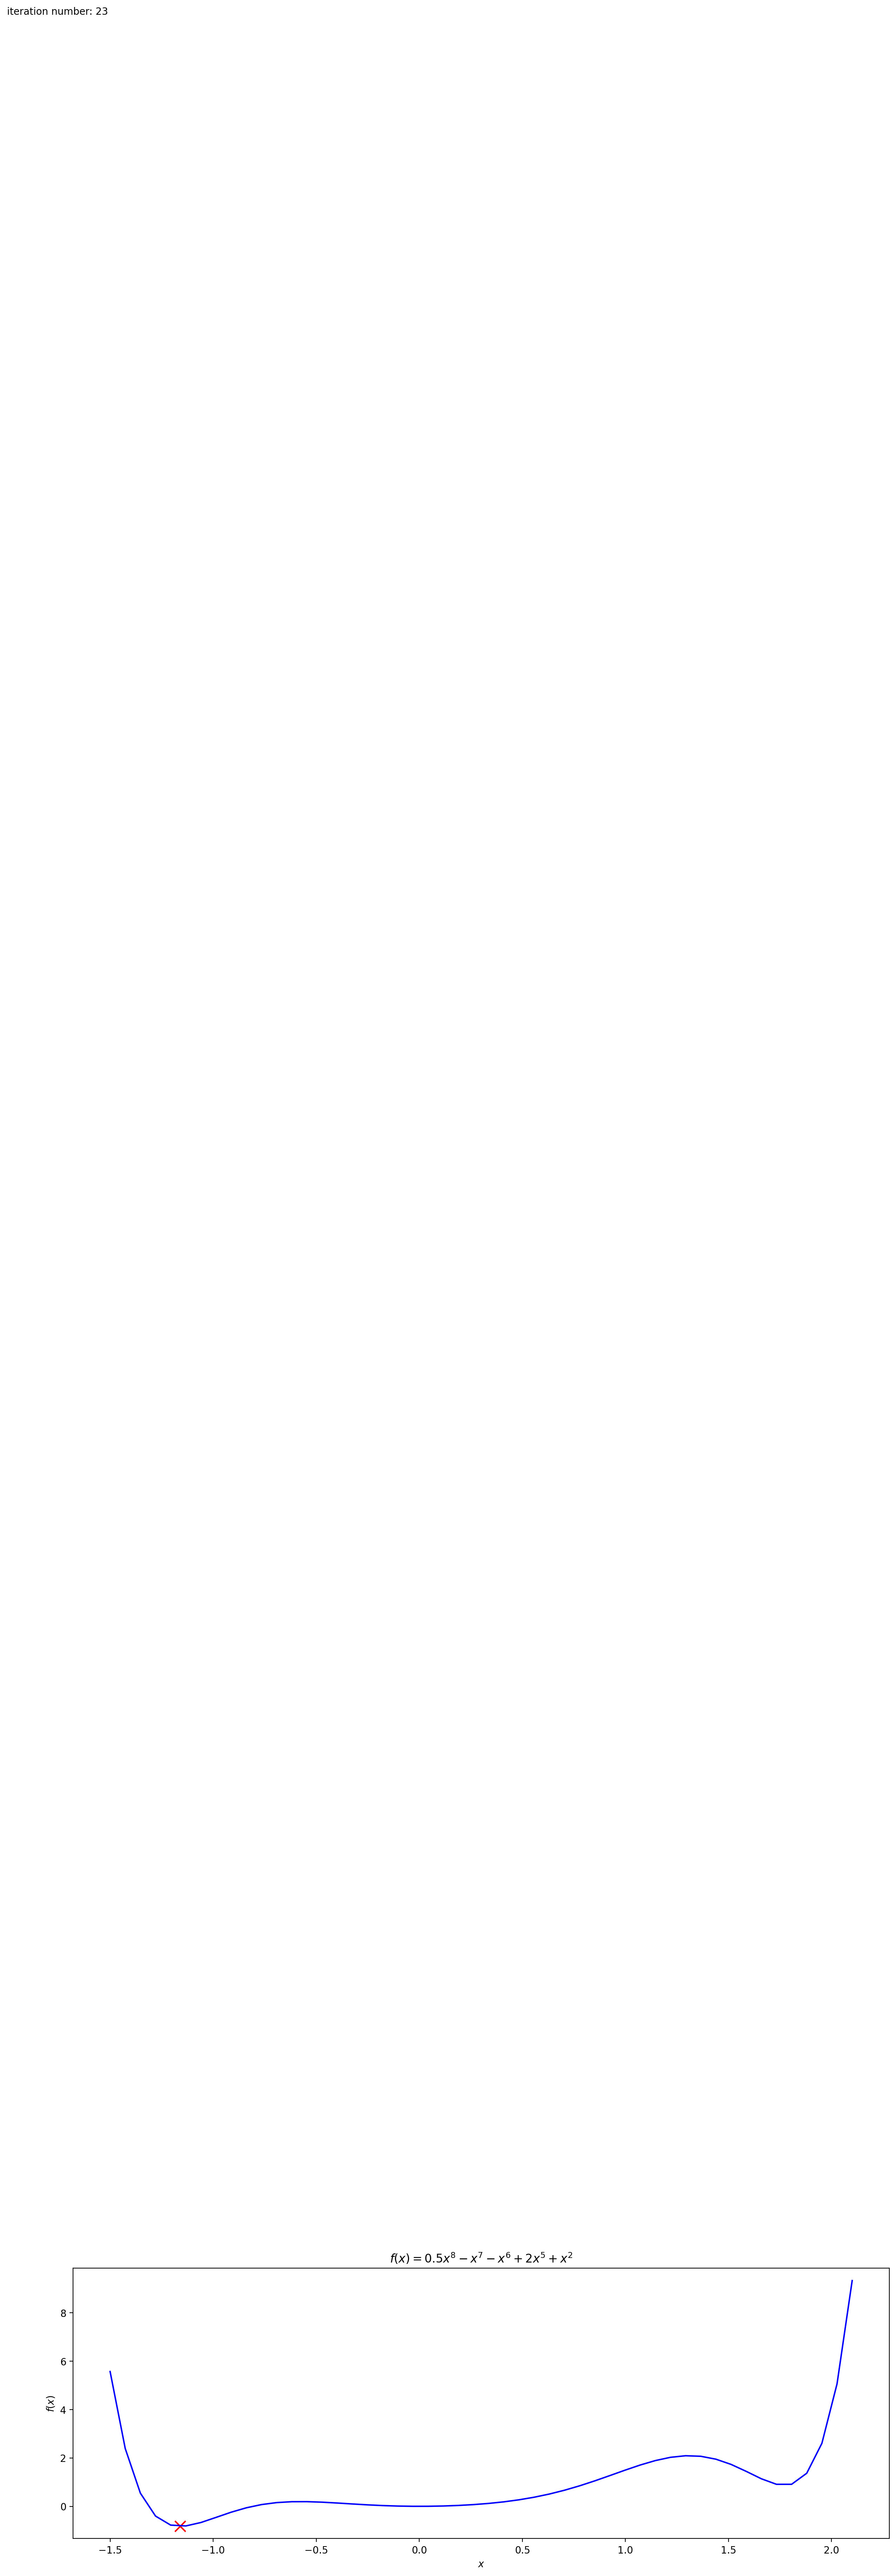

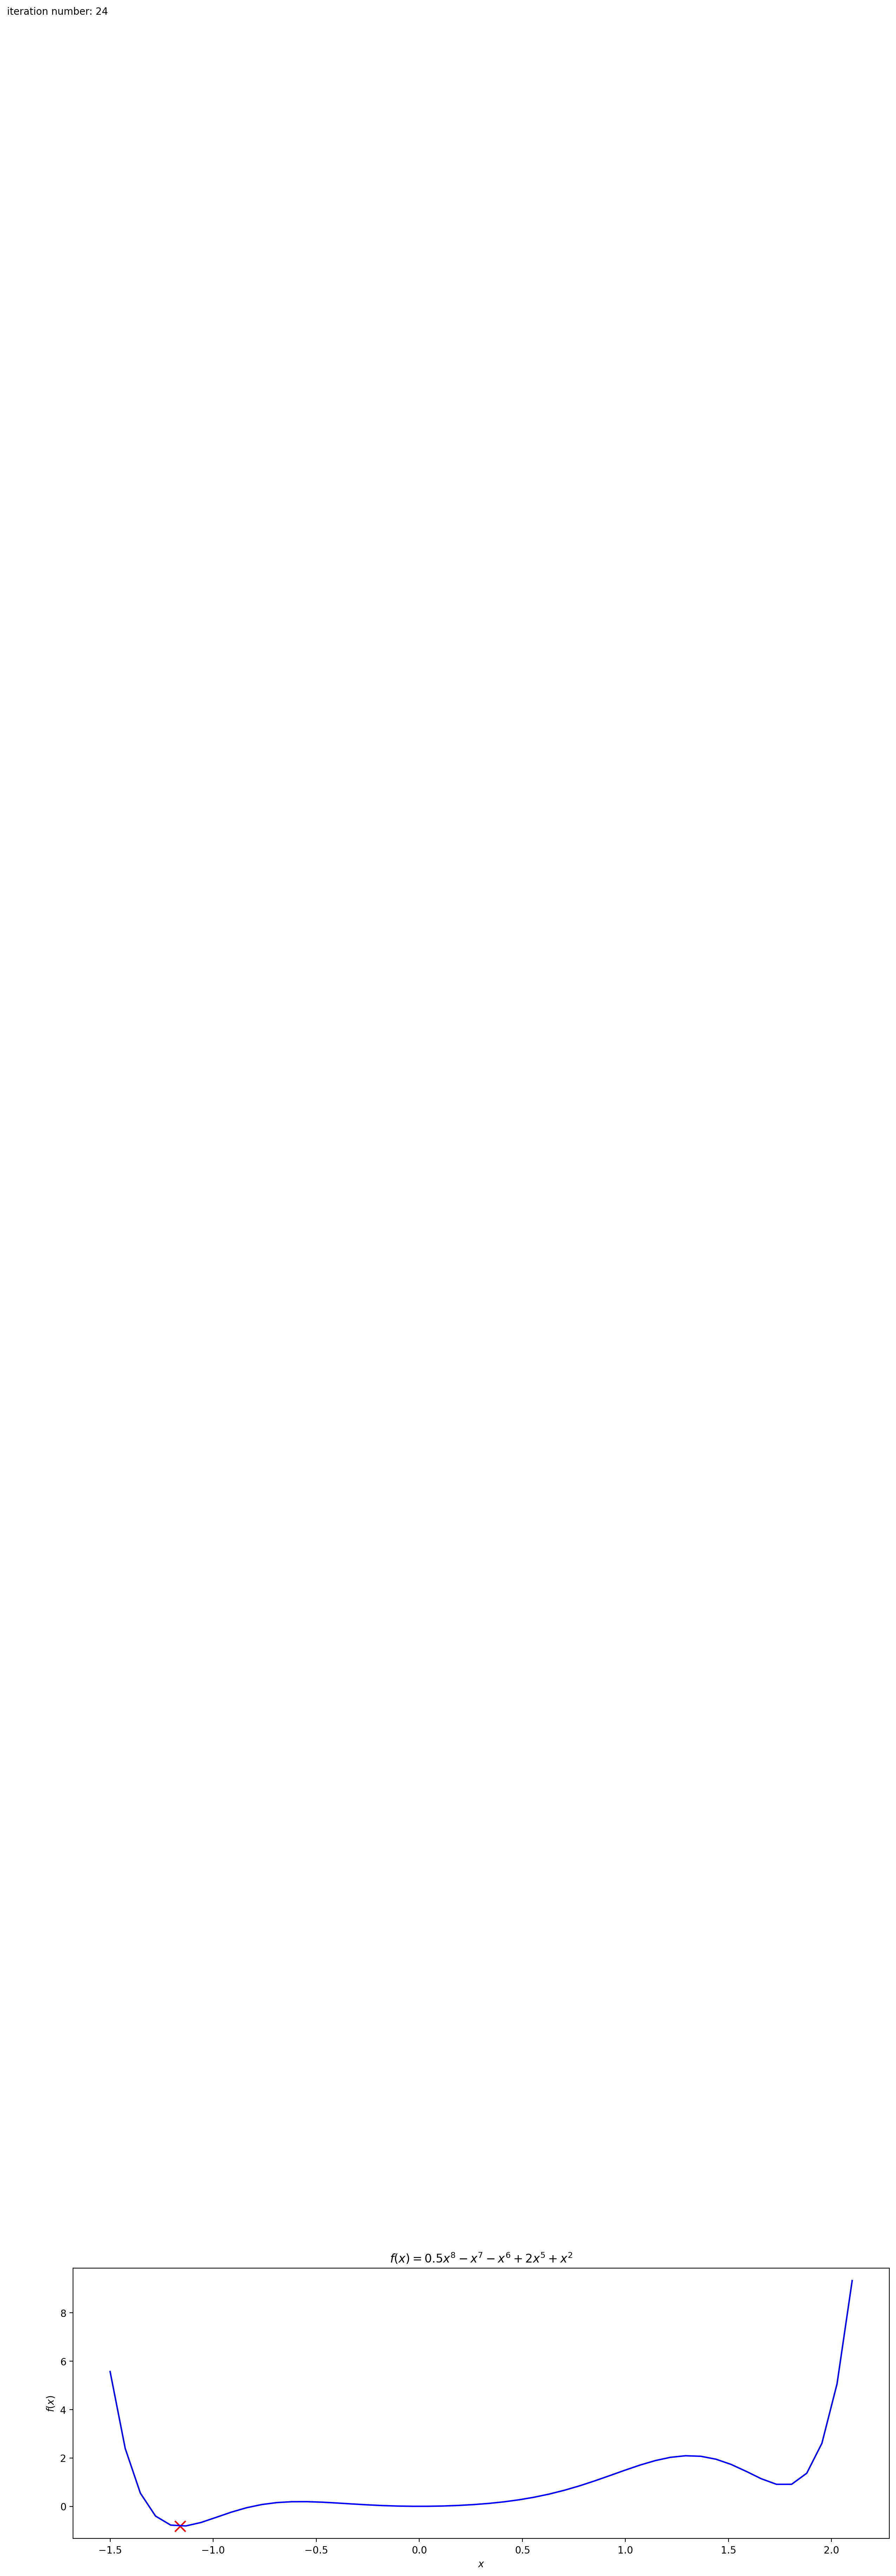

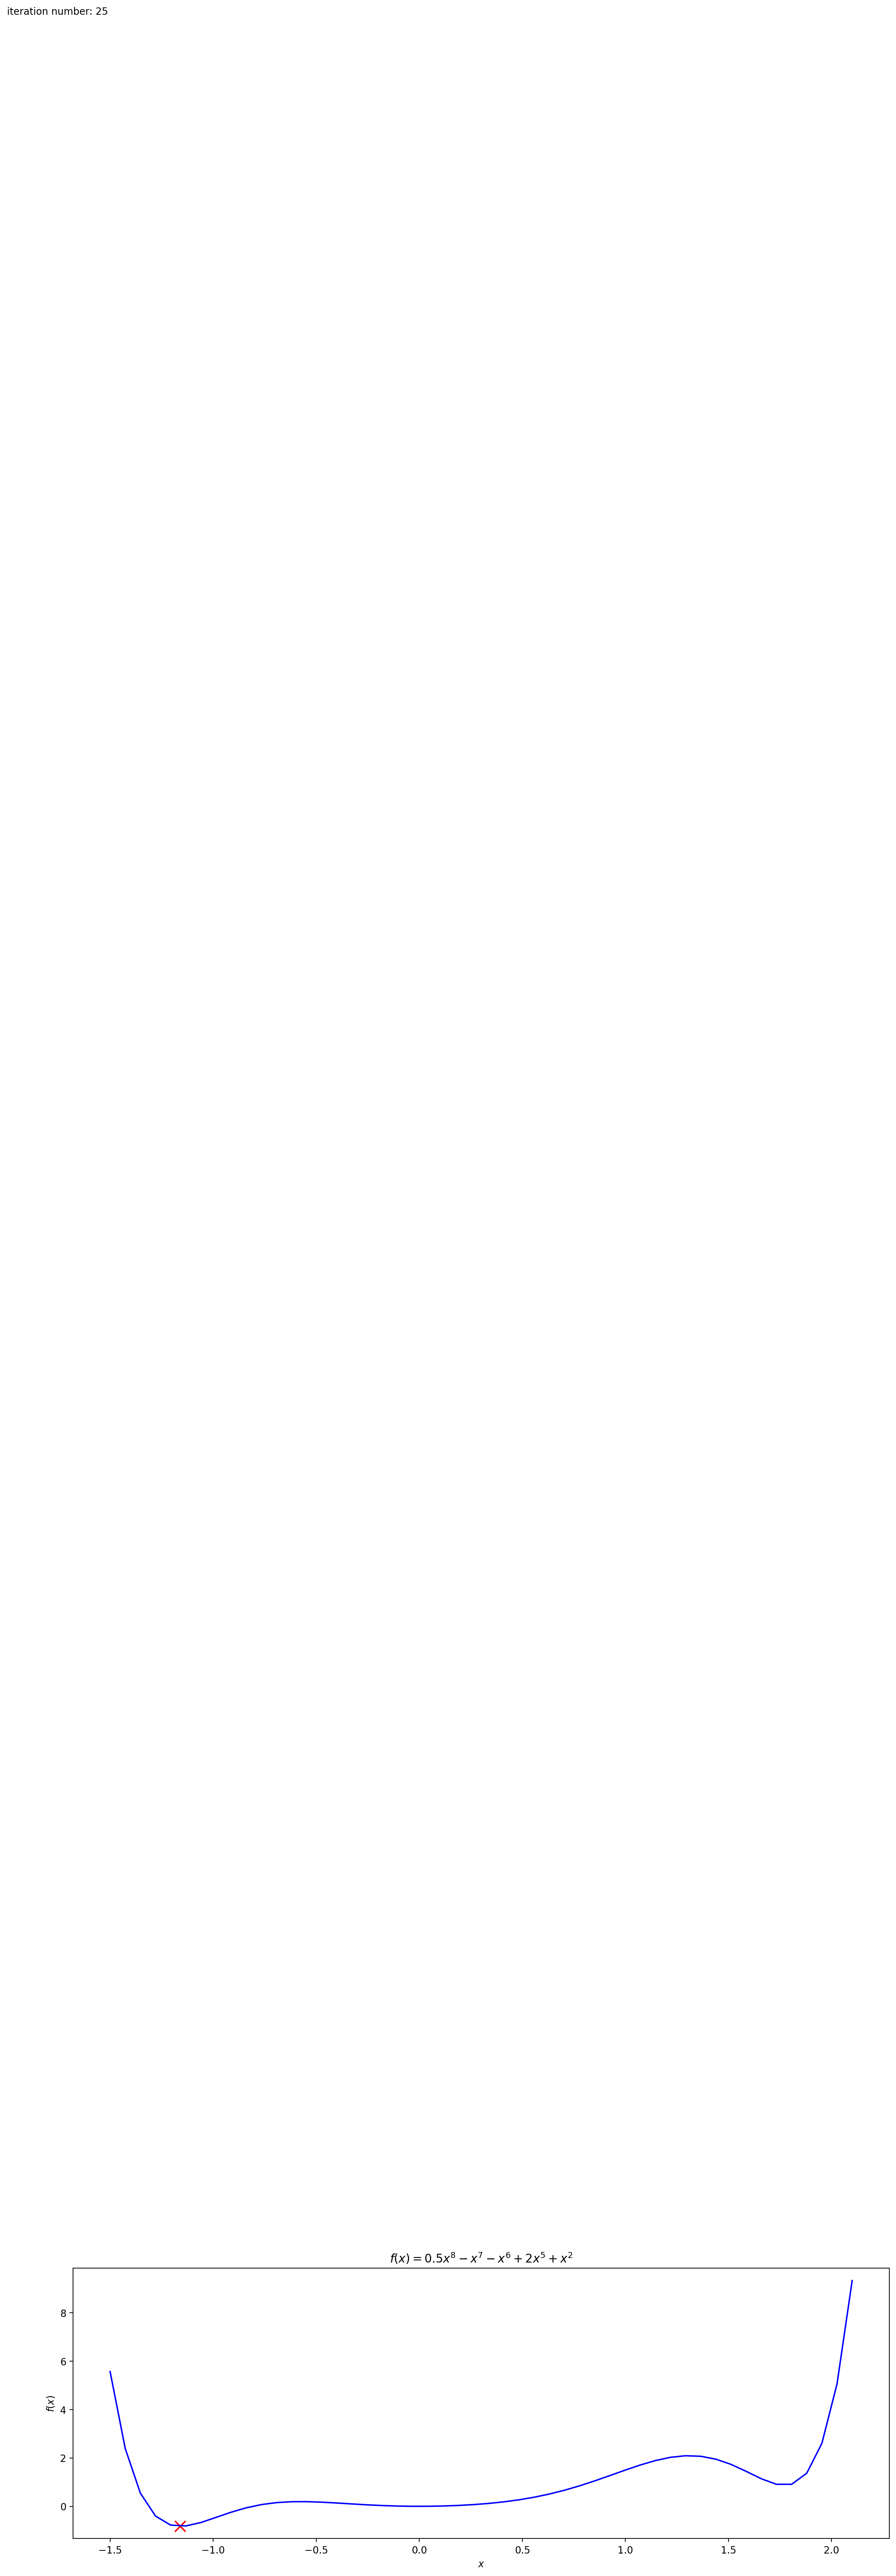

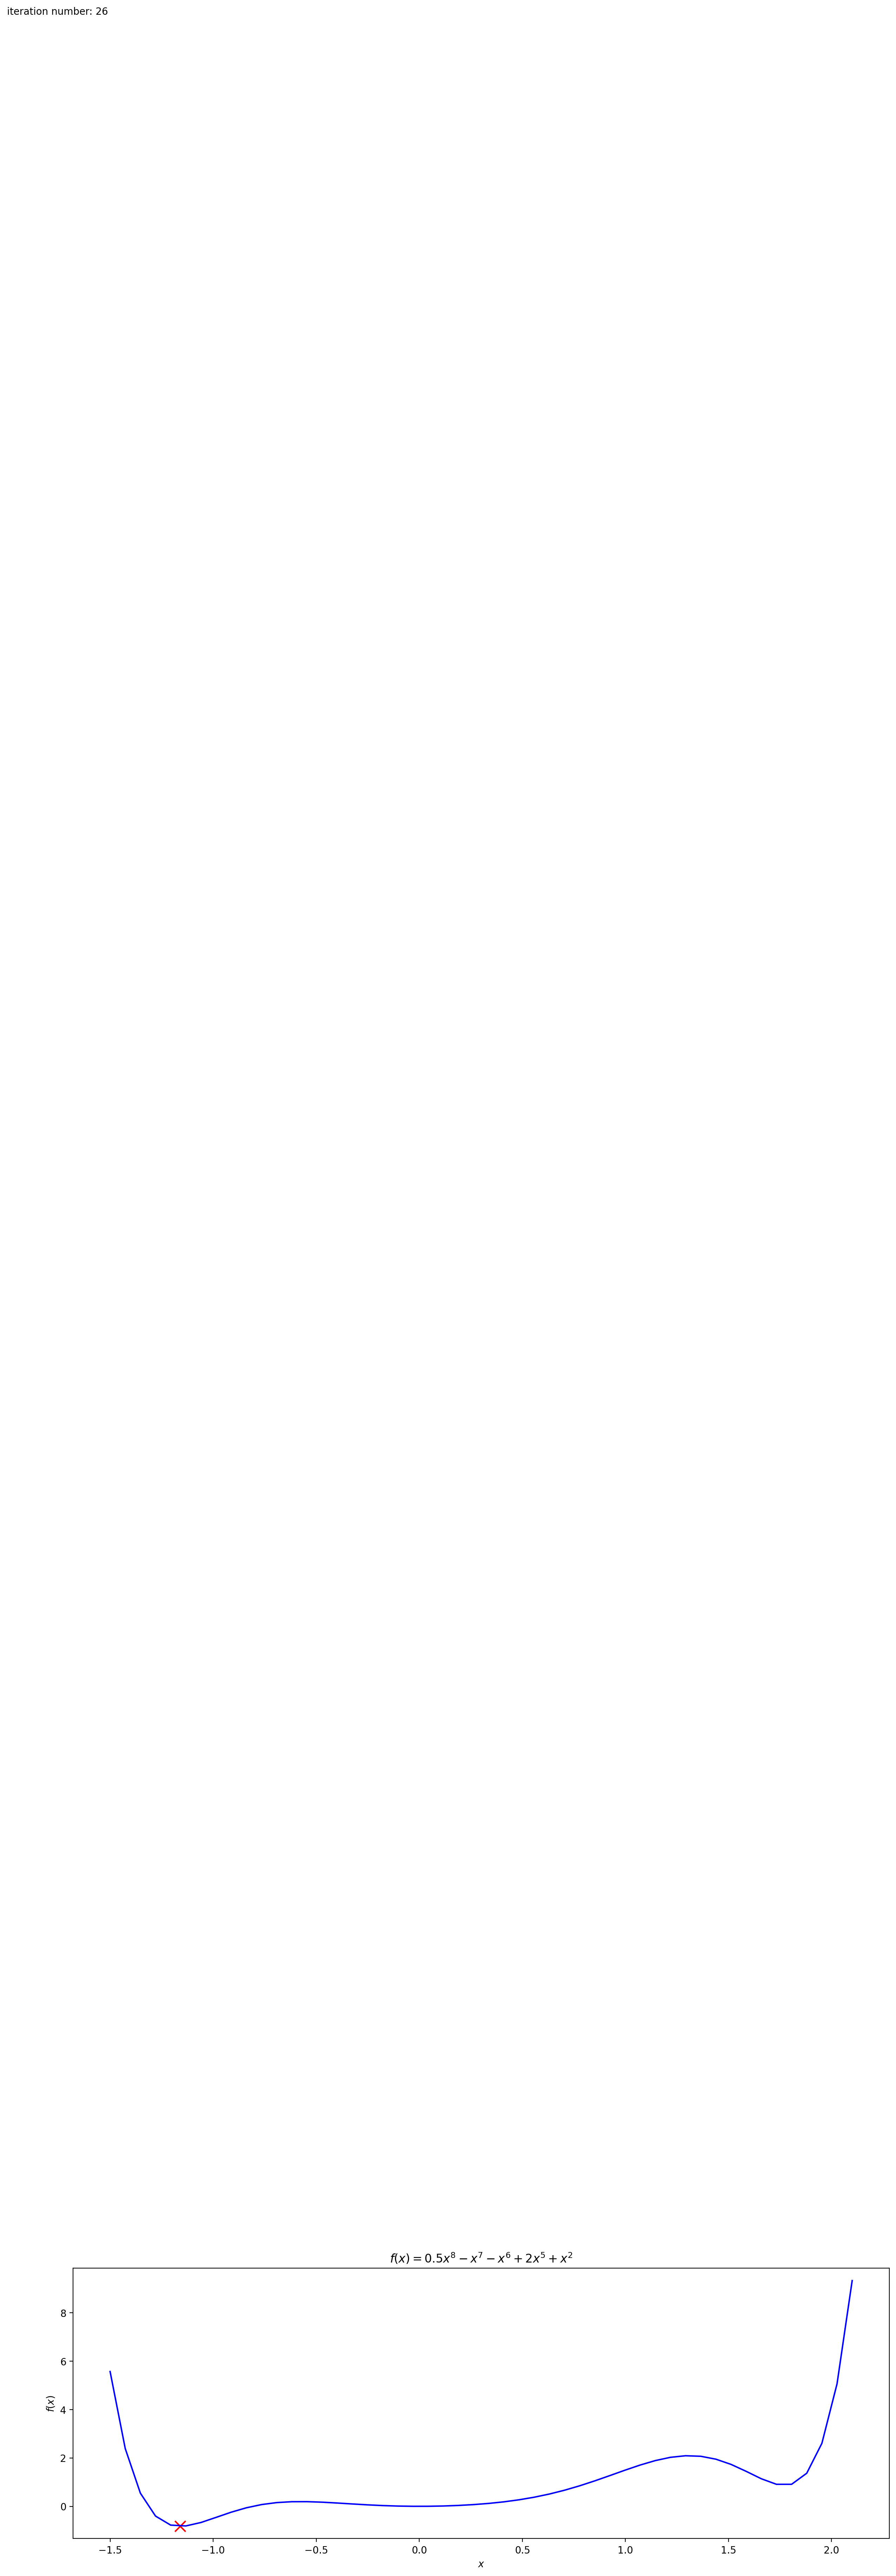

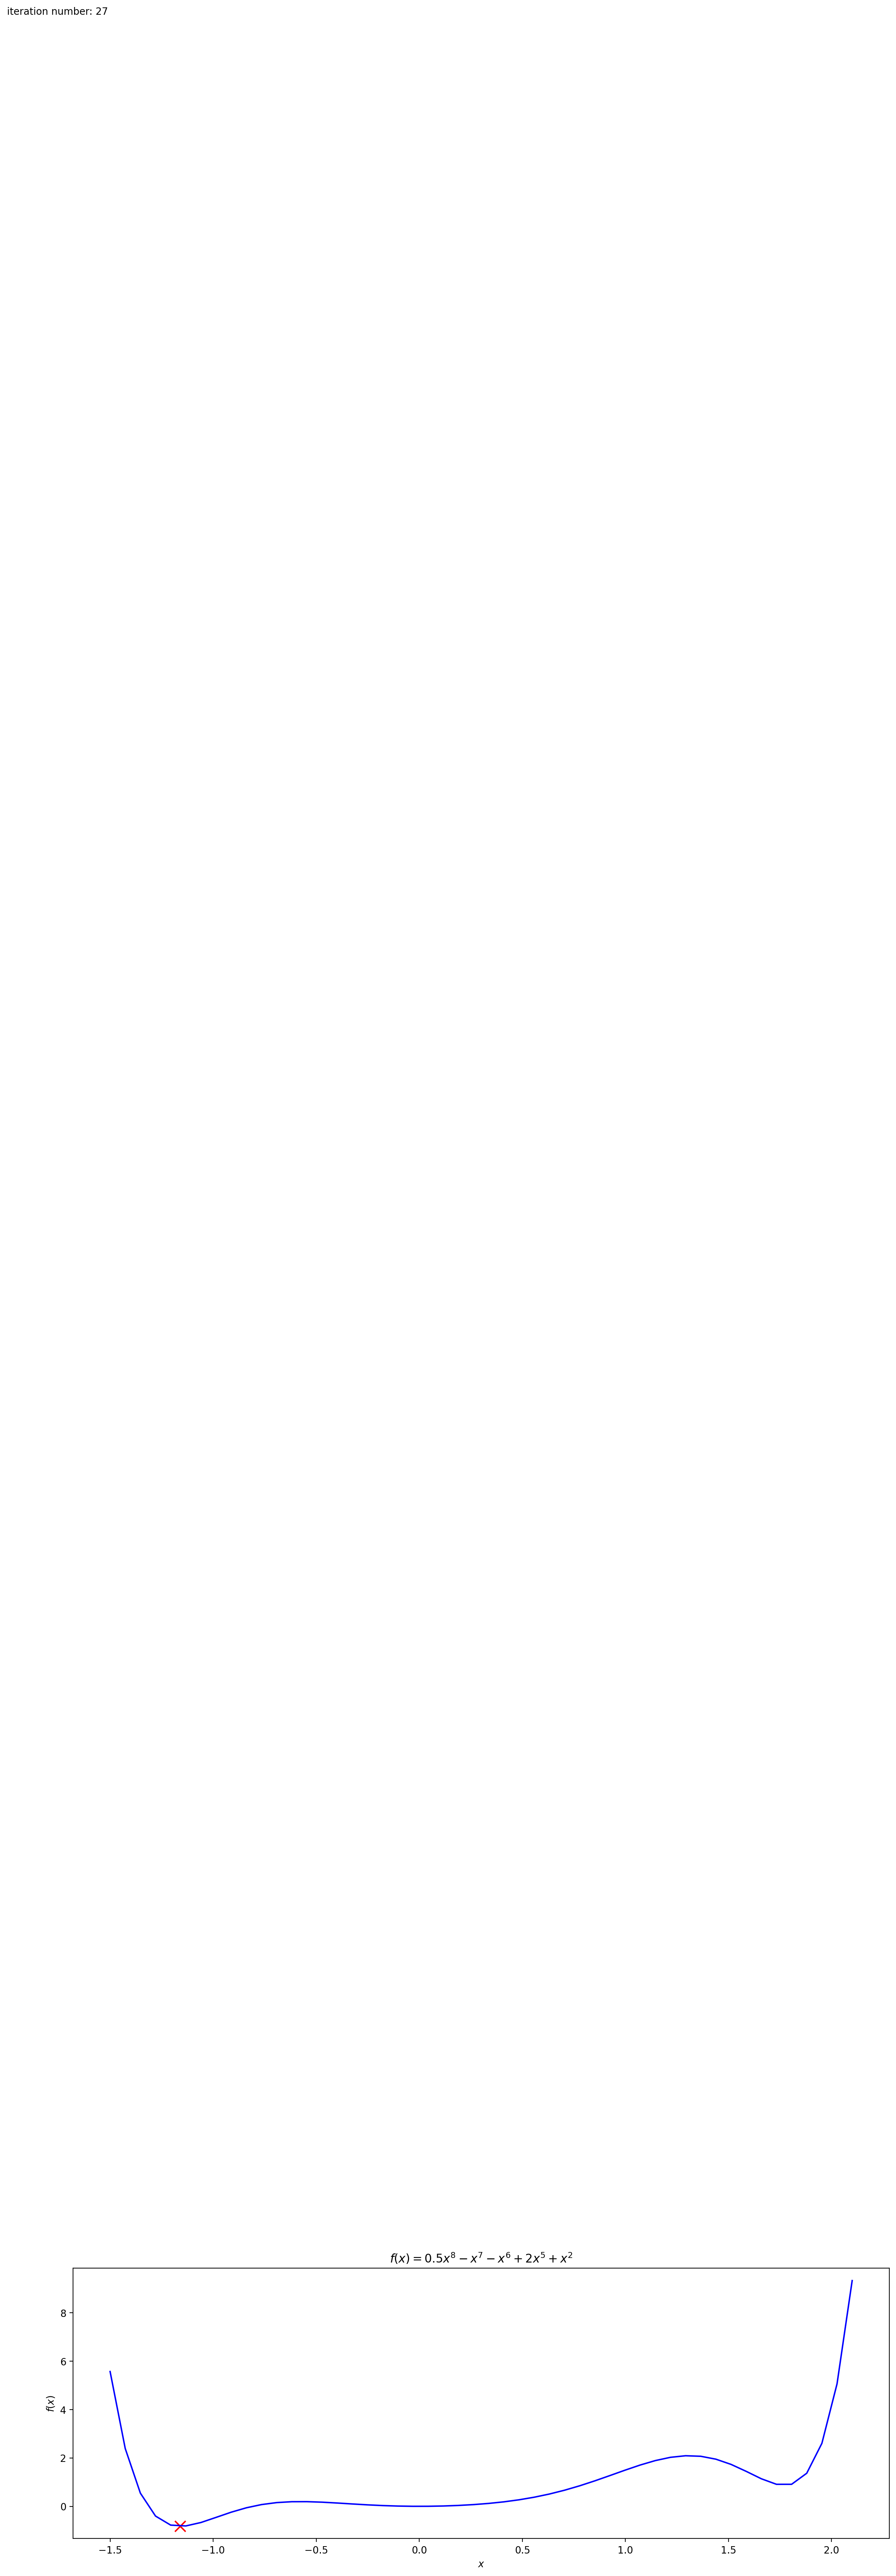

In [ ]:
alpha = 0.03
tol = 1e-4

x = -5

max_iteration = 200
iteration = 0

dfdx = np.clip(grad(x), -10, 10)
dfdx_sign = np.sign(dfdx)

for i in range(max_iteration):
    if abs(dfdx) < tol:
      break

    dfdx = np.clip(grad(x), -10, 10)
    x = x - alpha * dfdx
    iteration += 1

    if dfdx_sign != np.sign(dfdx):
      alpha = alpha / 1.3
    dfdx_sigh = np.sign(dfdx)
    plot_line_with_x(xs, ys, x, f_1d(x), msg=f'iteration number: {iteration}', title=title_f_1d)

